# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import logging
import os
import sys
import tempfile
import time
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
from dask.distributed import Client, LocalCluster
from dask_jobqueue import SLURMCluster

import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
from okabeito import black, blue, green, lightblue, orange, purple, red, yellow
from seaborn import axes_style


In [ ]:
from neurodent import constants, core, visualization

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['LongRecordingOrganizer', 'DDFBinaryMetadata', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'LongRecordingAnalyzer', 'FragmentAnalyzer', 'get_temp_directory', 'set_temp_directory', 'parse_chname_to_abbrev', 'parse_path_to_animalday', 'validate_timestamps', 'nanaverage', 'log_transform', 'get_cache_status_message', 'should_use_cache_unified', 'utils']


In [3]:
tempdir = Path('../../tmp').resolve()
print(tempdir)
core.set_temp_directory(tempdir)

/mnt/isilon/marsh_single_unit/PythonEEG/tmp


In [4]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A10 KO 12_13_2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:309: UserWarning: LongRecording will be truncated to the first 3 files
  warnings.warn(f"LongRecording will be truncated to the first {self.n_truncate} files")


In [5]:
# Set up logger with detailed formatting
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO, stream=sys.stdout, force=True)
logger = logging.getLogger()


In [6]:
import multiprocessing as mp
logger.setLevel(logging.DEBUG)

# animal_ids = ['A5', 'A10', 'F22', 'G25', 'G26', 'N21', 'N22', 'N23', 'N24', 'N25']
# animal_ids = ['A5', 'A10']
# animal_ids = []
# animal_ids = ['A5']
# animal_ids = ['A10']
# animal_ids = ['G25']
# base_folder = Path('/mnt/isilon/marsh_single_unit/PythonEEG Data Bins').resolve()

animal_ids = ["F22"]
base_folder = Path("./test-data").resolve()

# animal_ids = ['010922_cohort4_group2_M10_MWT_files40-65']
# base_folder = '/mnt/isilon/marsh_single_unit/PythonEEG Data Bins/Sox5/Dr. Lefebvre Project/010822_cohort4_group2_2mice_MWT_MHET/M10_MWT_cohort4_group2/'

for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=False)
    # ao.convert_colbins_to_rowbins(overwrite=False)
    # ao.convert_rowbins_to_rec()  # parallelization breaks if not enough memory

    ao.compute_bad_channels()

    with LocalCluster(n_workers=int(0.9 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    ) as cluster, Client(cluster) as client:
        
        display(client)
        print("running war")
        # ao.convert_rowbins_to_rec(multiprocess_mode='dask') # paralleization breaks if not enough memory
        war = ao.compute_windowed_analysis(['all'], exclude=None, multiprocess_mode="dask")
        # war = ao.compute_windowed_analysis(['pcorr', "cohere"], multiprocess_mode="dask")
        # war = ao.compute_windowed_analysis(['pcorr', 'cohere', 'zpcorr', "zcohere"], multiprocess_mode="dask")
        # war = ao.compute_windowed_analysis(['all'], exclude=['pcorr', 'cohere', 'zcohere', 'zpcorr'], multiprocess_mode="dask")
        # war = ao.compute_windowed_analysis(['pcorr', "cohere"], multiprocess_mode="serial")
        # war = ao.compute_windowed_analysis(['pcorr', "cohere"], multiprocess_mode="serial", mode='cwt_morlet', cwt_n_cycles_max=1e6)
        # war = ao.compute_windowed_analysis(['pcorr', "cohere"], multiprocess_mode="serial", mt_bandwidth=2.0)
        # war = ao.compute_windowed_analysis(['pcorr', "cohere"], multiprocess_mode="serial", mt_bandwidth=8.0)
        # war = ao.compute_windowed_analysis(["zpcorr", "zcohere"], multiprocess_mode="serial")
    #     war.save_pickle_and_json(Path(f'./test-wars-full/{animal_id}').resolve())

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running sar")
    #     sar = ao.compute_spike_analysis(multiprocess_mode='dask')


2025-09-18 14:04:58,188 - INFO - bin_folder_pattern: /mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-data/*F22*
2025-09-18 14:04:58,189 - INFO - self._bin_folders: ['/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-data/F22 KO 12_12_2023']
2025-09-18 14:04:58,190 - INFO - self.bin_folder_names: ['F22 KO 12_12_2023']
2025-09-18 14:04:58,191 - INFO - self.animaldays (unique): ['F22 KO Dec-12-2023']
2025-09-18 14:04:58,192 - INFO - self.genotype: KO
2025-09-18 14:04:58,192 - DEBUG - Creating 1 LongRecordings (one per unique animalday)
2025-09-18 14:04:58,197 - DEBUG - Before prune: 1 colbins, 1 rowbins, 1 metas
2025-09-18 14:04:58,198 - DEBUG - After prune: 1 colbins, 1 rowbins, 1 metas
2025-09-18 14:04:58,216 - INFO - CSV metadata timestamps: 1 of 1 files have timestamps
2025-09-18 14:04:58,217 - INFO - Converting 1 column-major binary files to row-major format
2025-09-18 14:04:58,217 - INFO - Overwrite flag not set - only generating missing row-major files
2025-

<Client: 'tcp://127.0.0.1:34875' processes=3 threads=3, memory=5.59 GiB>

running war
2025-09-18 14:05:12,369 - INFO - Computing windowed analysis for /mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-data/F22 KO 12_12_2023
2025-09-18 14:05:12,370 - DEBUG - Processing 117 fragments
2025-09-18 14:05:12,371 - DEBUG - Converting LongRecording to numpy array
2025-09-18 14:05:12,377 - DEBUG - np_fragments.shape: (116, 4000, 10)
2025-09-18 14:05:12,794 - DEBUG - Caching numpy array with zarr in /mnt/isilon/marsh_single_unit/PythonEEG/tmp/temp_8945a313e46093bbdd827a2234af015ccffaea6f106cc0dc.zarr
2025-09-18 14:05:13,290 - DEBUG -   - Total memory footprint: 17.70 MB, 0.017 GB
2025-09-18 14:05:13,291 - DEBUG -   - Zarr array shape: (116, 4000, 10)
2025-09-18 14:05:13,293 - DEBUG -   - Zarr array chunks: (100, 4000, 10)
2025-09-18 14:05:13,294 - DEBUG - Processing metadata serially
2025-09-18 14:05:13,339 - DEBUG - Processing features in parallel
2025-09-18 14:05:13,354 - DEBUG - Dask array shape: (116, 4000, 10)
2025-09-18 14:05:13,355 - DEBUG - Dask arra

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/analyze_frag.py:415: RuntimeWarning: fmin=1.000 Hz corresponds to 4.000 < 5 cycles based on the epoch length 4.000 sec, need at least 5.000 sec epochs or fmin=1.250. Spectrum estimate will be unreliable.
  con = spectral_connectivity_epochs(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/analyze_frag.py:415: RuntimeWarning: fmin=1.000 Hz corresponds to 4.000 < 5 cycles based on the epoch length 4.000 sec, need at least 5.000 sec epochs or fmin=1.250. Spectrum estimate will be unreliable.
  con = spectral_connectivity_epochs(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/analyze_frag.py:415: RuntimeWarning: fmin=1.000 Hz corresponds to 4.000 < 5 cycles based on the epoch length 4.000 sec, need at least 5.000 sec epochs or fmin=1.250. Spectrum estimate will be unreliable.
  con = spectral_connectivity_epochs(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/analyze_frag.py:415: RuntimeWarning: fmin=1.000 Hz cor

2025-09-18 14:05:43,429 - DEBUG - Cleaning up temp directory
2025-09-18 14:05:43,461 - DEBUG - Combining metadata and feature values
2025-09-18 14:05:43,465 - DEBUG - Validating timestamps
2025-09-18 14:05:43,473 - DEBUG - Checking LOF scores for F22 KO Dec-12-2023: has_attr=True, is_not_none=True
2025-09-18 14:05:43,475 - INFO - Added LOF scores for F22 KO Dec-12-2023: 10 channels
2025-09-18 14:05:43,476 - INFO - Total LOF scores collected: 1 animal days
2025-09-18 14:05:43,487 - WARNING - Intan Input (1)/PortD D-009 does not match name aliases. Assuming alias from number in channel name.
2025-09-18 14:05:43,489 - WARNING - Intan Input (1)/PortD D-010 does not match name aliases. Assuming alias from number in channel name.
2025-09-18 14:05:43,490 - WARNING - Intan Input (1)/PortD D-012 does not match name aliases. Assuming alias from number in channel name.
2025-09-18 14:05:43,492 - WARNING - Intan Input (1)/PortD D-014 does not match name aliases. Assuming alias from number in channe

In [48]:
print(war.bad_channels_dict)
# war.get_filter_reject_channels_by_recording_session()
# war.filter_all()

{}


2025-08-27 17:07:39,908 - WARNING - zcohere not calculated, skipping
2025-08-27 17:07:39,909 - WARNING - imcoh not calculated, skipping
2025-08-27 17:07:39,909 - WARNING - zimcoh not calculated, skipping
2025-08-27 17:07:39,912 - WARNING - zpcorr not calculated, skipping


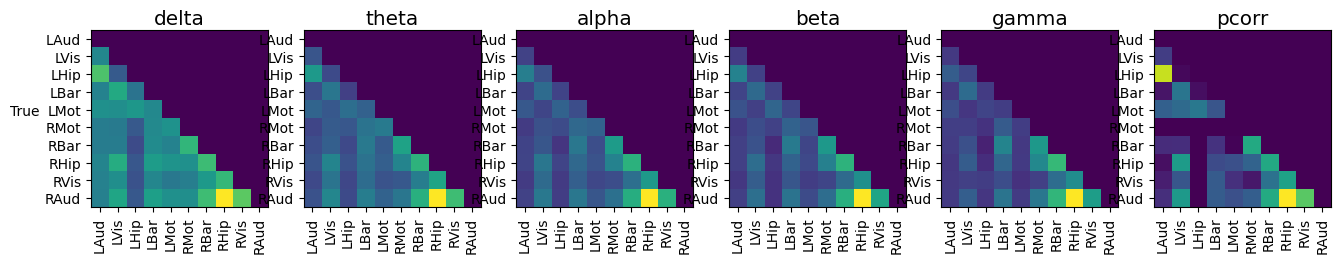

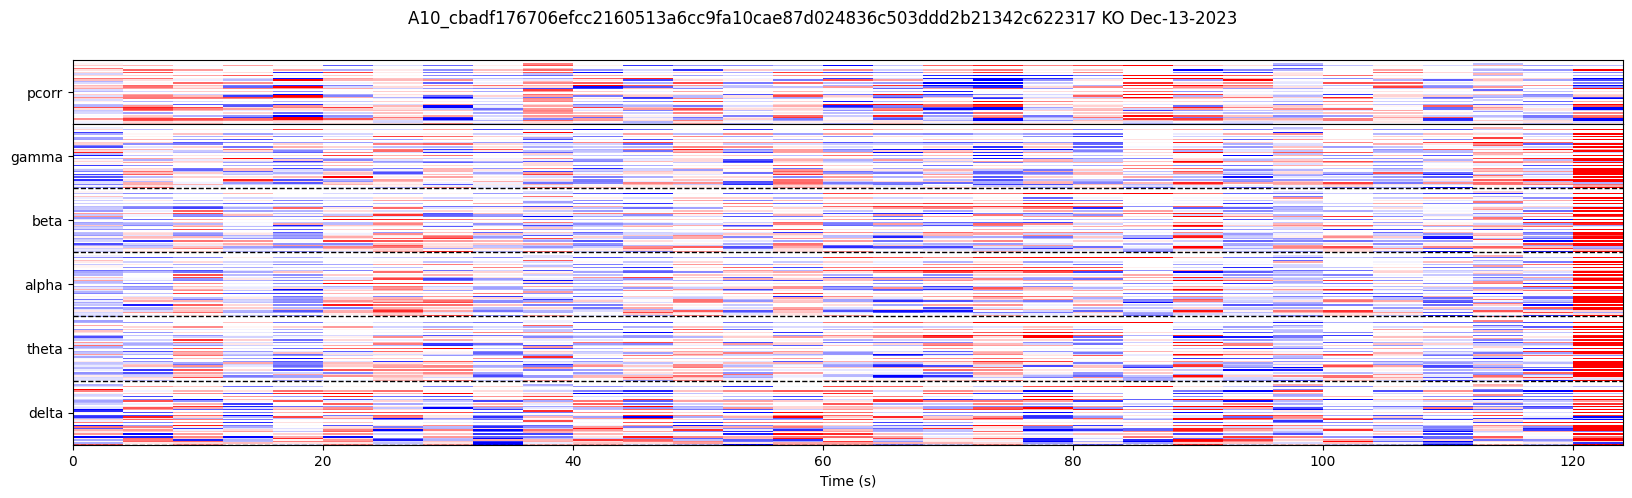

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/animal.py:430: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10 ** (b + m * np.log10(freqs)), c=f"C{j}", alpha=0.75)


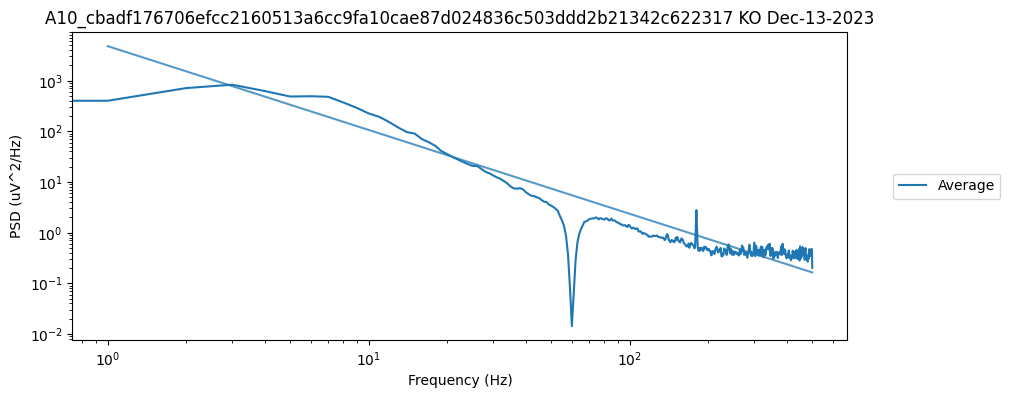

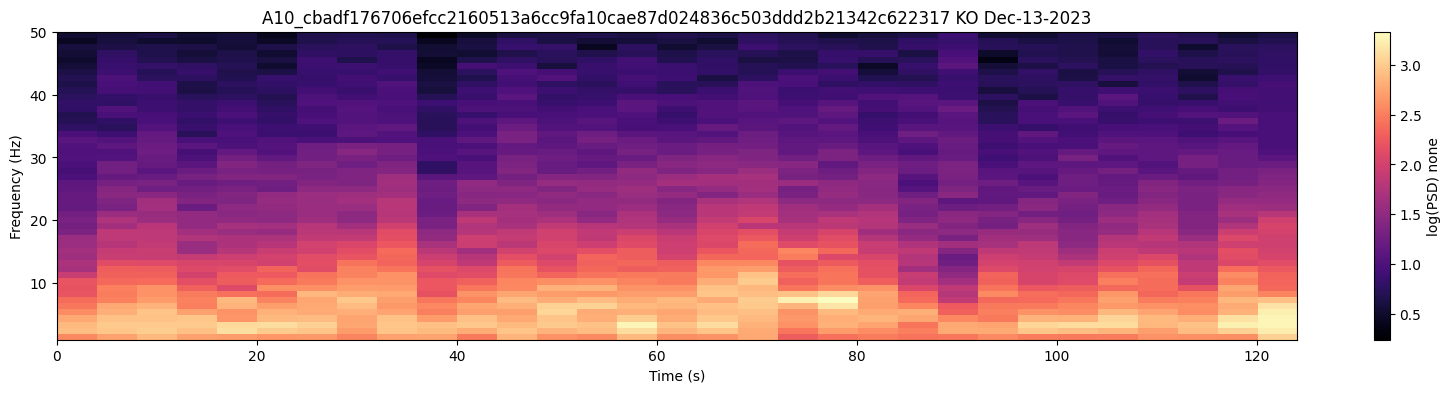

In [49]:
logger.setLevel(logging.WARNING)
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center', features=['pcorr', 'cohere'])
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

In [50]:
# war = visualization.WindowAnalysisResult.load_pickle_and_json('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars-sox5-collapsed-6-isday/011622_cohort4_group4_3mice_MMutOLD_FMUT_FMUT_FWT FMUT(2)')
# war.result.head(1)

In [51]:
war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars/A10').resolve())
# war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars-sox5-2/061022_group 9 M1, M2, M3 group9_M1_Cage1').resolve())
# war.result = war.result.head(2)
res1 = war.get_result(['all'], allow_missing=True)
# war.aggregate_time_windows()
war.add_unique_hash()
war.filter_all()
res2 = war.get_result(['all'], allow_missing=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 
#                       'display.max_colwidth', 1000, 'display.width', None):
display(res1)
display(res2)

2025-08-27 17:07:42,290 - WARNING - Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,291 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,292 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,292 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,293 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,294 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,295 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-08-27 17:07:42,296 - WARNING - Intan

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:544: UserWarning: Dropping column 'index'
  warnings.warn("Dropping column 'index'")


Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


animalday animal        day genotype  duration endfile  \
0   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
1   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
2   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
3   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
4   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
5   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
6   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
7   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
8   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
9   A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
10  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
11  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
12  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
13  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
14  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
15  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
16  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
17  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
18  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
19  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
20  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
21  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
22  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
23  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
24  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
25  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
26  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
27  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
28  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
29  A10 KO Dec-13-2023    A10 2023-12-13       KO      4.00    None   
30  A10 KO Dec-13-2023    A10 2023-12-13       KO      0.36    None   

                 timestamp  isday  \
0  2023-12-13 11:15:31.640   True   
1  2023-12-13 11:15:35.640   True   
2  2023-12-13 11:15:39.640   True   
3  2023-12-13 11:15:43.640   True   
4  2023-12-13 11:15:47.640   True   
5  2023-12-13 11:15:51.640   True   
6  2023-12-13 11:15:55.640   True   
7  2023-12-13 11:15:59.640   True   
8  2023-12-13 11:16:03.640   True   
9  2023-12-13 11:16:07.640   True   
10 2023-12-13 11:16:11.640   True   
11 2023-12-13 11:16:15.640   True   
12 2023-12-13 11:16:19.640   True   
13 2023-12-13 11:16:23.640   True   
14 2023-12-13 11:16:27.640   True   
15 2023-12-13 11:16:31.640   True   
16 2023-12-13 11:16:35.640   True   
17 2023-12-13 11:16:39.640   True   
18 2023-12-13 11:16:43.640   True   
19 2023-12-13 11:16:47.640   True   
20 2023-12-13 11:16:51.640   True   
21 2023-12-13 11:16:55.640   True   
22 2023-12-13 11:16:59.640   True   
23 2023-12-13 11:17:03.640   True   
24 2023-12-13 11:17:07.640   True   
25 2023-12-13 11:17:11.640   True   
26 2023-12-13 11:17:15.640   True   
27 2023-12-13 11:17:19.640   True   
28 2023-12-13 11:17:23.640   True   
29 2023-12-13 11:17:27.640   True   
30 2023-12-13 11:17:31.640   True   

                                                  rms  \
0   [45.94368, 79.14001, 35.04157, 72.76703, 49.01...   
1   [17.3866, 104.45948, 17.702438, 87.68797, 40.2...   
2   [21.215878, 101.42183, 17.911005, 85.187965, 4...   
3   [16.124065, 86.00607, 14.081838, 77.030235, 47...   
4   [18.514662, 95.01182, 19.664528, 86.265015, 54...   
5   [23.87738, 95.44384, 23.737915, 80.19445, 50.5...   
6   [17.575134, 114.56625, 16.799383, 84.014496, 3...   
7   [18.340143, 83.75154, 15.620064, 96.09968, 40....   
8   [17.474148, 109.268486, 12.681339, 92.

animalday  \
0   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
1   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
2   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
3   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
4   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
5   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
6   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
7   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
8   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
9   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
10  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
11  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
12  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
13  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
14  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
15  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
16  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
17  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
18  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
19  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
20  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
21  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
22  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
23  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
24  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
25  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
26  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
27  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
28  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
29  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   
30  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4...   

                                               animal        day genotype  \
0   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
1   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
2   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
3   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
4   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
5   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
6   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
7   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
8   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
9   A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
10  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
11  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
12  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
13  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
14  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
15  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
16  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
17  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
18  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
19  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
20  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
21  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
22  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
23  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
24  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
25  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
26  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-13       KO   
27  A10_cc7a510017b8397aa96a54721f5f2474f3fdf57de4... 2023-12-1

In [52]:
print(war.bad_channels_dict)
# war.get_filter_reject_channels_by_recording_session()
# war.filter_all()

{}


In [ ]:
logger.setLevel(logging.INFO)
wars = []
# animal_ids = ['A5', 'A10', 'F22']
animal_ids = [p for p in Path("./test-wars-sox5-collapsed-9-isday").glob("*") if p.is_dir()]
bad_animal_ids = []
animal_ids = [p for p in animal_ids if p.name not in bad_animal_ids]
print([p.name for p in animal_ids])

for i, animal_id in enumerate(animal_ids):
    war = visualization.WindowAnalysisResult.load_pickle_and_json(animal_id)
    # if i == 0:
    #     display(war.result)
    # if war.genotype in ['FWT', 'FHet', 'FMut']:
    # if war.genotype in ['MWT', 'MHet', 'MMut']:

    war.add_unique_hash(4)
    war.reorder_and_pad_channels(["LMot", "RMot", "LBar", "RBar", "LAud", "RAud", "LVis", "RVis"])
    wars.append(war)
    
# Sort wars by genotype in order MWT, MHet, MMut
genotype_order = ['MWT', 'MHet', 'MMut', 'FWT', 'FHet', 'FMut']
# wars = sorted(wars, key=lambda x: genotype_order.index(x.genotype))


plot_order = constants.DF_SORT_ORDER.copy()
plot_order['genotype'] = genotype_order
ep = visualization.ExperimentPlotter(
    wars=wars,
    exclude=["nspike", "lognspike"],
    # exclude=["nspike", "lognspike", "pcorr", "cohere"],
    # exclude=["nspike", "psdfrac", "logrms", "logampvar", "logpsdtotal", "lognspike", "logpsdband", "logpsdfrac"],
    plot_order=plot_order
)

['071321_Cohort 3_AM4_CF1_DF3_FF6 DF3', '031722_cohort_6_group1_3mice_MMUT_MMUT_MWT M7', '012022_cohort4_group5_3mice__FWT_MMUT_FMUT FWT', '031021_cohort 2, group 3 and 4 #8 Cage 1A', '031921_cohort 2 group 5 and group 6 mouse M5 cage2A', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 BF3', '031621_cohort 2 group 2 and group 5 F10', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 AM3', '031021_cohort 2, group 3 and 4 #2 Cage 2A', '010822_cohort4_group2_2mice_MWT_MHET M10', '011322_cohort4_group3_4mice_AllM_MT_WT_HET_WT M2', '031722_cohort_6_group1_3mice_MMUT_MMUT_MWT MMUT(2)', ' 032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-Recording', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CM9', '062122_group 10_2mice_F7Het_F9Mut F9', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CM5', '031621_cohort 2 group 2 and group 5 M2', '061322_Group10 M8, M10 M10', '081922_cohort10_group4_2mice_FMut_FHet FMUT', '011622_cohort4_group4_3mice_MMutOLD_FMUT_FMUT_FWT FMUT_', '061022_group 9 M1, M2, M3

In [54]:
df = ep.pull_timeseries_dataframe(feature='zcohere', groupby=['genotype', 'isday'], **ep._get_default_pull_timeseries_params())
# display(df)
df = ep.pull_timeseries_dataframe(feature='zcohere', groupby=['genotype', 'isday'], average_groupby=True)
# display(df)
# check that ep is reporting the right thing for 

2025-08-27 17:07:49,540 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-27 17:07:49,693 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


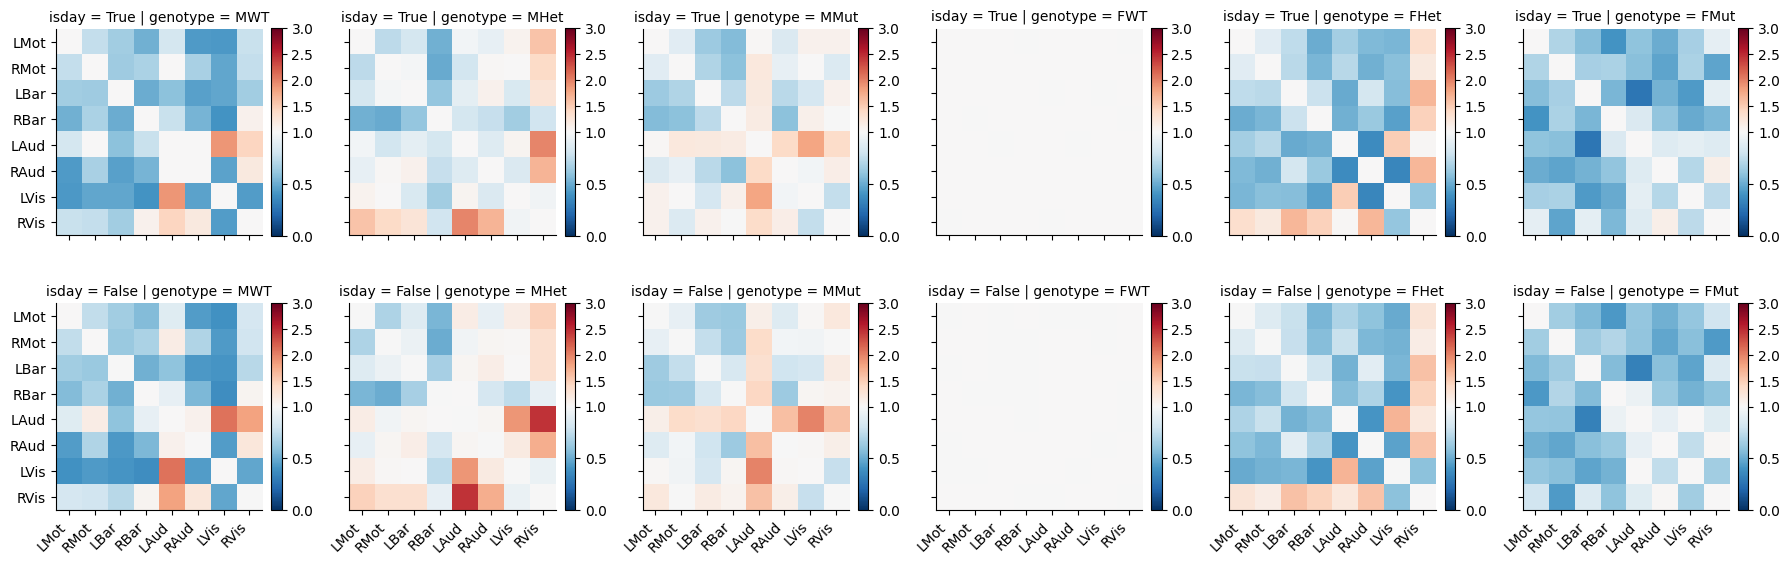

In [55]:
logger.setLevel(logging.WARNING)

# ep.plot_diffheatmap('cohere', groupby=['genotype', 'isday'], baseline_key='FWT', baseline_groupby='genotype')
# ep.plot_heatmap('cohere', groupby=['genotype', 'isday'], col='band', row='isday')

# save_fol = "/home/dongjp/Downloads/8-21 ep"
# figs = ep.plot_heatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars='band', col='genotype', row='isday')
# figs = ep.plot_diffheatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars=['band'], baseline_key=False, baseline_groupby='isday', col='genotype', row='isday')
# figs = ep.plot_diffheatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars=['band'], baseline_key='MWT', baseline_groupby='genotype', col='genotype', row='isday')

ep.pull_timeseries_dataframe(
    feature="zpcorr", groupby=["genotype", "isday"]
)
# display(df)
# figs = ep.plot_diffheatmap_faceted(
#     "zpcorr",
#     groupby=["genotype", "isday"],
#     facet_vars=["isday"],
#     baseline_key="MWT",
#     baseline_groupby="genotype",
#     operation="divide",
#     col="genotype",
#     row="isday",
#     df=df,
#     cmap="RdBu_r",
#     norm=colors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=3),
# )
figs = ep.plot_diffheatmap(
    "zpcorr",
    groupby=["genotype", "isday"],
    baseline_key="FWT",
    baseline_groupby="genotype",
    operation="divide",
    norm=colors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=3),
)

# # Create save folder if it doesn't exist
# Path(save_fol).mkdir(parents=True, exist_ok=True)

# # Save each figure with its title
# for i, fig in enumerate(figs):
#     # Get the title from the figure
#     title = fig.figure._suptitle.get_text()

#     # Clean up title to make it filename-safe
#     filename = title.replace(" | ", "_").replace("=", "_").replace(" ", "_")
#     filename = f"cohere {filename} subtract WT"

#     # Save figure
#     fig.figure.savefig(Path(save_fol) / f"{filename}.png", bbox_inches="tight", dpi=300)

# from pathlib import Path

In [56]:
def process_feature_dataframe(df, feature):
    """Process feature dataframe by adding categorical columns and pivoting.

    Args:
        df (pd.DataFrame): Input dataframe with feature data
        feature (str): Name of feature being processed

    Returns:
        tuple: (processed_df, pivoted_df)
    """
    if feature in ["logpsdfrac", "logpsdband", "psdband", "cohere", "zcohere", "imcoh", "zimcoh"]:
        groupby = ["animal", "isday", "band"]
        # band_order = ["delta", "theta", "alpha", "beta", "gamma"]
        # df["band"] = pd.Categorical(df["band"], categories=band_order, ordered=True)
    elif feature in ["pcorr", "zpcorr", "psd", "normpsd"]:
        groupby = ["animal", "isday"]
    else:
        raise ValueError(f"Feature {feature} not supported")
    if "isday" not in df.columns:
        groupby.remove("isday")

    # genotype_order = ["FWT", "FHet", "FMut", "MWT", "MHet", "MMut"]
    # gene_order = ["WT", "Het", "Mut"]

    # df["genotype"] = pd.Categorical(df["genotype"], categories=genotype_order, ordered=True)
    df["sex"] = df["genotype"].map(
        lambda x: "Male" if x in ["MWT", "MHet", "MMut"] else "Female" if x in ["FWT", "FHet", "FMut"] else None
    )
    df["gene"] = df["genotype"].map(
        lambda x: "WT"
        if x in ["MWT", "FWT"]
        else "Het"
        if x in ["MHet", "FHet"]
        else "Mut"
        if x in ["MMut", "FMut"]
        else x
    )
    # df["gene"] = pd.Categorical(df["gene"], categories=gene_order, ordered=True)
    if "isday" in df.columns:
        df["isday"] = df["isday"].map(lambda x: "Day" if x else "Night")

    # if "band" in df.columns:
    #     df = df.sort_values(["band", "gene", "sex"])
    # else:
    #     df = df.sort_values(["gene", "sex"])

    df_pivot = df.pivot_table(
        index=["animal", "gene", "sex"] if "freq" not in df.columns else ["animal", "gene", "sex", "freq"],
        columns=["isday", "band"] if ("isday" in df.columns and "band" in df.columns) else "band" if "band" in df.columns else "isday" if "isday" in df.columns else None,
        values=feature,
        aggfunc="mean",
        observed=True,
    ).reset_index()

    if isinstance(df_pivot.columns, pd.MultiIndex):
        df_pivot.columns = [
            "-".join(str(x) for x in col if x != "") if isinstance(col, tuple) else col for col in df_pivot.columns
        ]
    df_pivot.columns.name = None
    # if "band" in df_pivot.columns:
    #     df_pivot = df_pivot.sort_values(["band", "gene", "sex"])
    # else:
    #     df_pivot = df_pivot.sort_values(["gene", "sex"])

    return df, df_pivot

In [57]:
save_folder = '/home/dongjp/Downloads/8-26 ep 2'
save_files = True
save_folder = Path(save_folder)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
display(save_folder)

PosixPath('/home/dongjp/Downloads/8-26 ep 2')

In [58]:
df = ep.pull_timeseries_dataframe(feature="pcorr", groupby=["animal", "genotype"], collapse_channels=True, average_groupby=True)
display(df)
df, df_pivot = process_feature_dataframe(df, "pcorr")
display(df)
# display(df_pivot)

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)


animal genotype  channel     pcorr
1        M7_4894b9cd      MWT  average  0.221478
7       AM3_f586cb81      MWT  average  0.453133
9       M10_0d05dfab      MWT  average  0.385836
10       M2_3e14d24f      MWT  average  0.096560
13      CM9_6b41c197      MWT  average  0.720895
..               ...      ...      ...       ...
29     FMUT_d53be344     FMut  average  0.422422
34  FMUT(2)_559d9ebc     FMut  average  0.335858
35     FMUT_f69c9cd9     FMut  average  0.391426
43     FMUT_15a3f069     FMut  average  0.329181
55     FMUT_80ee0dc4     FMut  average  0.622607

[62 rows x 4 columns]

animal genotype  channel     pcorr     sex gene
1        M7_4894b9cd      MWT  average  0.221478    Male   WT
7       AM3_f586cb81      MWT  average  0.453133    Male   WT
9       M10_0d05dfab      MWT  average  0.385836    Male   WT
10       M2_3e14d24f      MWT  average  0.096560    Male   WT
13      CM9_6b41c197      MWT  average  0.720895    Male   WT
..               ...      ...      ...       ...     ...  ...
29     FMUT_d53be344     FMut  average  0.422422  Female  Mut
34  FMUT(2)_559d9ebc     FMut  average  0.335858  Female  Mut
35     FMUT_f69c9cd9     FMut  average  0.391426  Female  Mut
43     FMUT_15a3f069     FMut  average  0.329181  Female  Mut
55     FMUT_80ee0dc4     FMut  average  0.622607  Female  Mut

[62 rows x 6 columns]

In [59]:
%%script true
logger.setLevel(logging.INFO)

# features = ['psdtotal', 'psdslope', 'logpsdtotal']
# features = ["pcorr", "cohere", "logpsdfrac", "logpsdband"]
# features = ["zpcorr", "zcohere", "logpsdfrac", "logpsdband", "psdband", "psd", "normpsd"]
features = ["pcorr", "zpcorr", "cohere", "zcohere", "imcoh", "zimcoh", "logpsdfrac", "logpsdband", "psdband", "psd", "normpsd"]
# features = ["psd", "normpsd"]
feature_to_label = {
    "pcorr": "PCC",
    "cohere": "|Coherency|",
    "imcoh": "Imaginary Coherencey",
    "zpcorr": "z(PCC)",
    "zcohere": "z(|Coherencey|)",
    "zimcoh": "z(Imaginary Coherencey)",
    "logpsdfrac": "Log Percent Power",
    "logpsdband": "Log Band Power",
    "psdband": "Band Power ($\mu V^2$)",
    "psd": "PSD ($\mu V^2/Hz$)",
    "normpsd": "Normalized PSD",
}
# features = ["psdfrac"]
# features = ["psd", "normpsd"]
for feature in features:
    # df = ep.pull_timeseries_dataframe(feature=feature, groupby=["animal", "genotype", "isday"], collapse_channels=True)
    if feature == "normpsd":
        df = ep.pull_timeseries_dataframe(feature="psd", groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)
        df_total = ep.pull_timeseries_dataframe(feature="psdtotal", groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)
        
        df = df.merge(df_total, on=["animal", "genotype", "channel"], suffixes=("", "_total"))
        df["normpsd"] = df["psd"] / df["psdtotal"]
    else:
        df = ep.pull_timeseries_dataframe(feature=feature, groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)

    df, df_pivot = process_feature_dataframe(df, feature)

    if save_files:
        df.to_csv(save_folder / f"{feature}.csv")
        df_pivot.to_csv(save_folder / f"{feature}-pivot.csv")

    if feature in ["pcorr", "zpcorr"]:
        p = (
            so.Plot(df, x="sex", y=feature, color="gene", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge(empty="drop", gap=0.2))
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge(empty="drop", gap=0.2))
            .add(so.Dot(), so.Dodge(empty="drop", gap=0.2), so.Jitter(0.75, seed=42))
            # .add(
            #     so.Text(valign="top", fontsize=10),
            #     so.Dodge(empty="drop", gap=0.2),
            #     so.Jitter(0.5, seed=42),
            #     text="animal",
            # )
            .scale(marker=so.Nominal(["o", "s"], order=["Female", "Male"]))
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .layout(size=(6, 6))
            .label(y=feature_to_label[feature])
        )
        if save_files:
            p.save(save_folder / f"{feature}.tif", bbox_inches="tight", dpi=300)
        else:
            p.show()
    elif feature in ["logpsdfrac", "logpsdband", "psdband", "cohere", "zcohere", "imcoh", "zimcoh"]:
        p = (
            so.Plot(df, x="band", y=feature, color="gene", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge())
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
            .add(so.Dot(), so.Dodge(), so.Jitter(0.75, seed=42))
            # .add(
            #     so.Text(valign="top", fontsize=10),
            #     so.Dodge(),
            #     so.Jitter(seed=42),
            #     text="animal",
            # )
            .scale(marker=so.Nominal(["o", "s"], order=["Female", "Male"]))
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red", "blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .label(x="Frequency band", y=feature_to_label[feature])
        )
        p1 = p.layout(size=(10, 6), engine="tight")
        # p2 = p.add(
        #     so.Text(valign="top", fontsize=10),
        #     so.Dodge(),
        #     so.Jitter(seed=42),
        #     text="animal",
        # ).layout(size=(20, 10), engine="tight")

        if save_files:
            p1.save(save_folder / f"byband-{feature}.tif", bbox_inches="tight", dpi=300)
            # p2.save(save_folder / f"byband-{feature}-text.png", bbox_inches="tight")
        else:
            p1.show()
            # p2.show()

        # with mpl.rc_context(plt.style.library["bmh"] | sns.plotting_context("notebook")):
        # with mpl.rc_context(sns.plotting_context("notebook")):
        p = (
            so.Plot(df, x="gene", y=feature, color="band", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge())
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
            .add(so.Dot(), so.Dodge(), so.Jitter(0.75, seed=42))
            # .theme(plt.style.library['bmh'])
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=[blue, orange, red, green, purple, yellow, lightblue, black])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .layout(size=(10, 6), engine="tight")
            .label(x="Genotype", y=feature_to_label[feature])
        )
        # p = p.add(so.Text(valign="top", fontsize=10), so.Dodge(), so.Jitter(seed=42), text="animal")
        if save_files:
            p.save(save_folder / f"bygeno-{feature}.tif", bbox_inches="tight", dpi=300)
        else:
            p.show()
    elif feature == "psd" or feature == "normpsd":
        ylim = (1e-4, 1) if feature == "normpsd" else (0.3, 3000)
        for scale in [so.Continuous(), 'log']:
            p = (
                so.Plot(df, x="freq", y=feature, color="gene")
                .facet(col="sex", row="isday")
                .add(so.Line(), so.Agg()) # TODO norm manually in the dataframe and also plot bands. Norm by max value for each dataframe? or by max value for average genotype?
                .add(so.Band(), so.Est())
                .theme(
                    axes_style("ticks")
                    | sns.plotting_context("notebook")
                    | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red"])}
                    | {"axes.spines.right": False, "axes.spines.top": False}
                )
                .scale(x=scale, y=scale)
                .limit(x=(lambda x: (1,60) if callable(x) else (1,100))(scale), y=ylim)
                .layout(size=(10, 6))
                .label(x="Frequency (Hz)", y=feature_to_label[feature])
            )

            if save_files:
                p.save(save_folder / f"{feature}-{(lambda x: 'linear' if callable(x) else scale)(scale)}.tif", bbox_inches="tight", dpi=300)
            else:
                p.show()

In [60]:
df = ep.pull_timeseries_dataframe(feature="psd", groupby=["animal", "genotype", "isday"], collapse_channels=True)

df, df_pivot = process_feature_dataframe(df, "psd")


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)


In [62]:
# for feat in constants.LINEAR_FEATURE + ['psdband']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, 'animal')
#     # display(df)
#     # ep.plot_boxplot_2(feat, ['genotype', 'animalday'], collapse_channels=False)
#     ep.plot_catplot(feat, 'animal', kind='violin')

# ep.plot_catplot('psdband', ['animal', 'isday', 'animalday'], 
#                 x='animal',
#                 col='isday',
#                 hue='band',
#                 kind='boxen',
#                 collapse_channels=False,
#                 catplot_params={'showfliers': False})

In [63]:
# for feat in ['cohere']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, ['animal', 'isday'])
#     ep.plot_2d_feature_2(feat, ['animal', 'isday'], row='band')

In [64]:
save_folder = '/home/dongjp/Downloads/8-27 heatmaps'
save_files = True
save_folder = Path(save_folder)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
display(save_folder)

PosixPath('/home/dongjp/Downloads/8-27 heatmaps')

In [69]:
ep = visualization.ExperimentPlotter(
    wars=wars,
    plot_order=plot_order,
)
df = ep.pull_timeseries_dataframe('cohere', groupby='animal')

2025-08-28 13:35:18,374 - INFO - channel_names: [['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'R

2025-08-27 17:08:14,000 - INFO - channel_names: [['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'R

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(


2025-08-27 17:08:38,162 - INFO - feature: cohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:08:38,341 - INFO - feature: imcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(


2025-08-27 17:09:00,670 - INFO - feature: imcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:09:00,854 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(


2025-08-27 17:09:28,037 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:09:28,242 - INFO - feature: zimcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(


2025-08-27 17:09:45,527 - INFO - feature: zimcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:09:45,708 - INFO - feature: pcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


2025-08-27 17:09:49,277 - INFO - feature: pcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:09:49,367 - INFO - feature: zpcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-27 17:09:52,764 - INFO - feature: zpcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True
2025-08-27 17:09:52,851 - INFO - channel_names: [['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:03,551 - INFO - feature: imcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:13,830 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:22,412 - INFO - feature: zimcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:32,742 - INFO - feature: pcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


2025-08-27 17:10:34,583 - INFO - feature: zpcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


2025-08-27 17:10:36,481 - INFO - channel_names: [['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'RBar', 'LAud', 'RAud', 'LVis', 'RVis'], ['LMot', 'RMot', 'LBar', 'R

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:46,413 - INFO - feature: imcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:10:56,334 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:11:08,344 - INFO - feature: zimcoh, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:849: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ):  # TODO look at everywhere else that groupby is performed and consider changing to sort=False
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

2025-08-27 17:11:18,583 - INFO - feature: pcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


2025-08-27 17:11:20,424 - INFO - feature: zpcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1022: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  )  # REVIEW maybe these should use dropna=True
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1033: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  else:


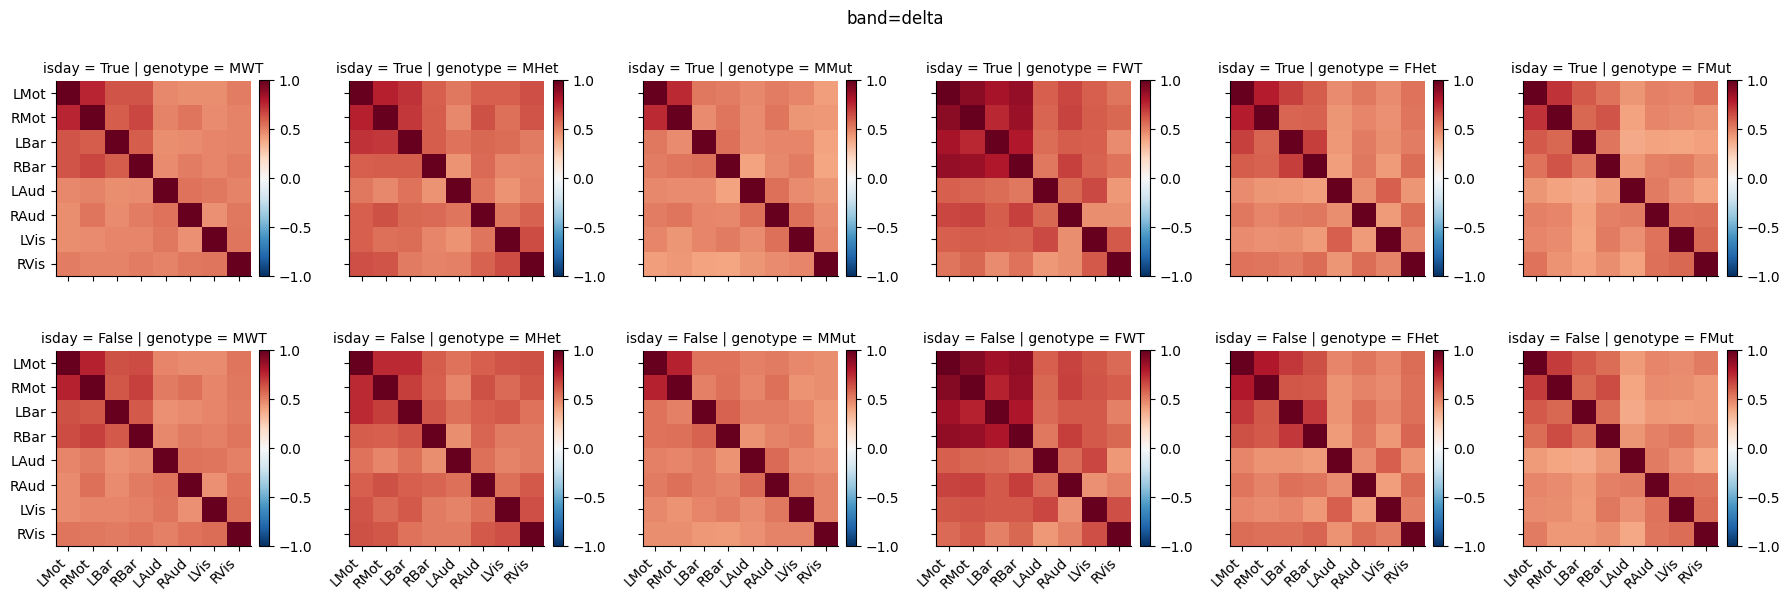

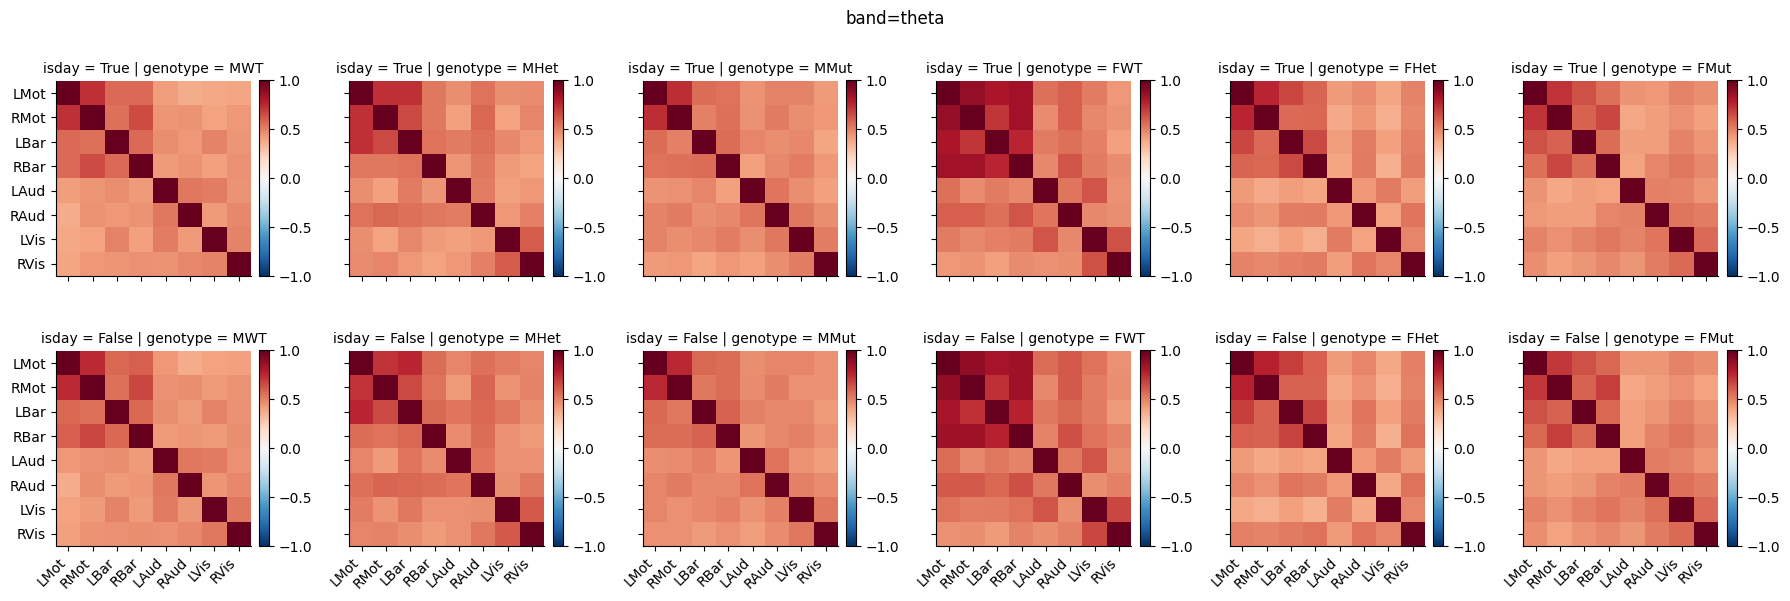

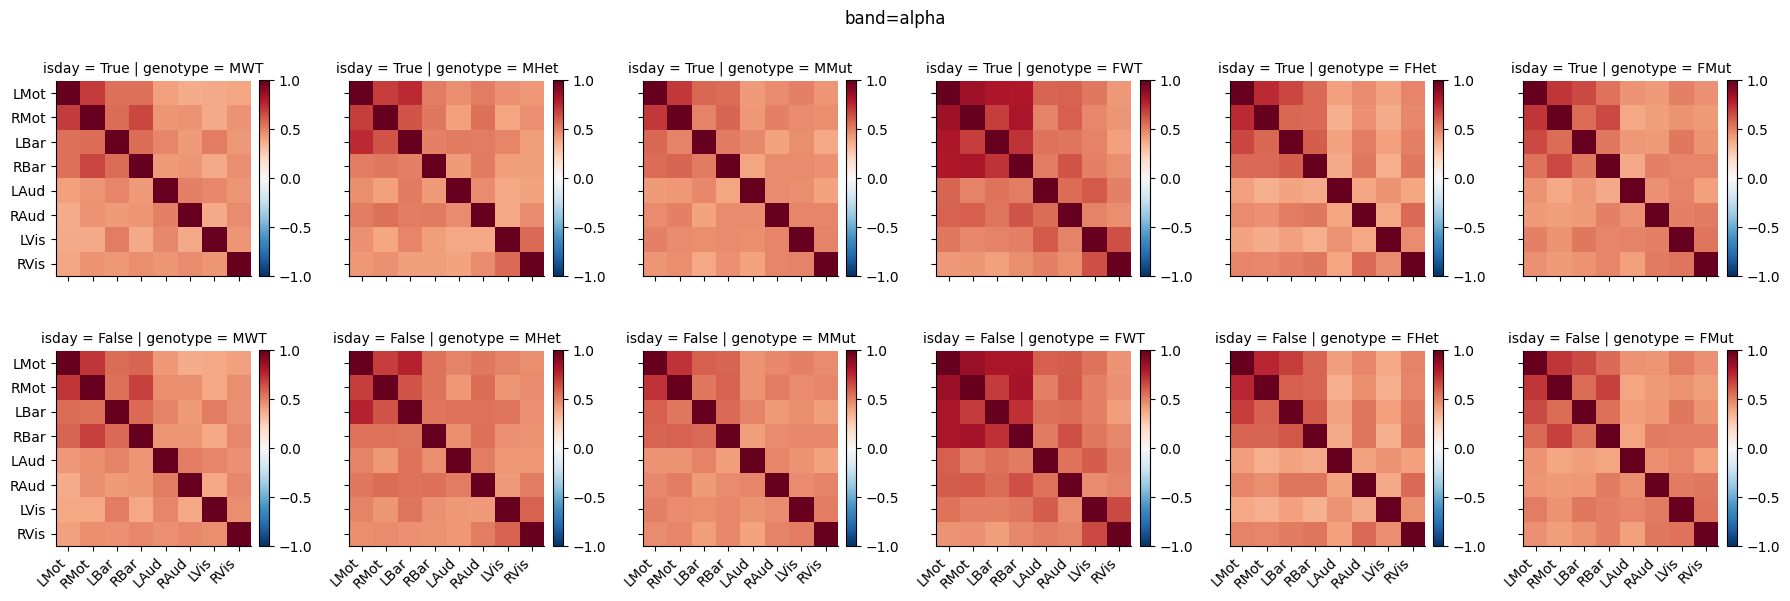

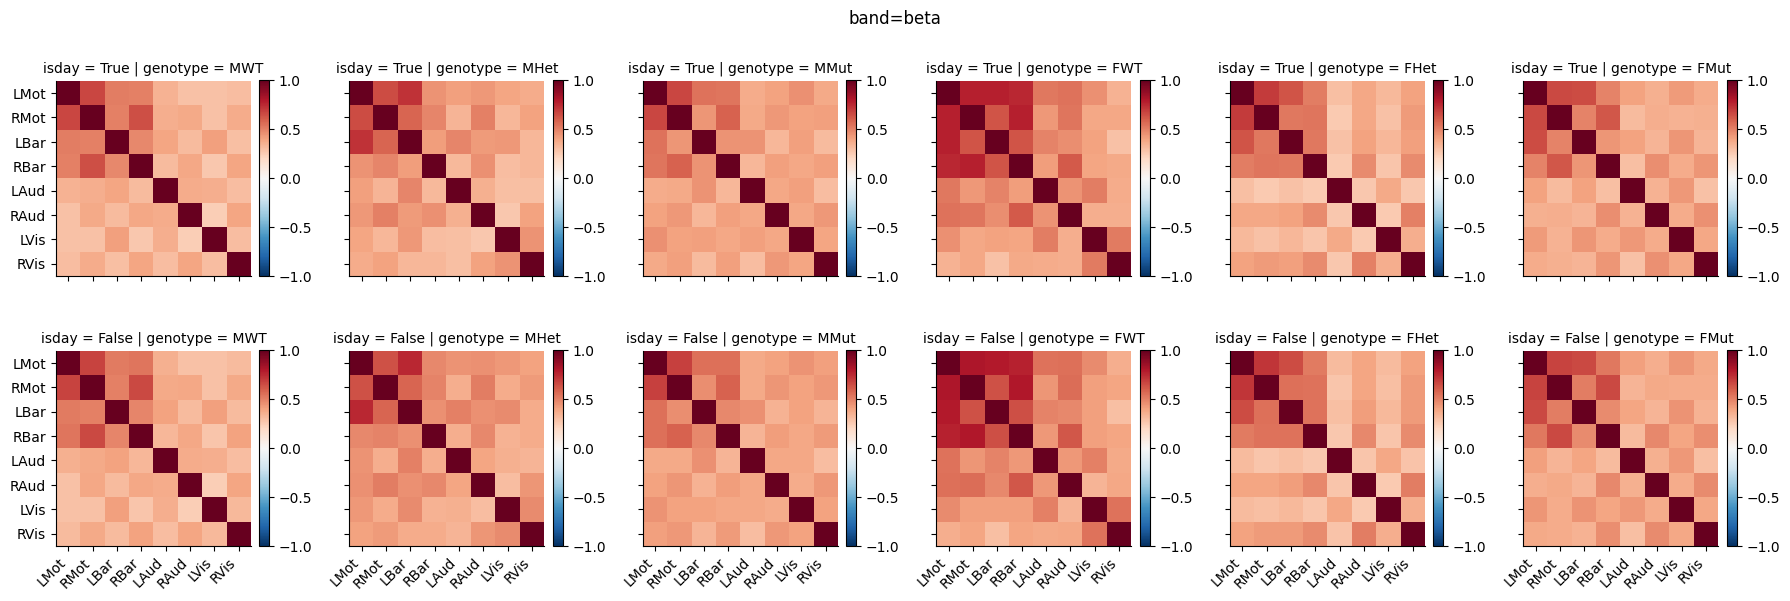

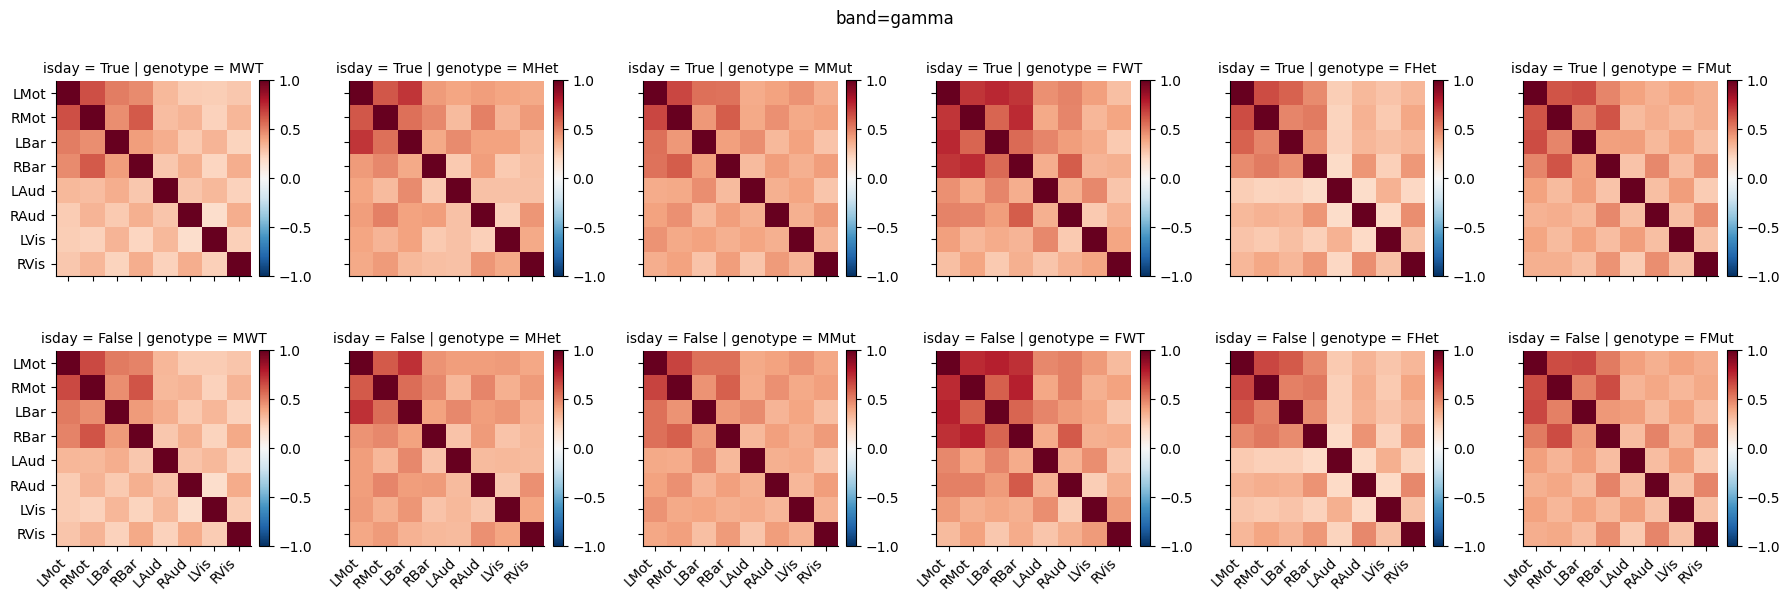

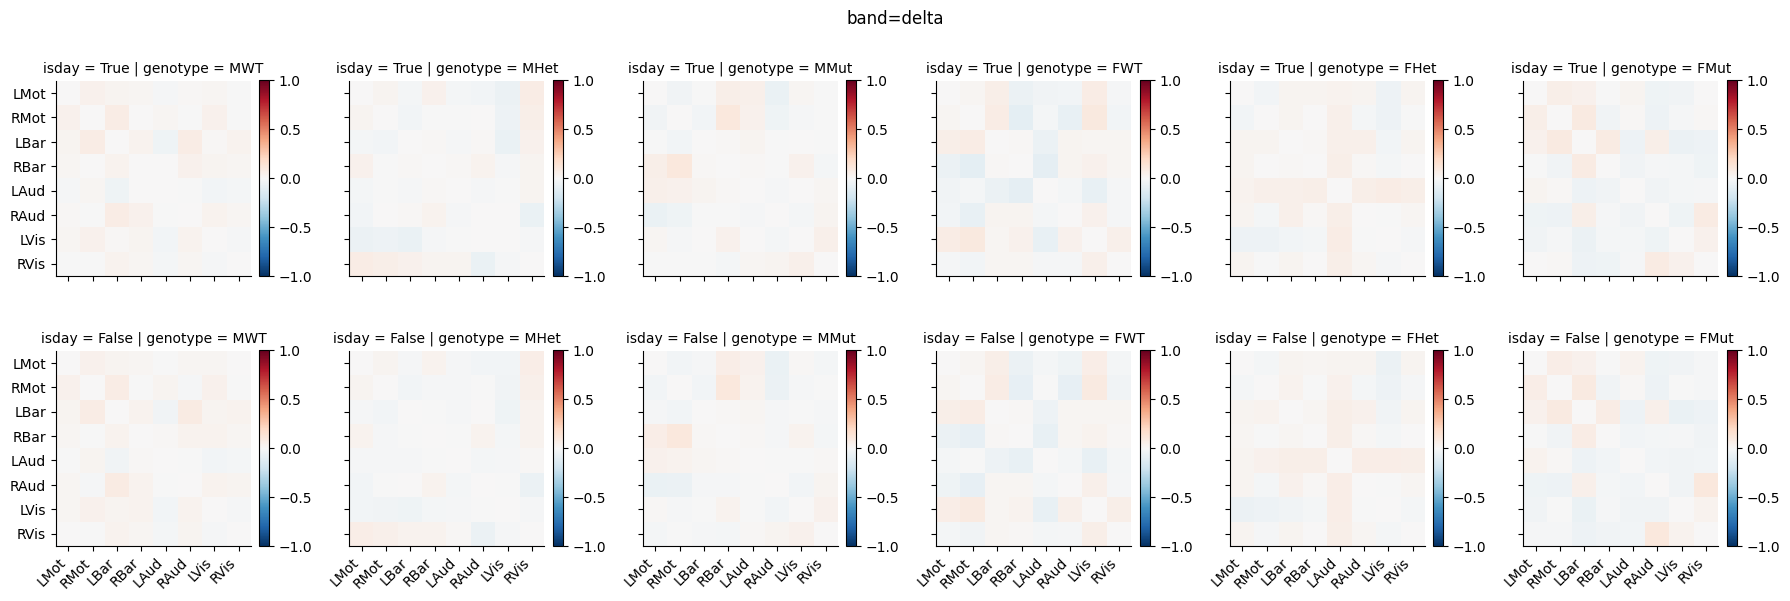

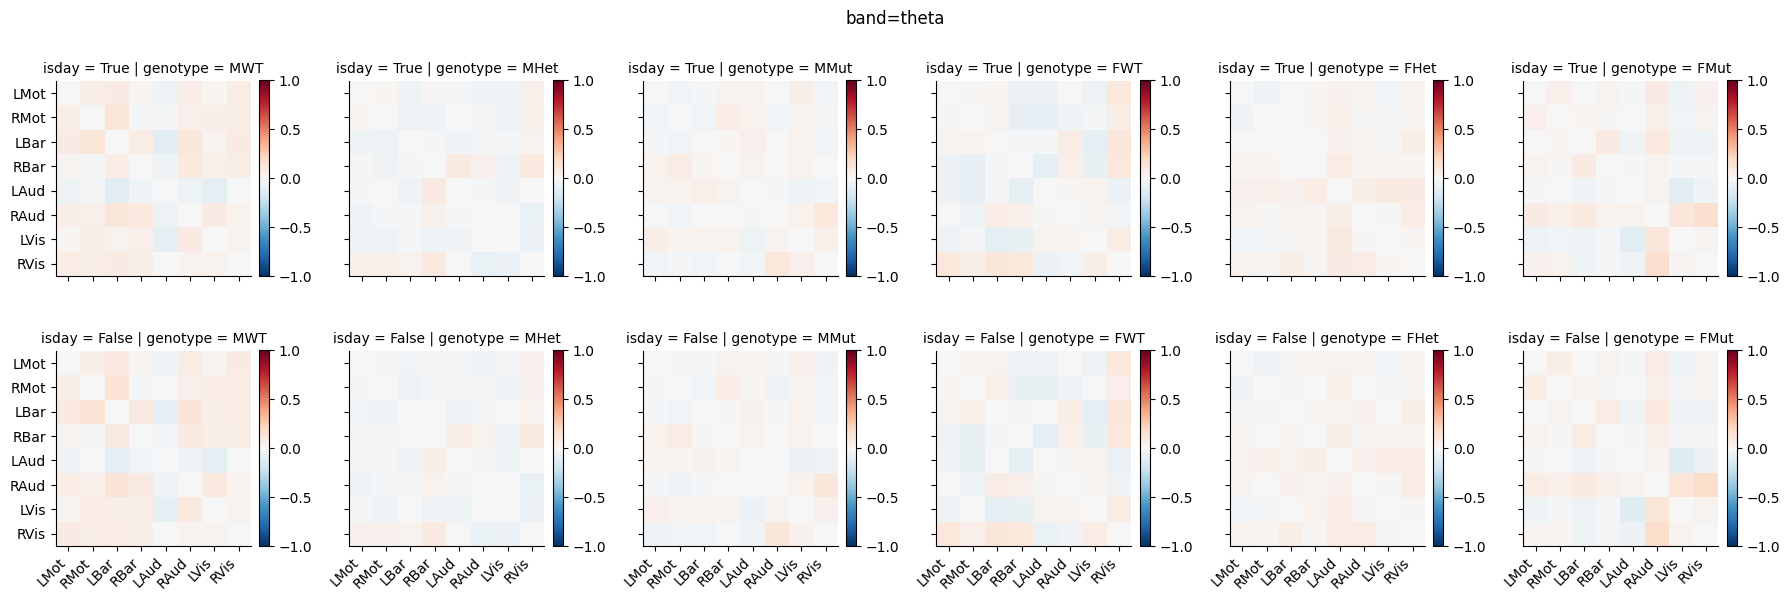

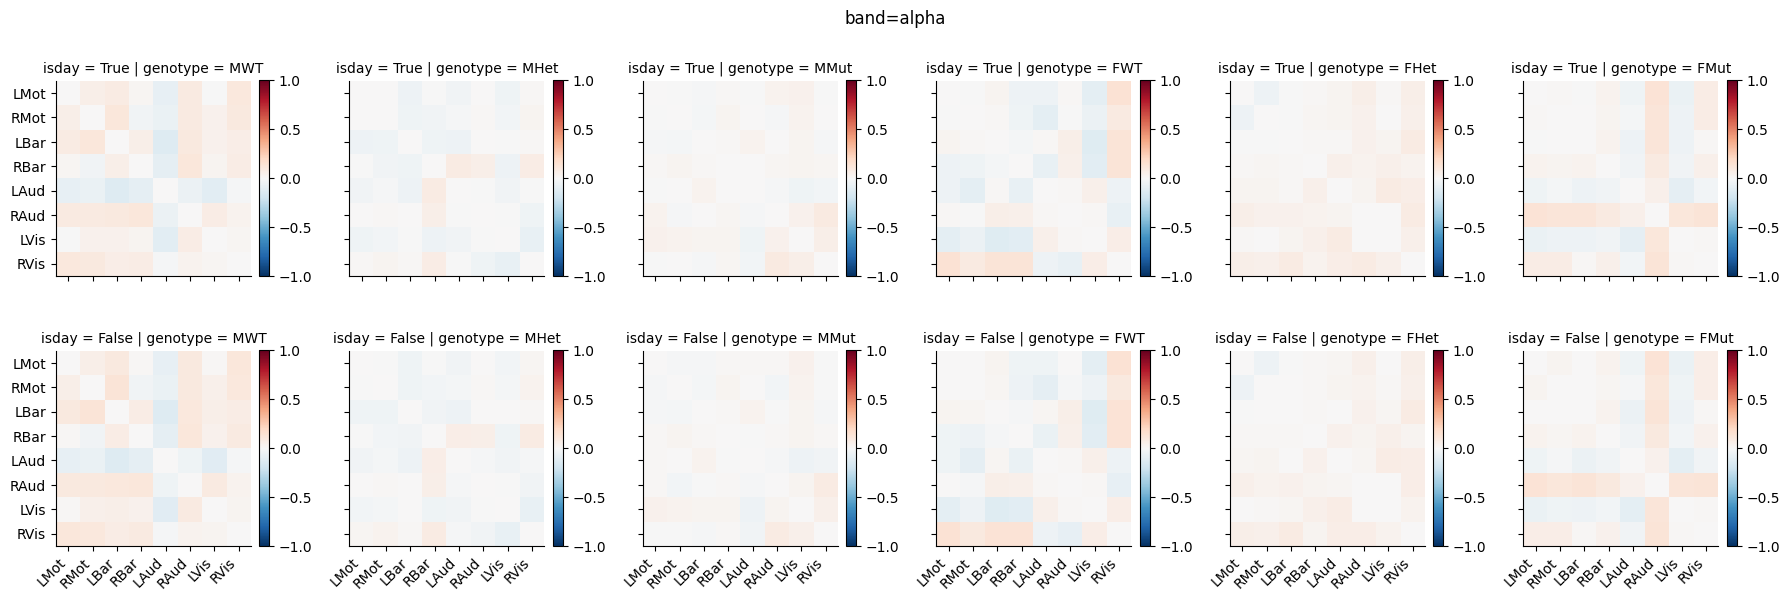

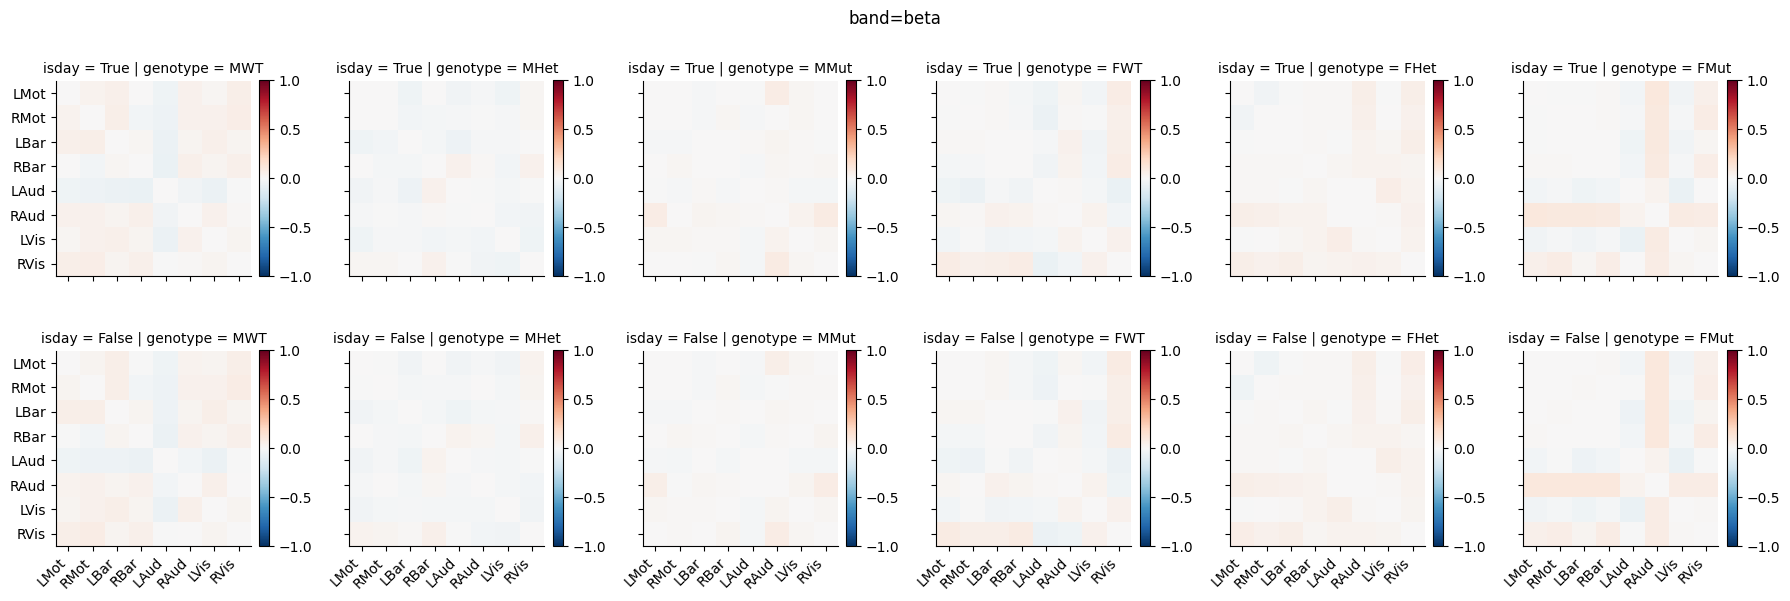

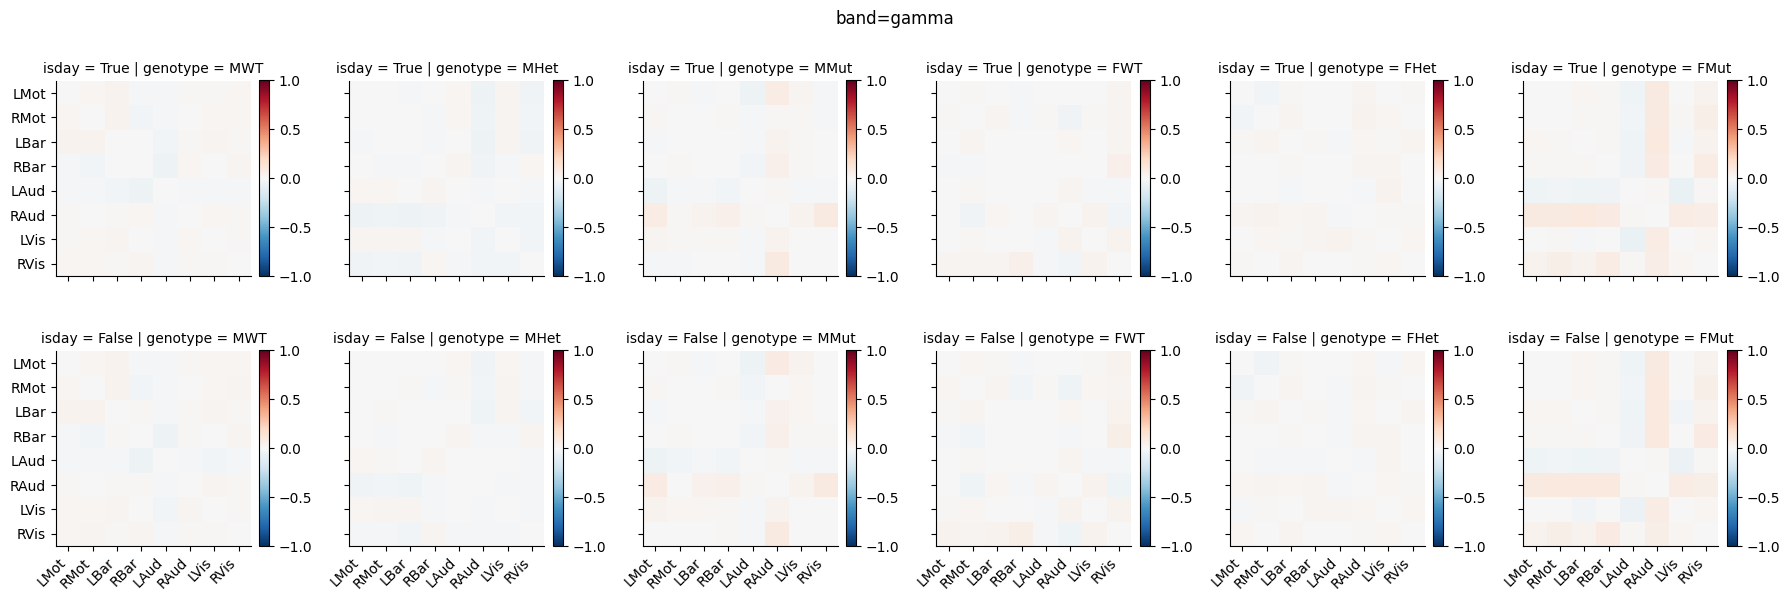

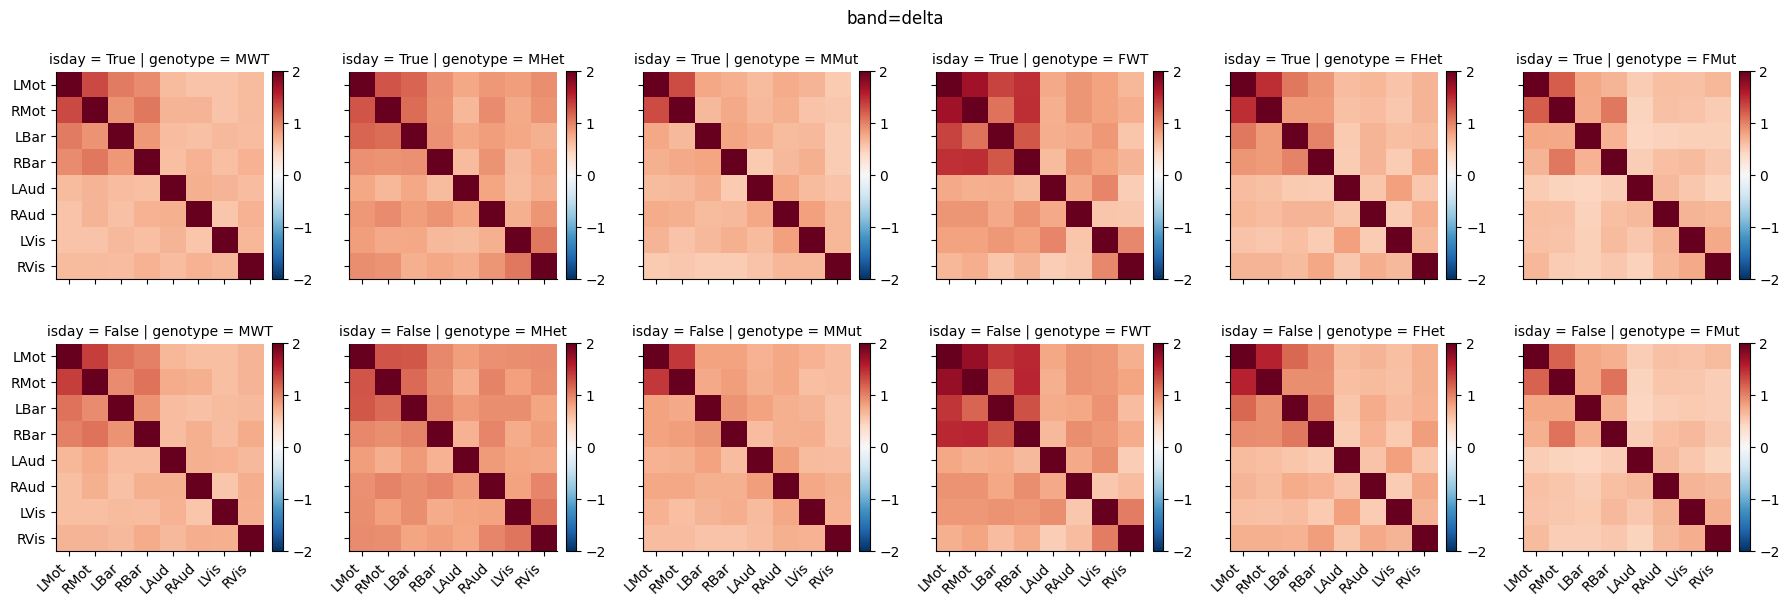

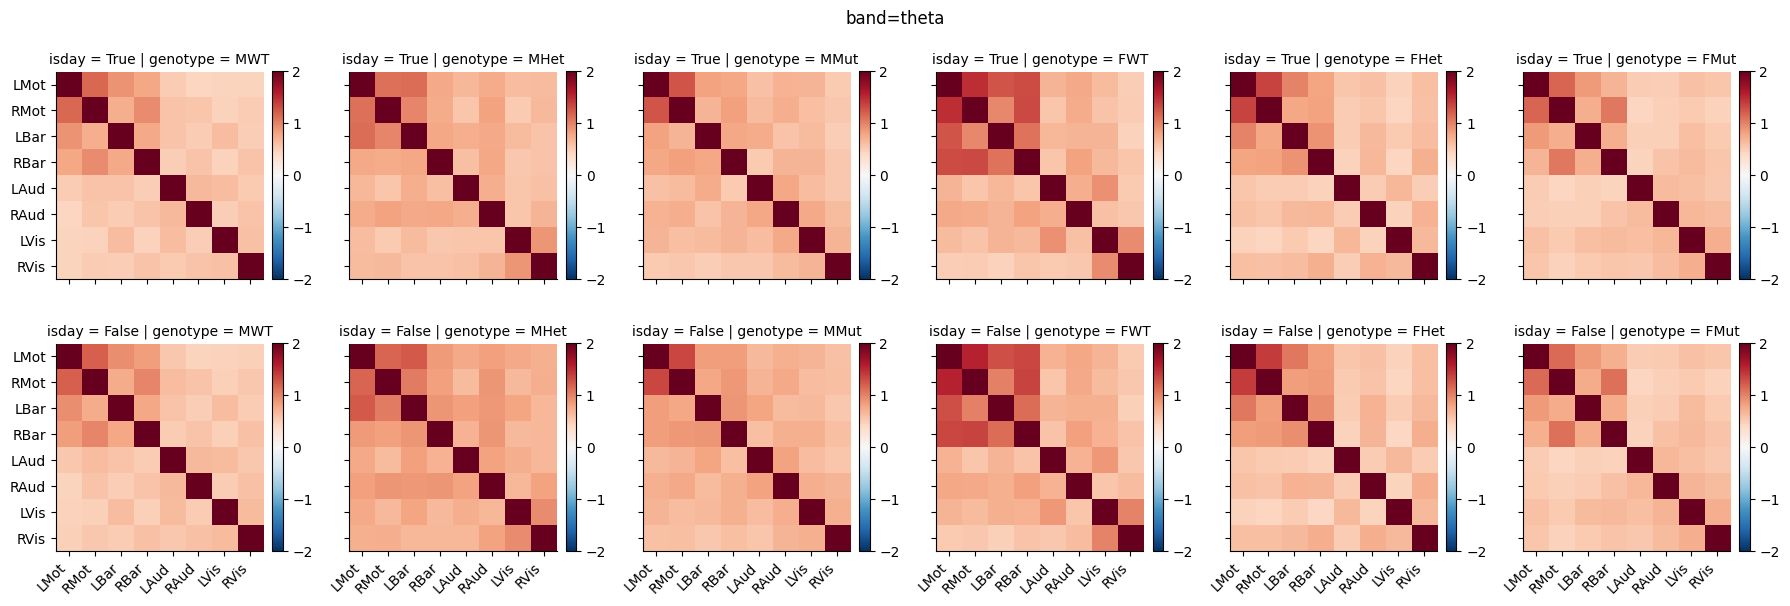

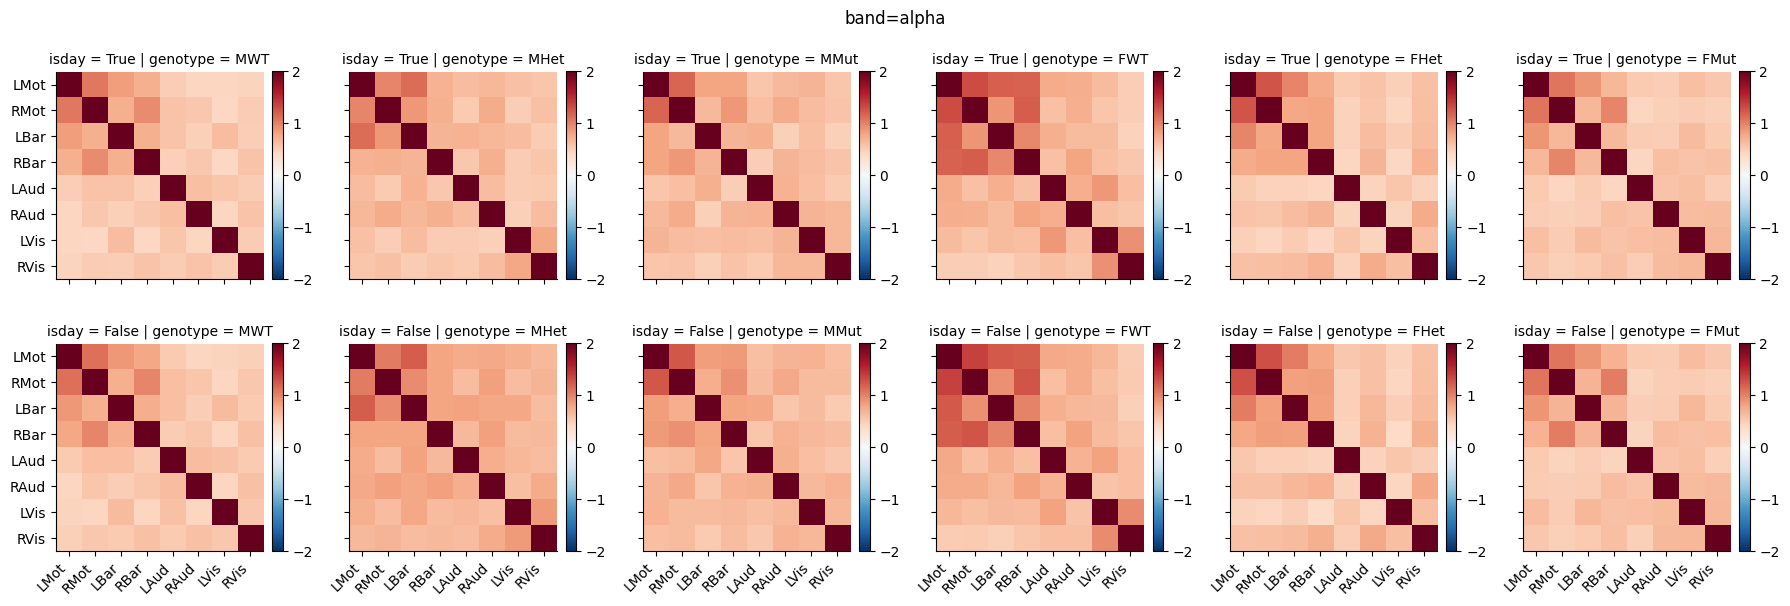

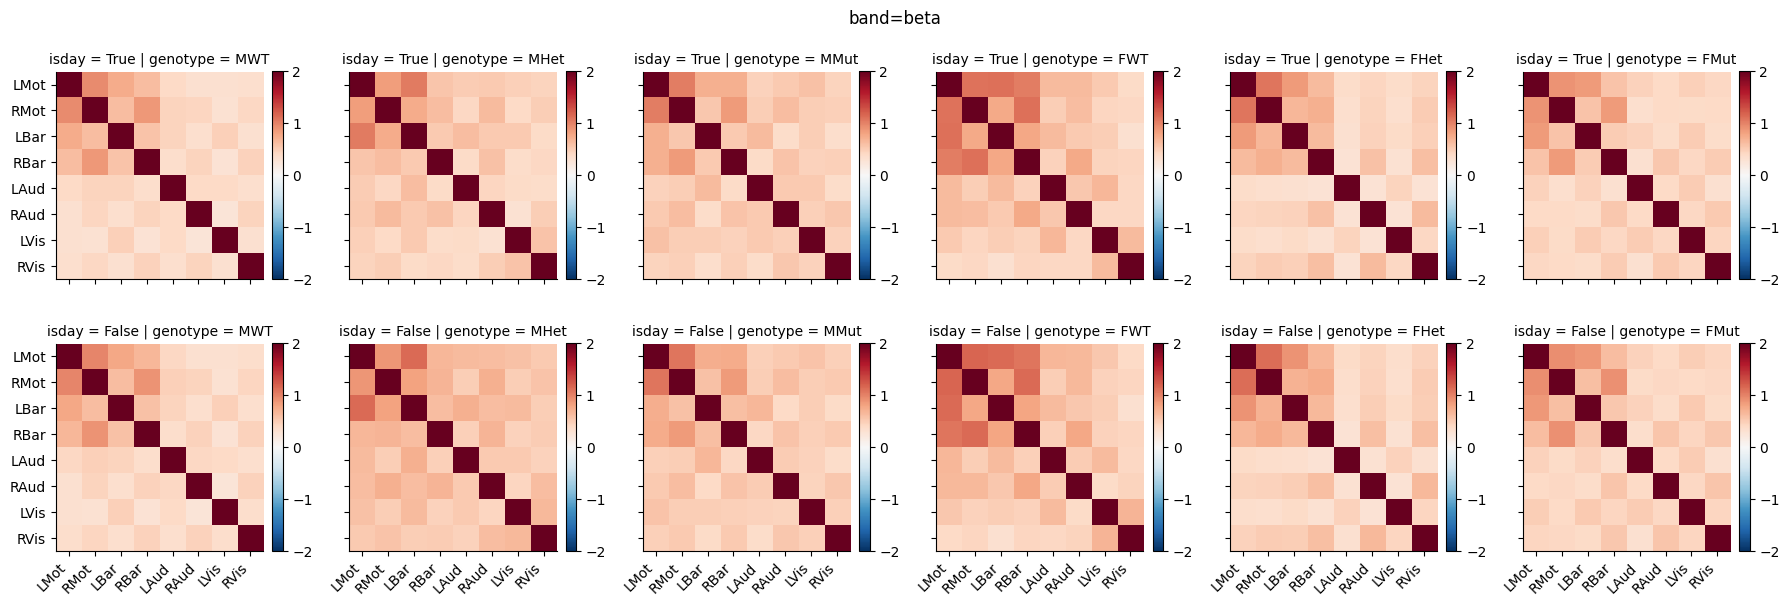

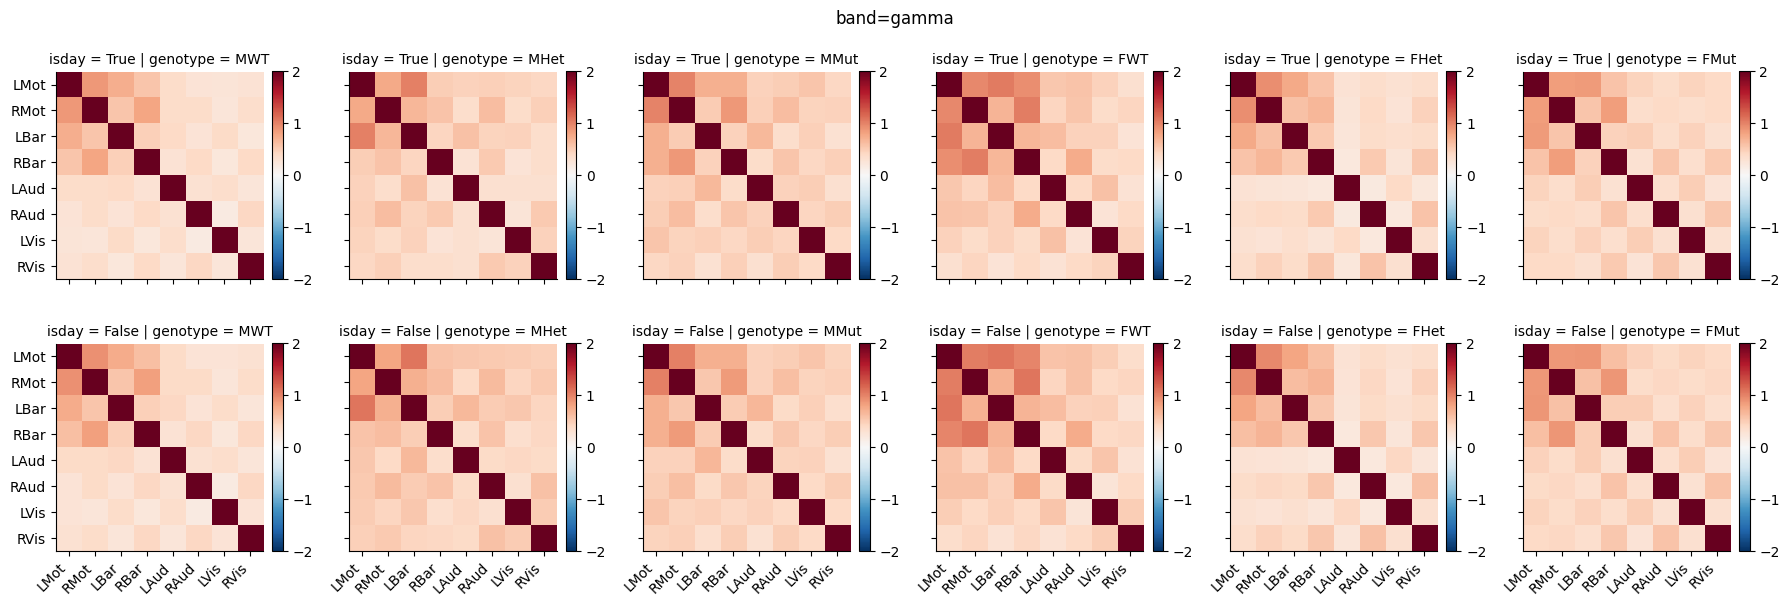

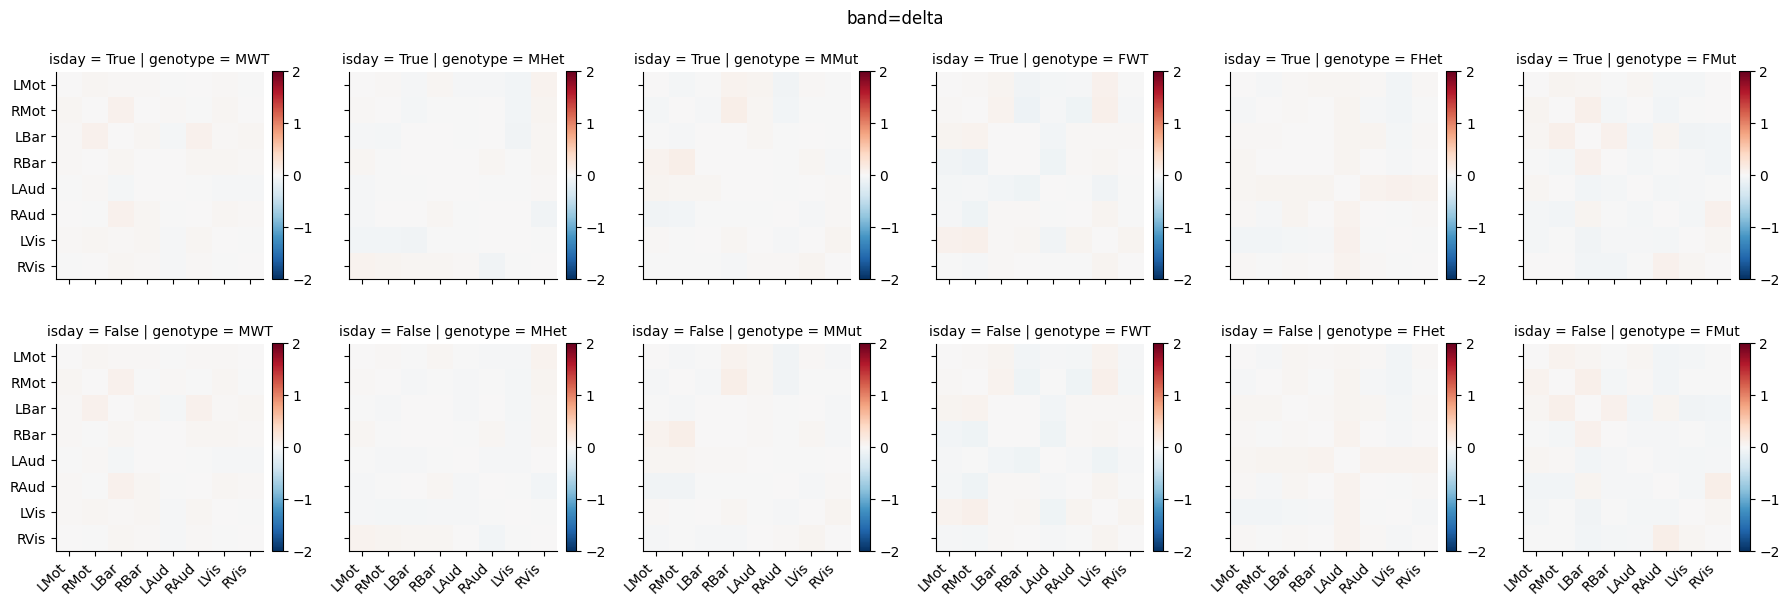

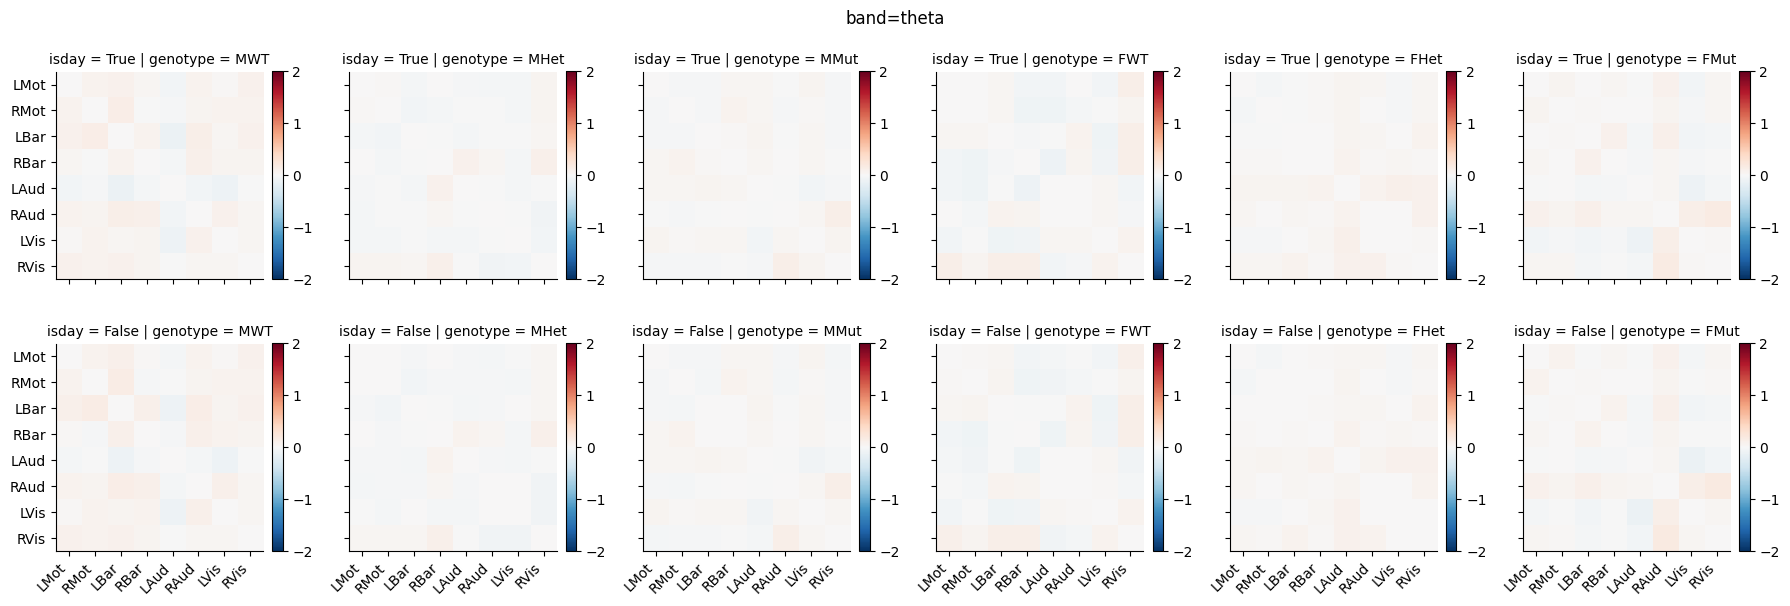

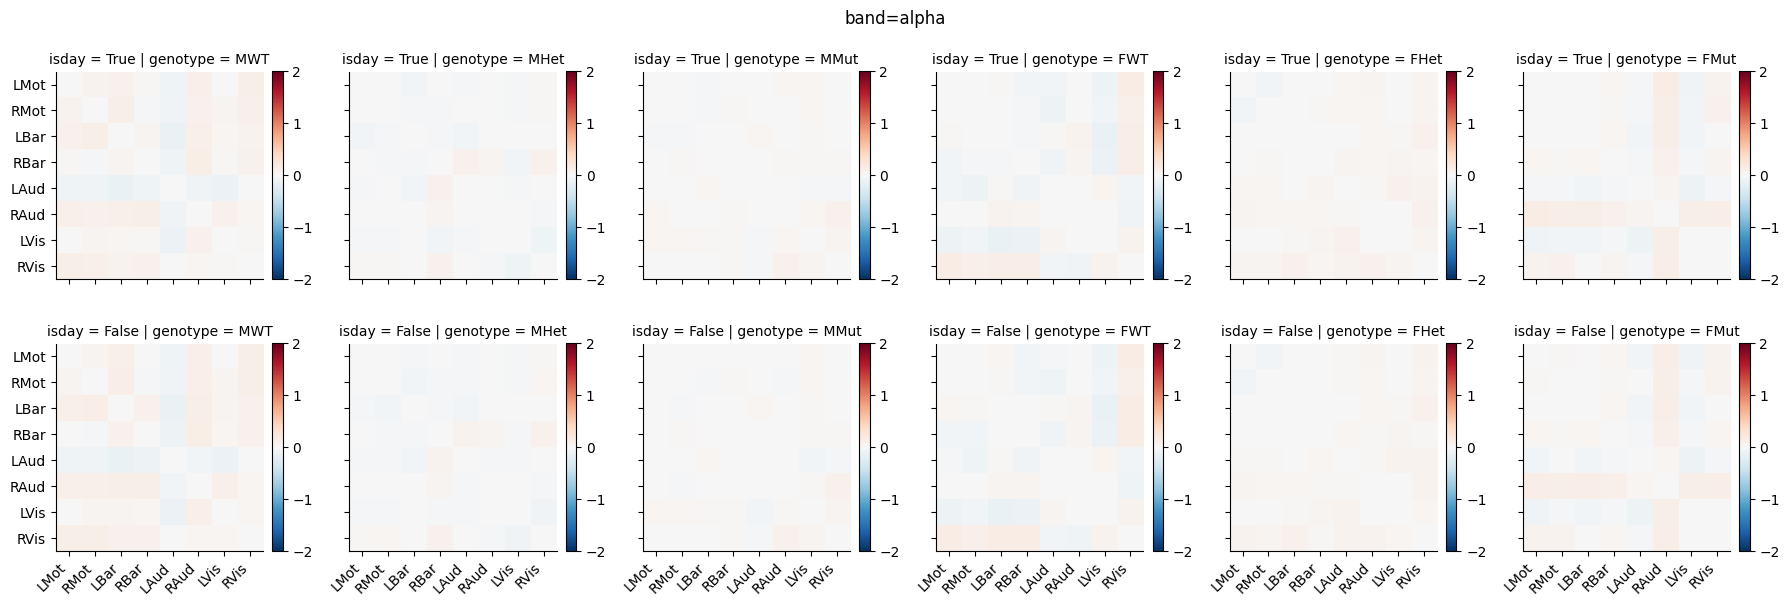

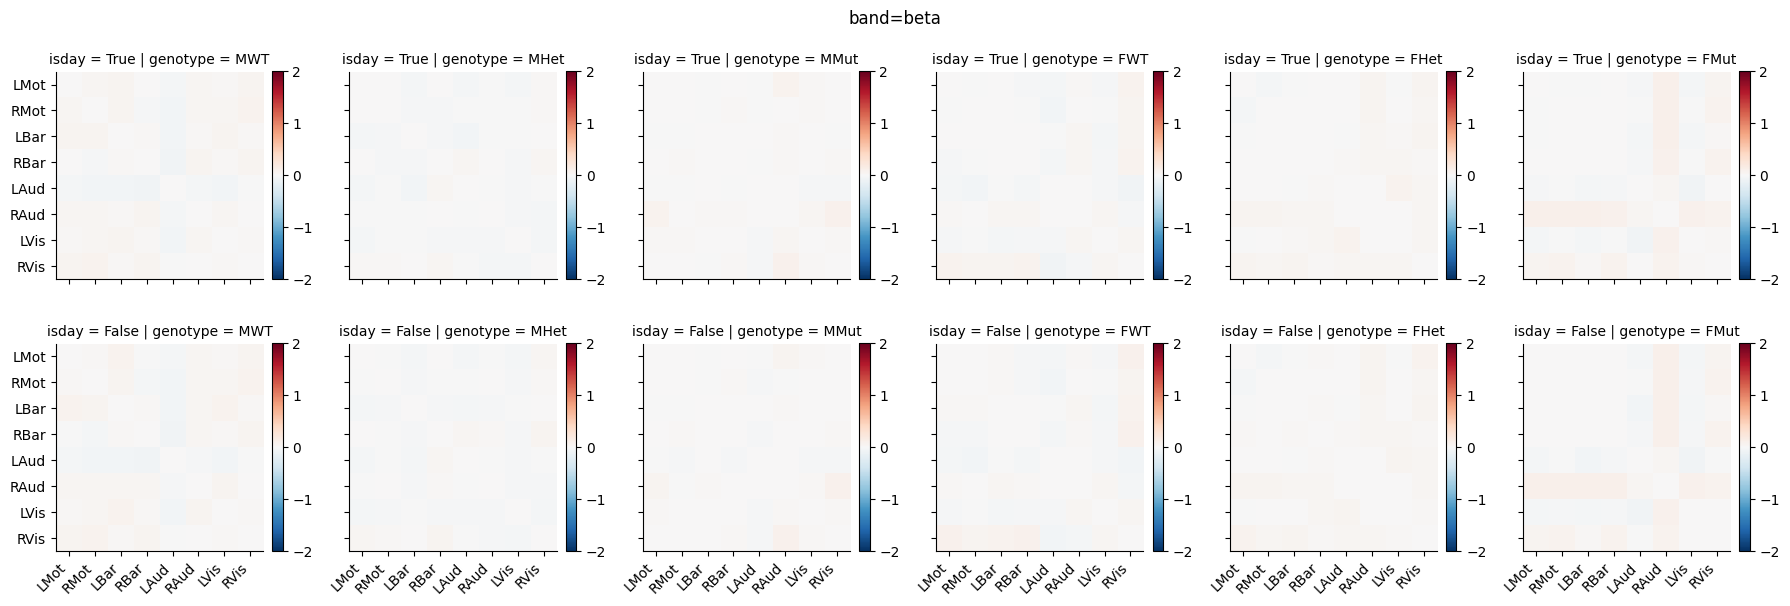

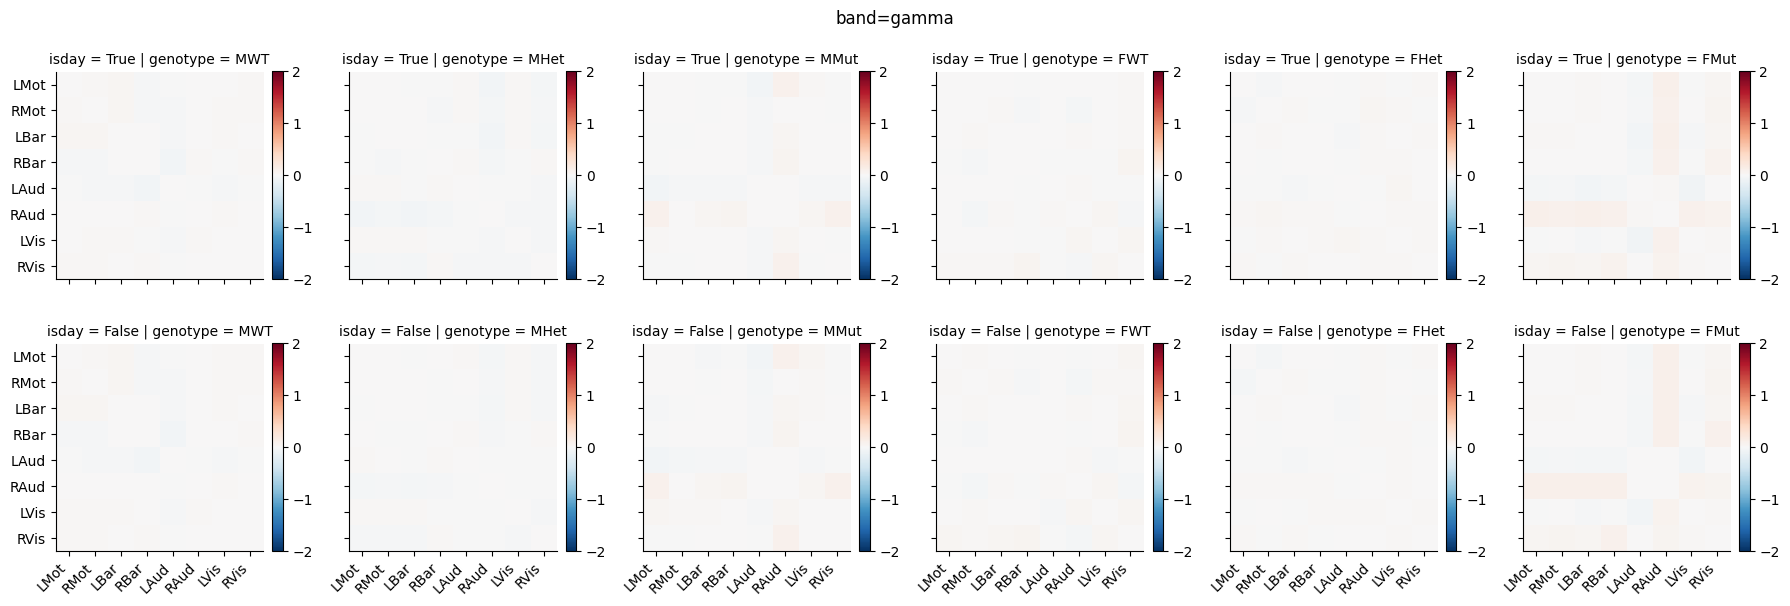

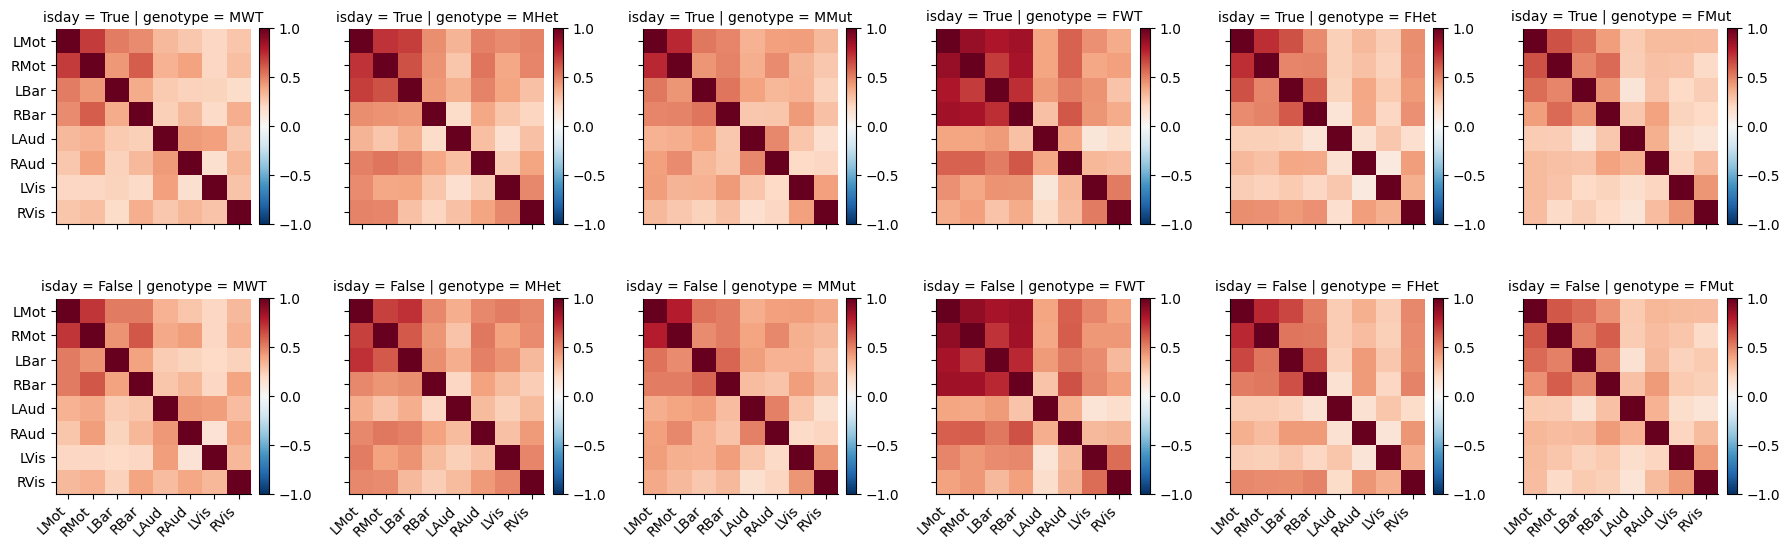

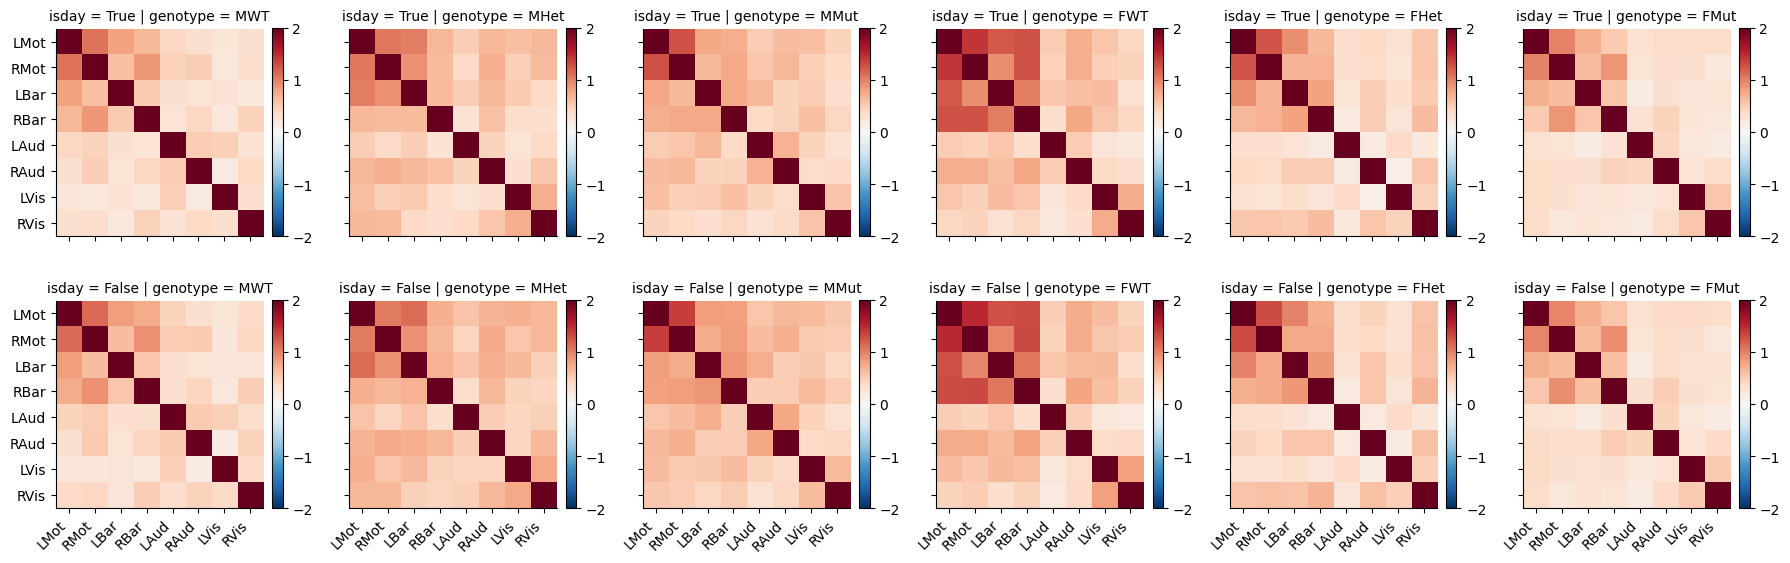

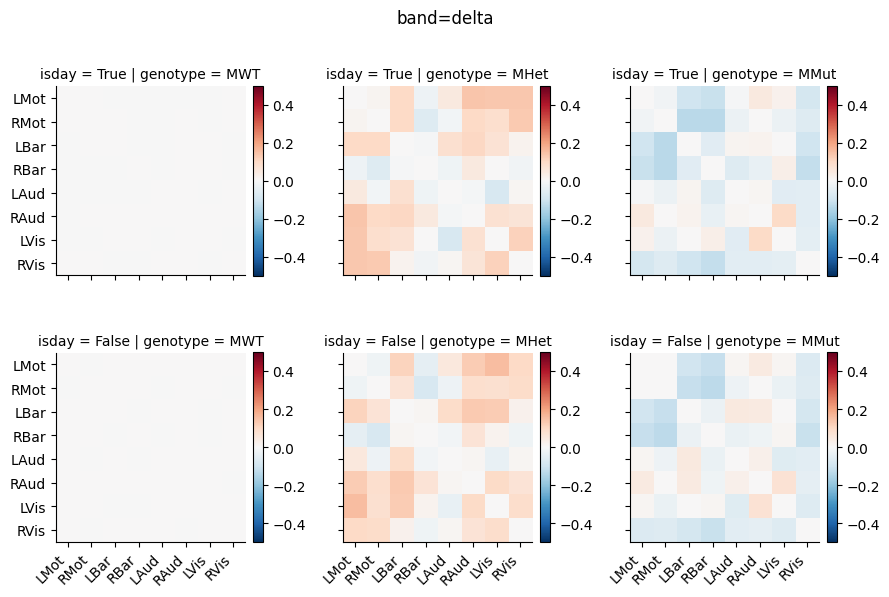

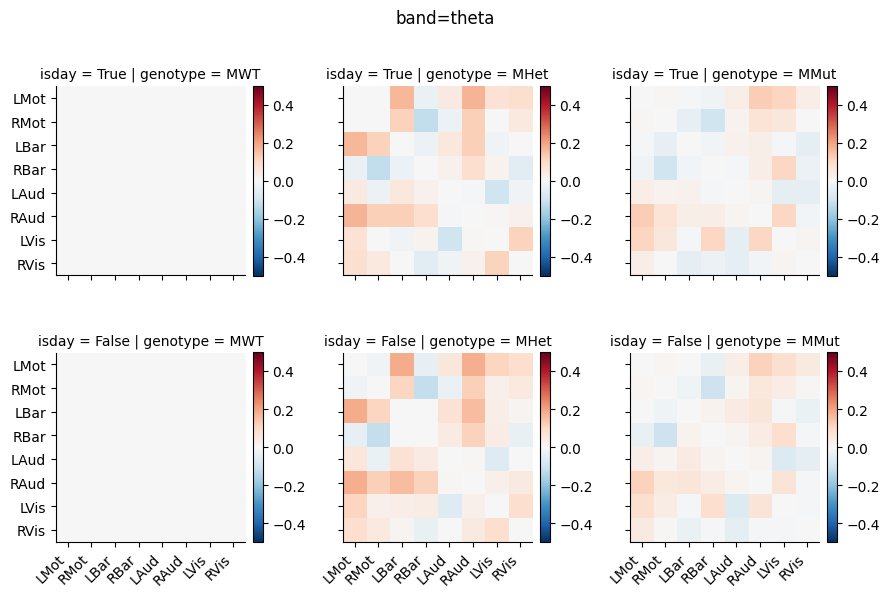

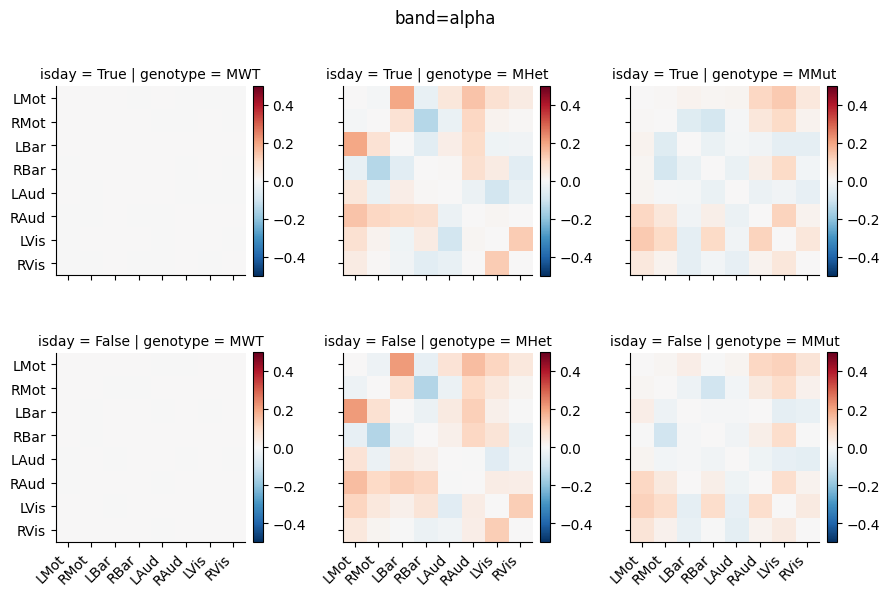

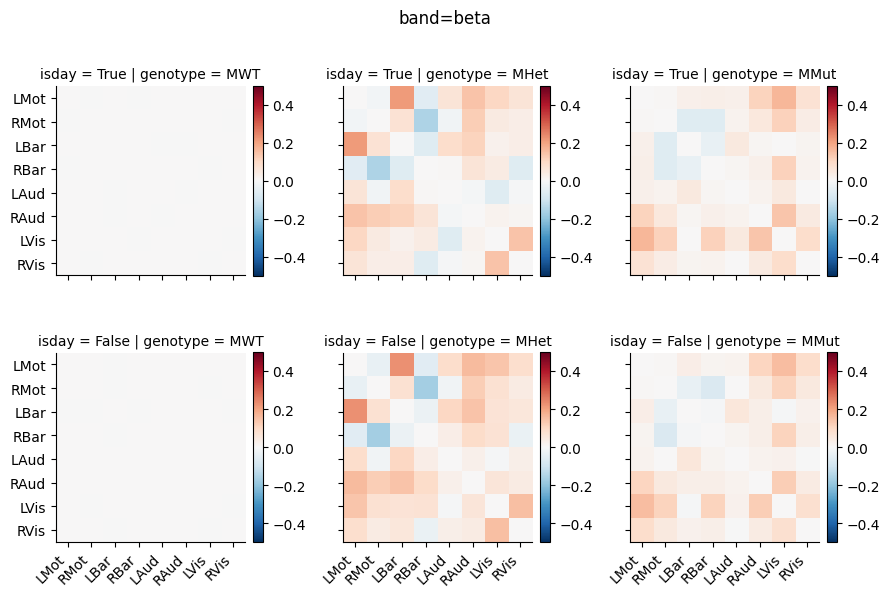

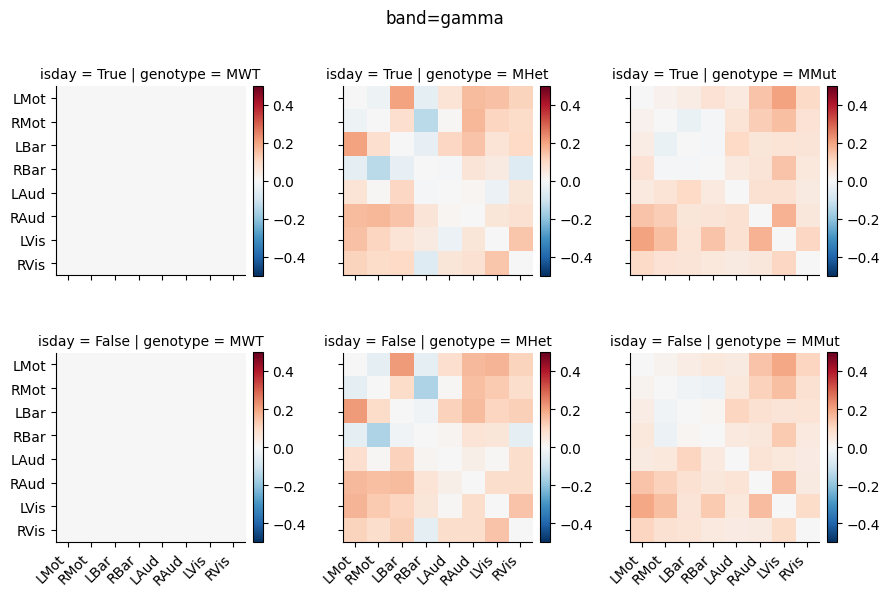

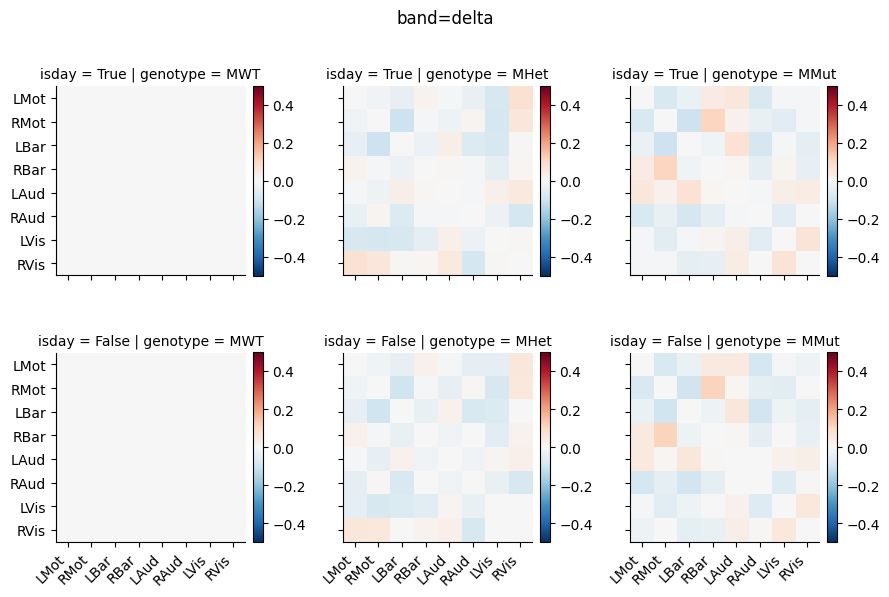

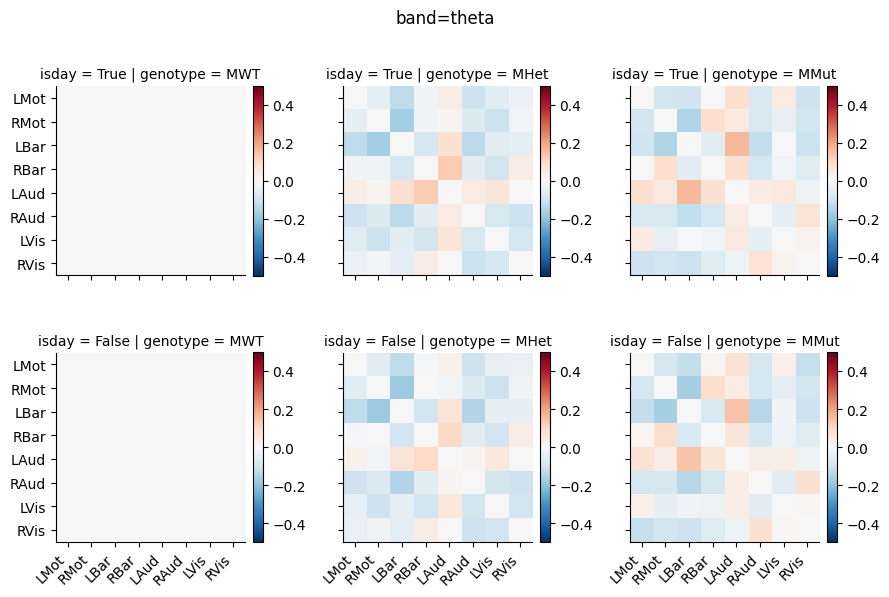

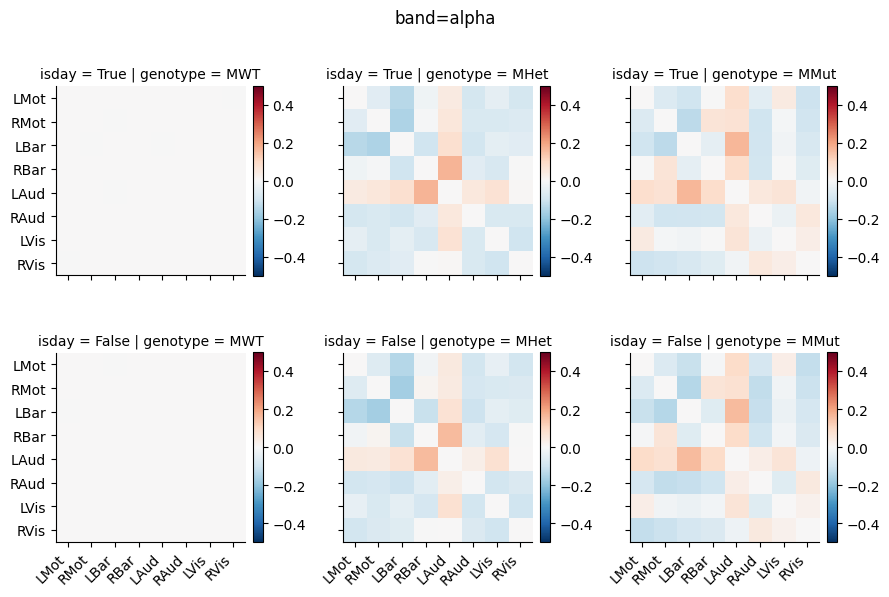

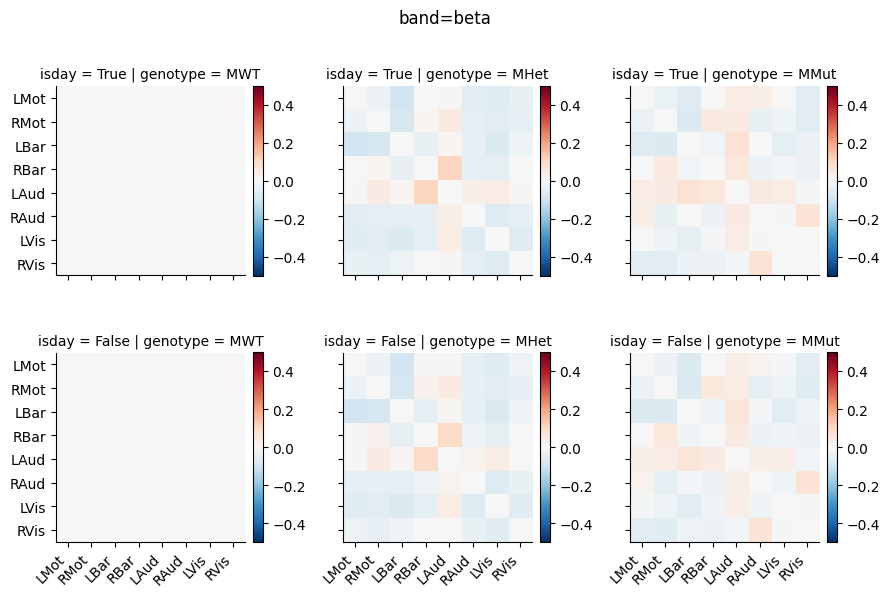

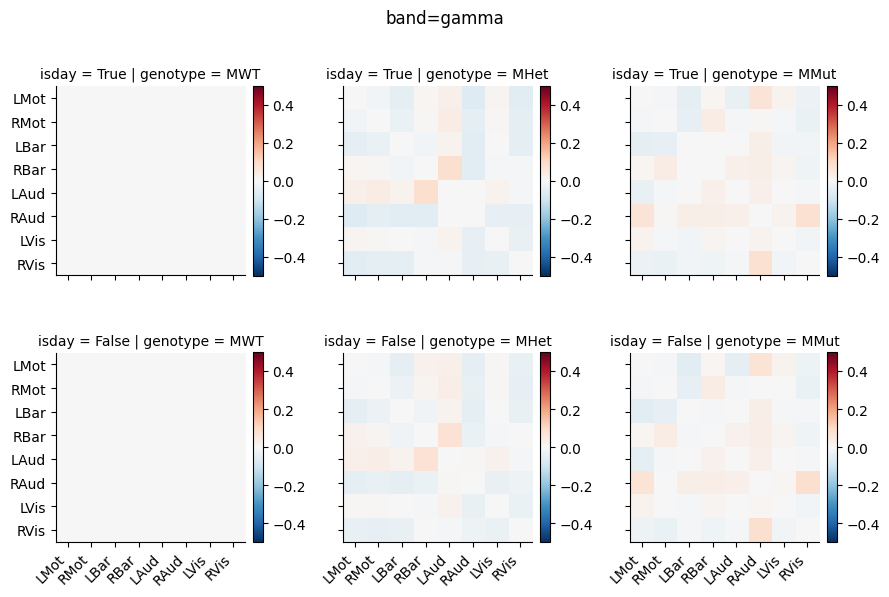

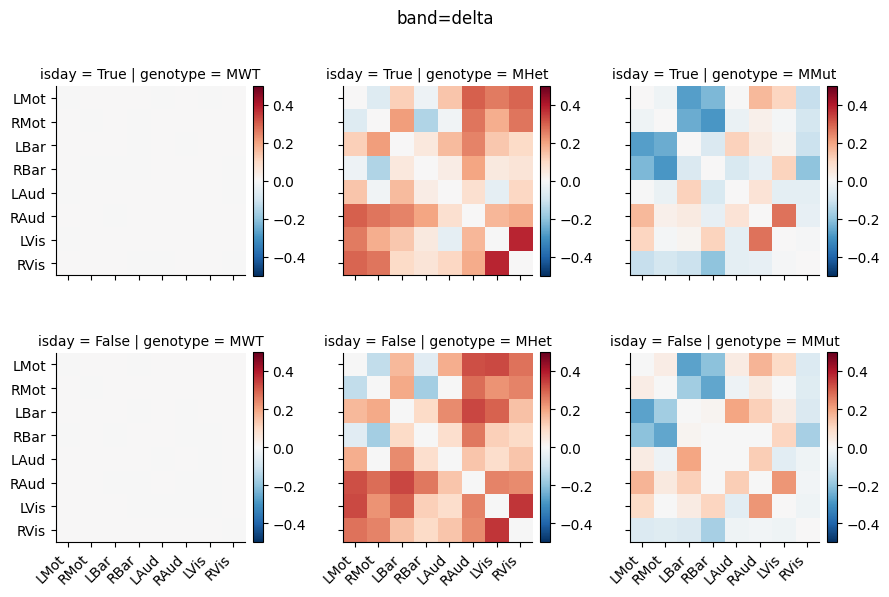

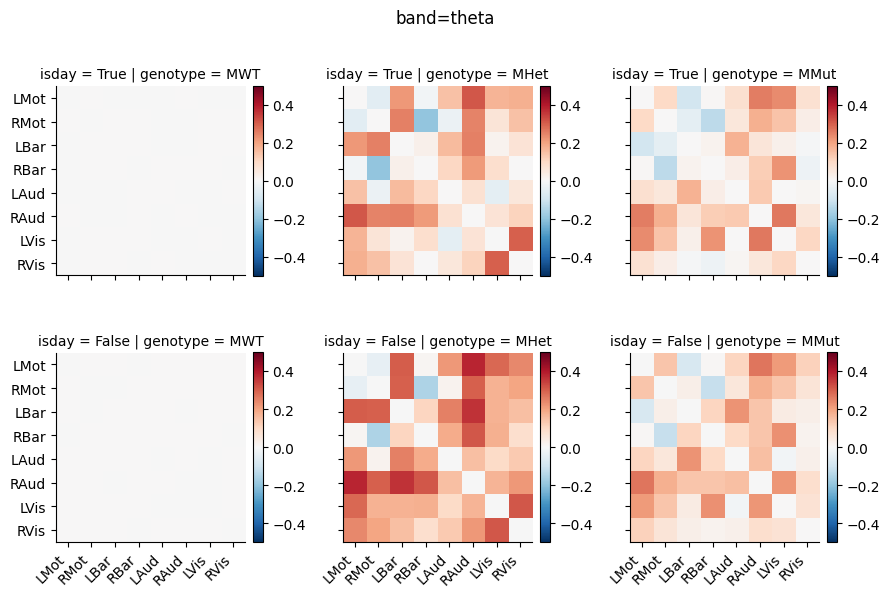

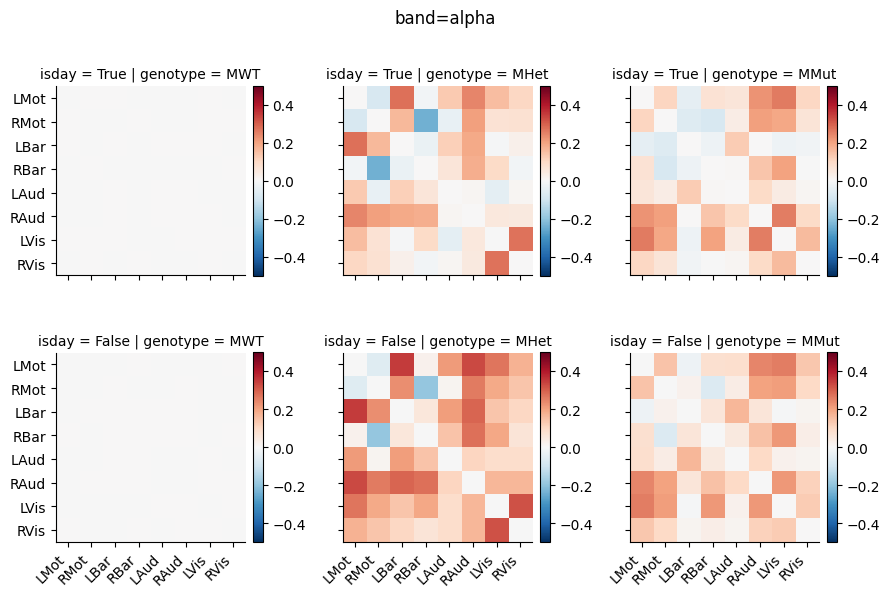

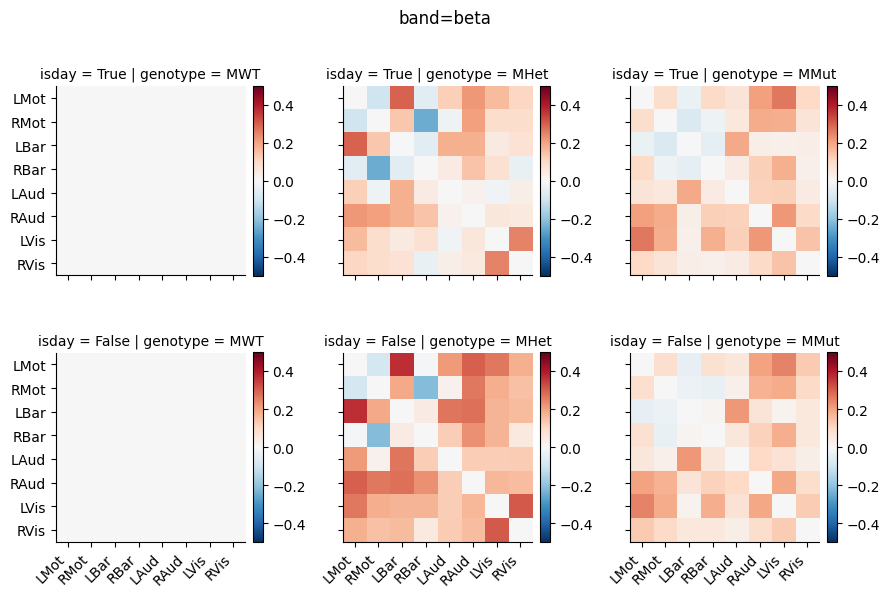

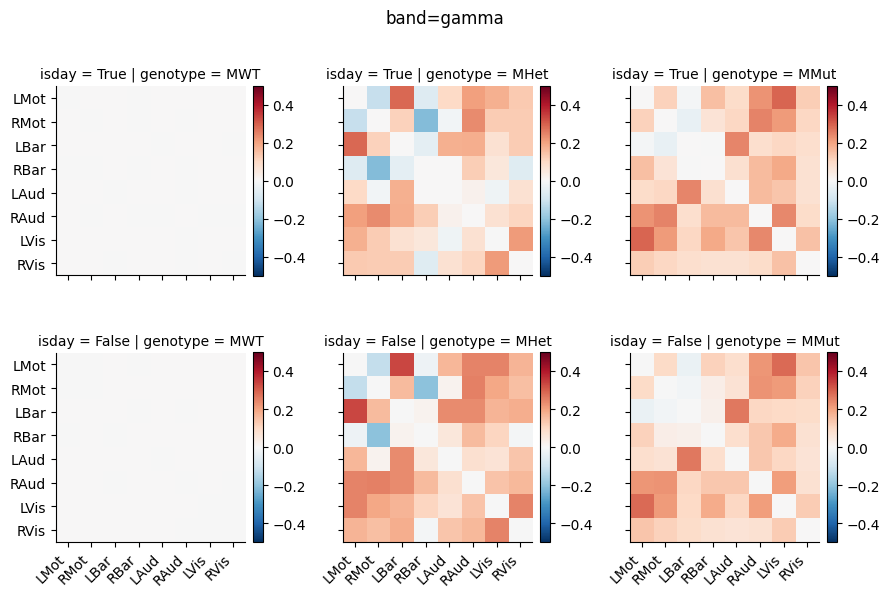

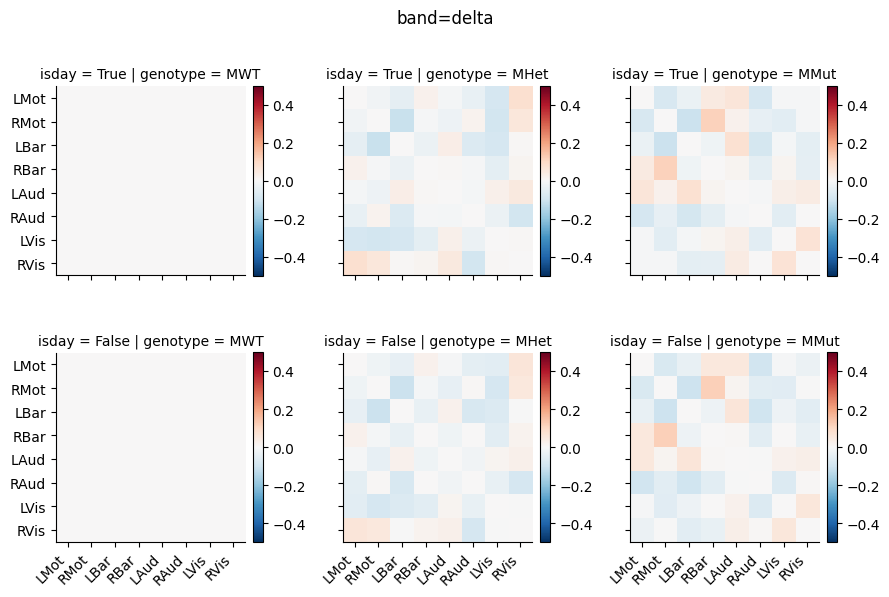

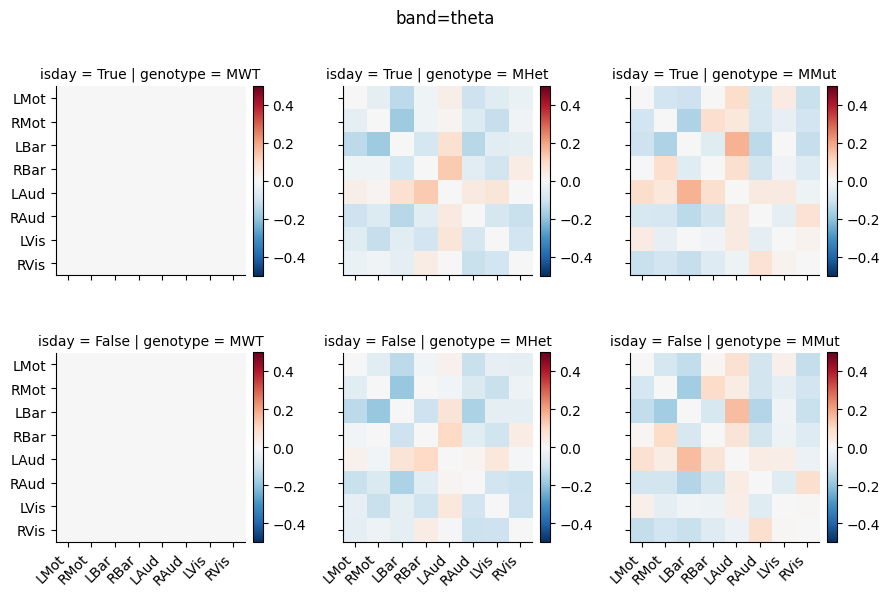

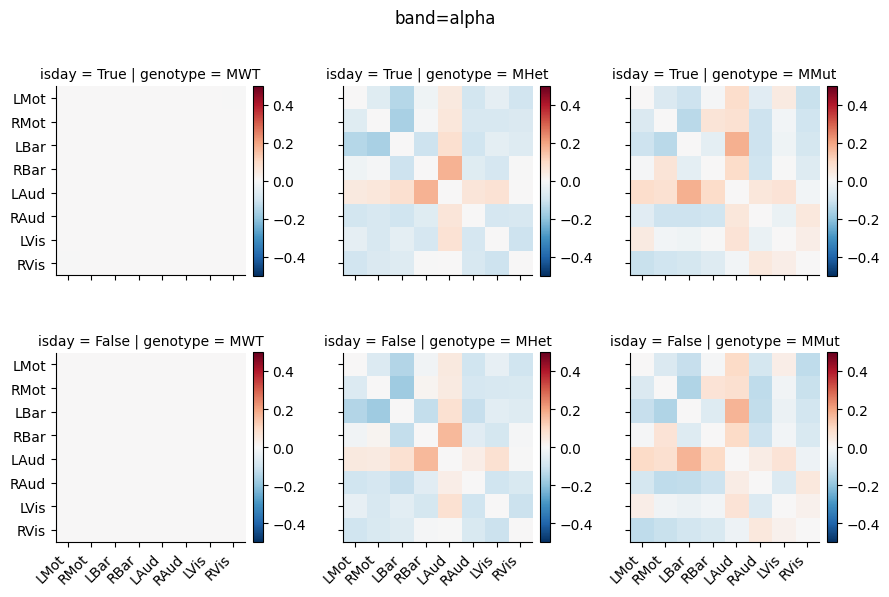

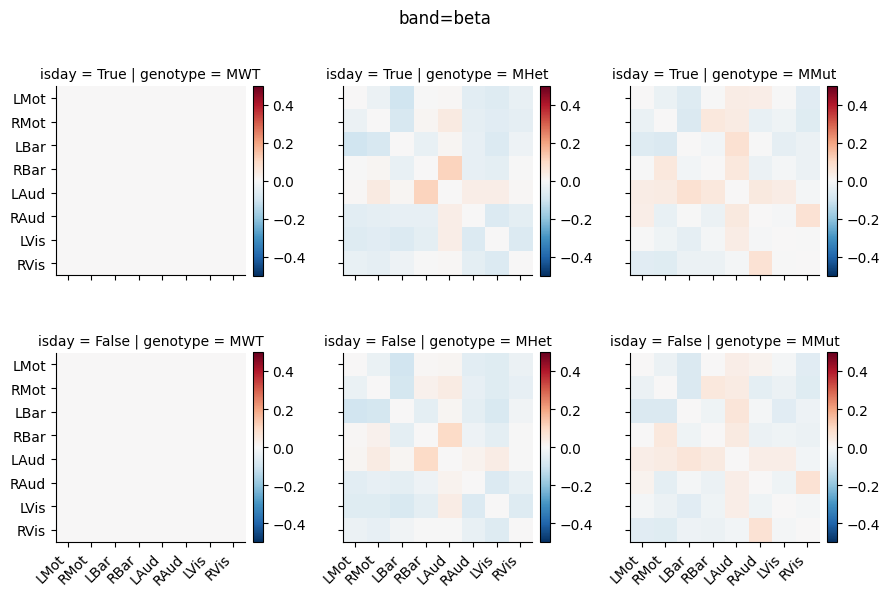

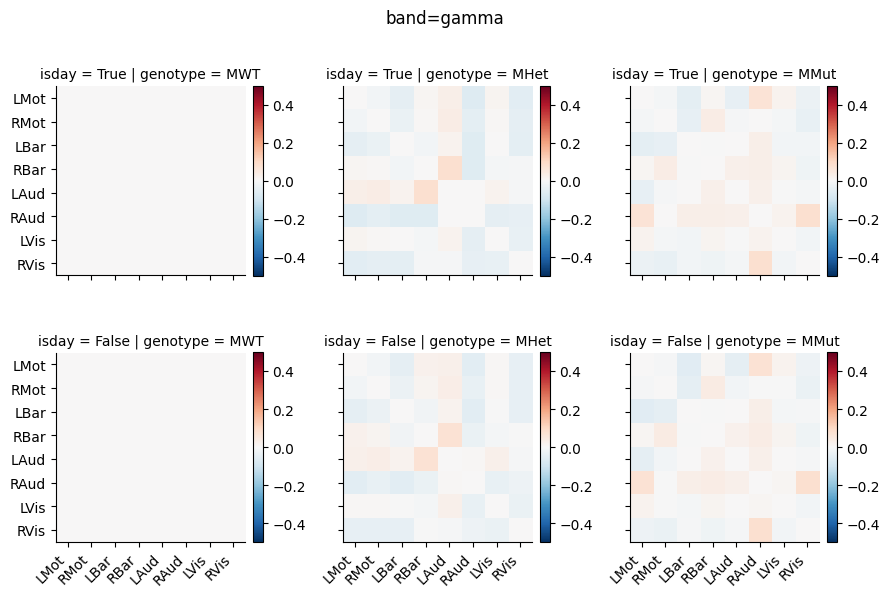

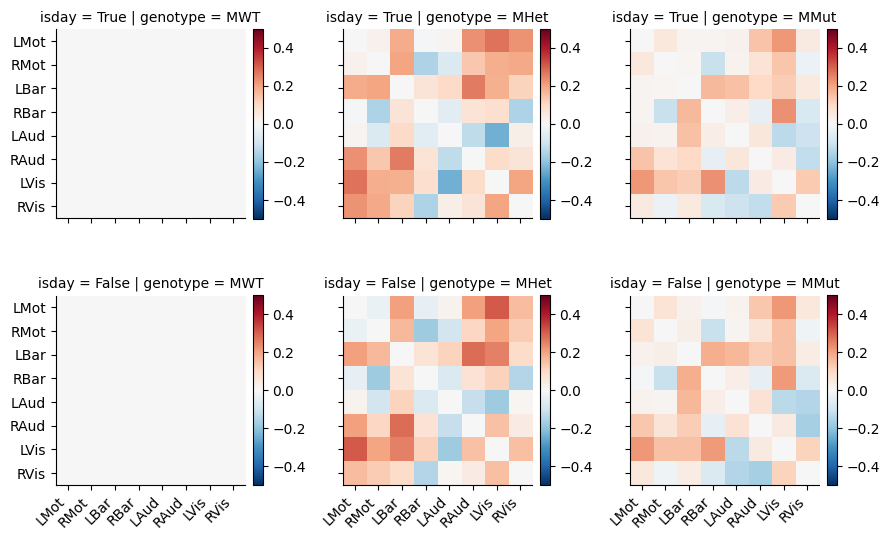

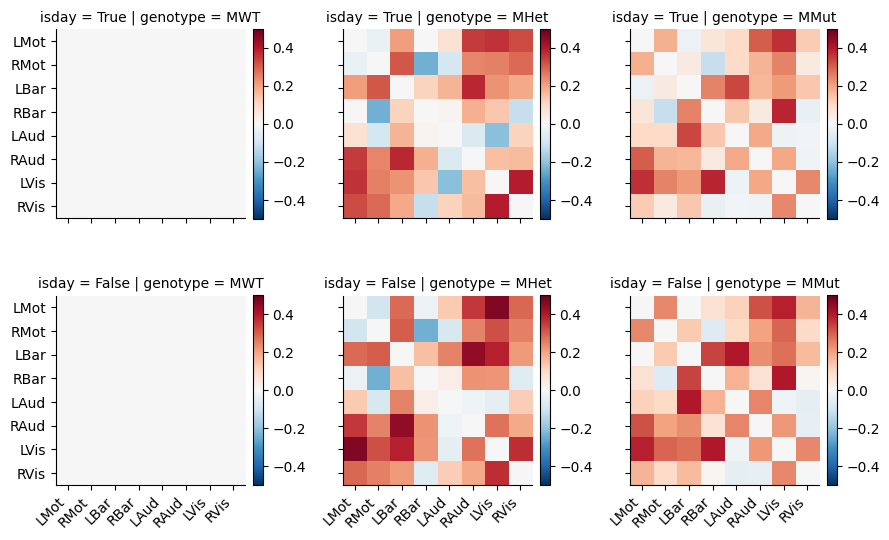

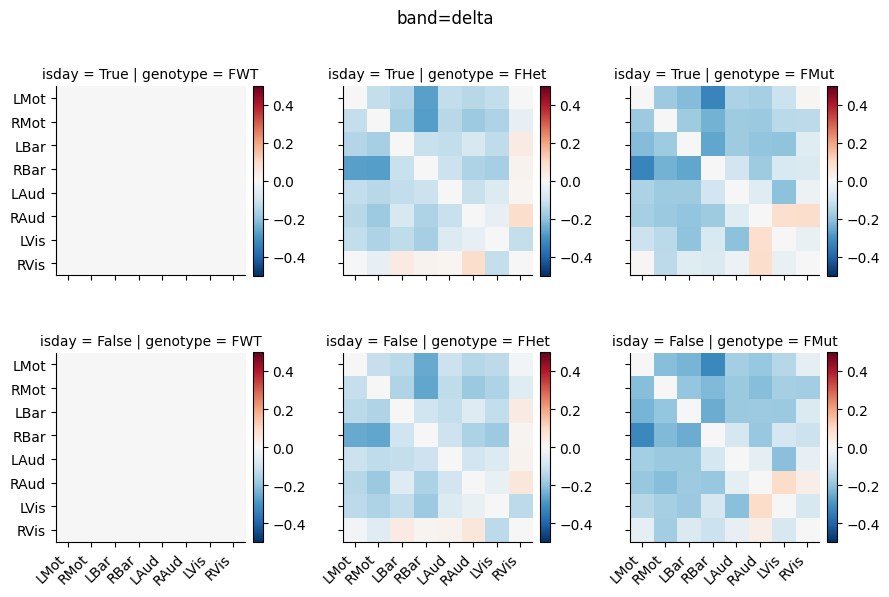

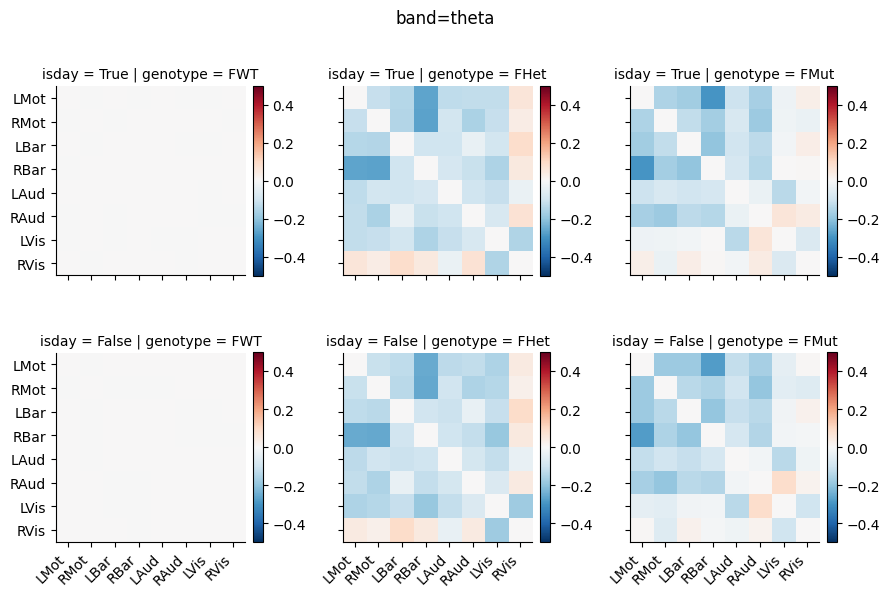

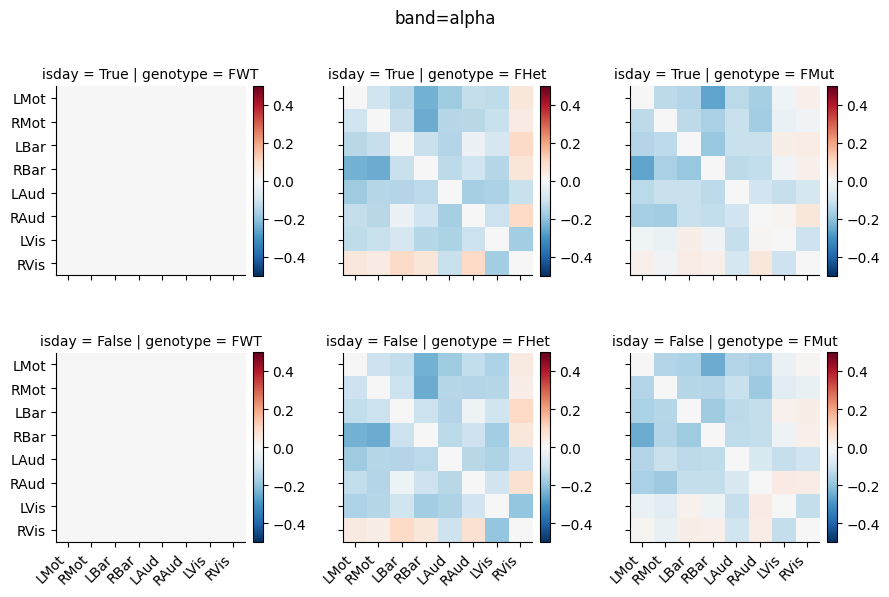

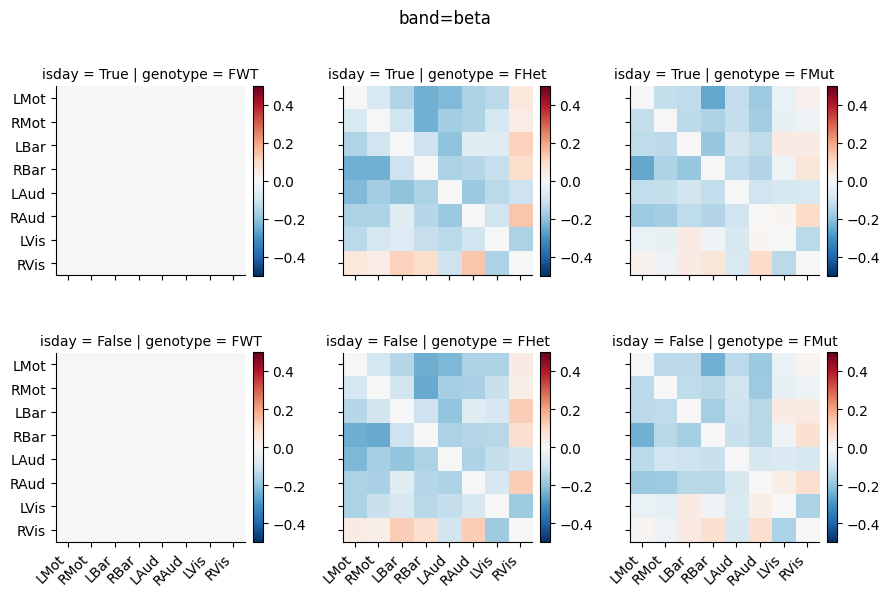

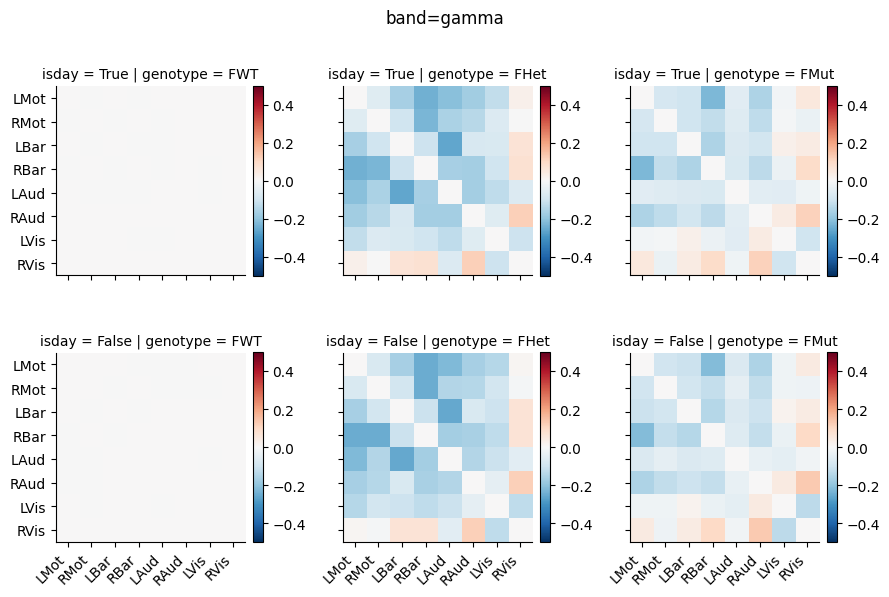

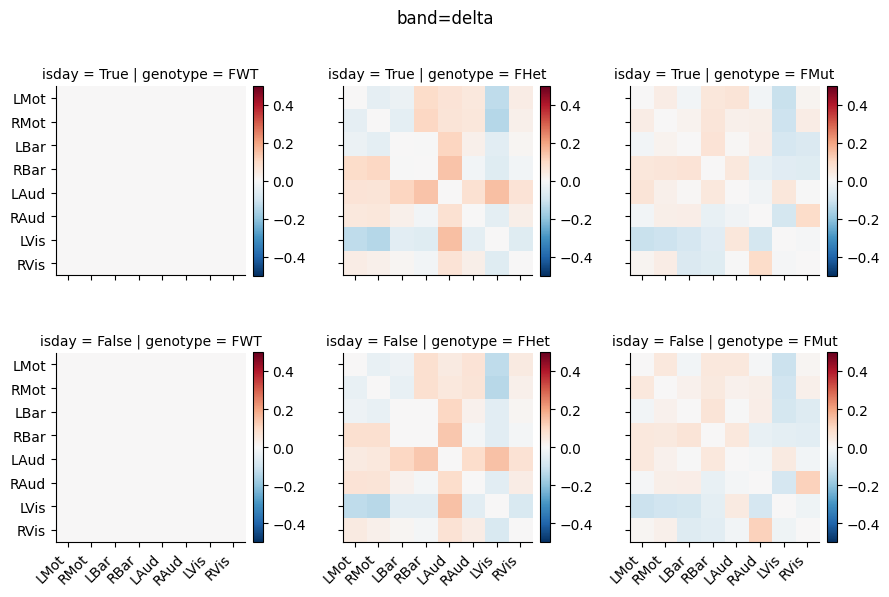

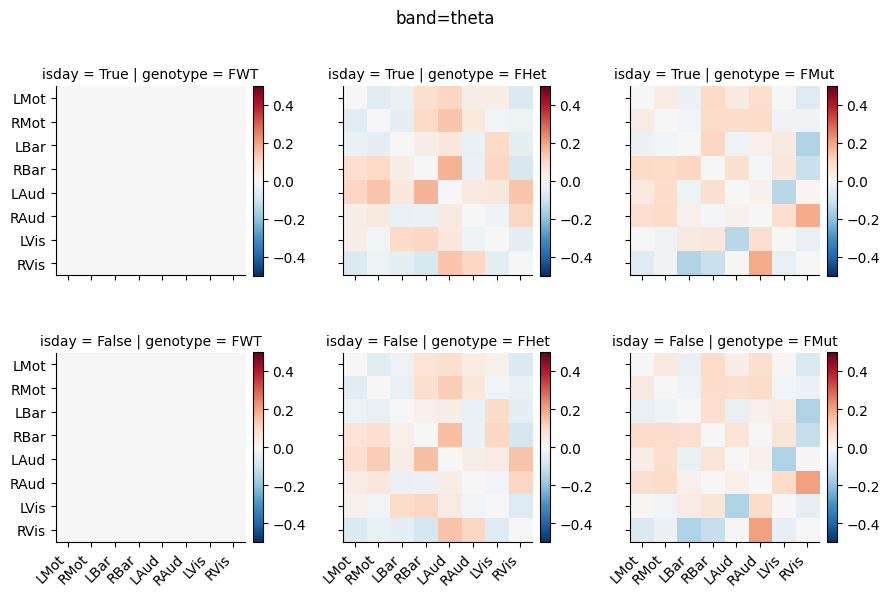

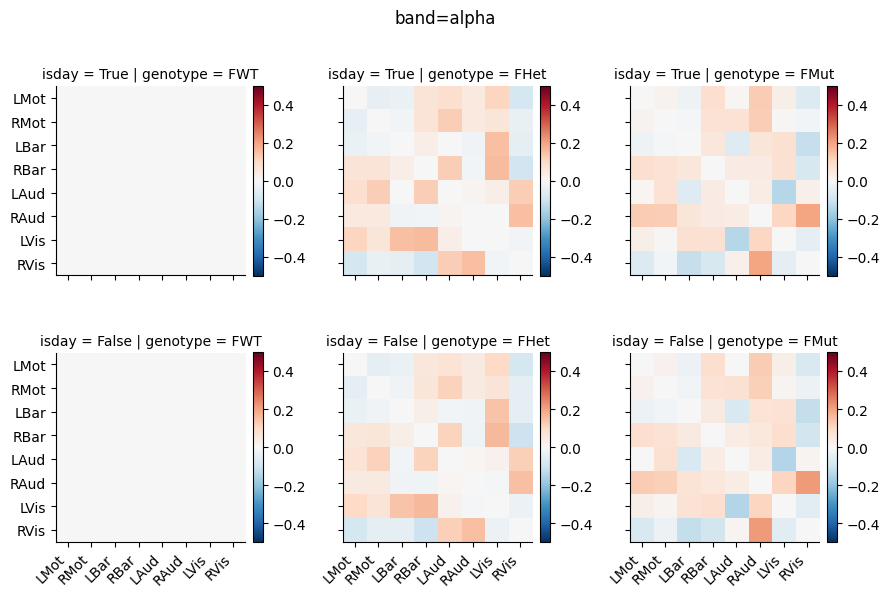

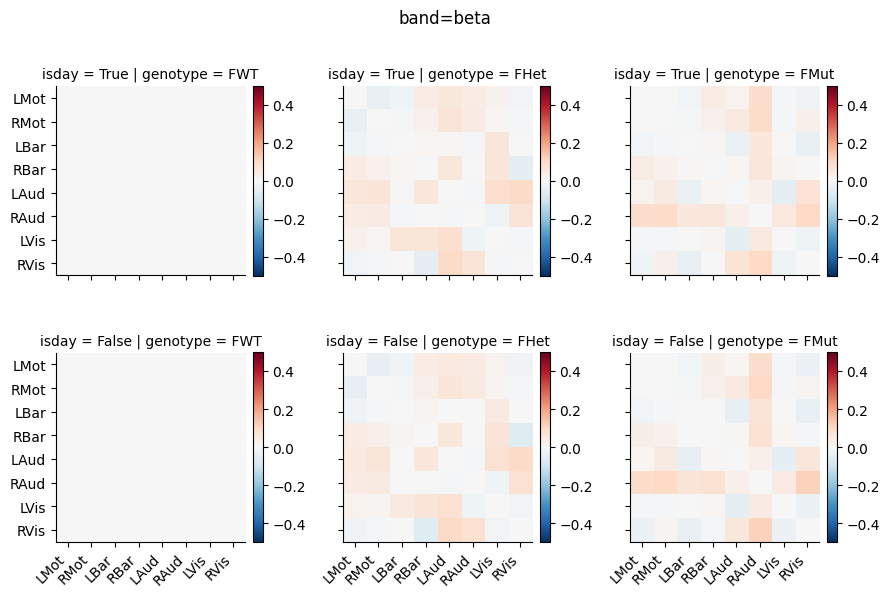

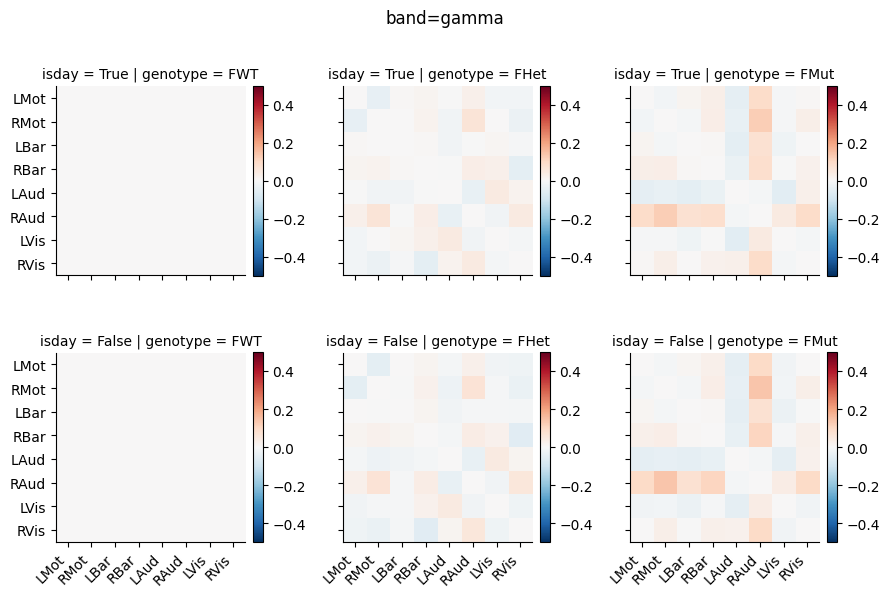

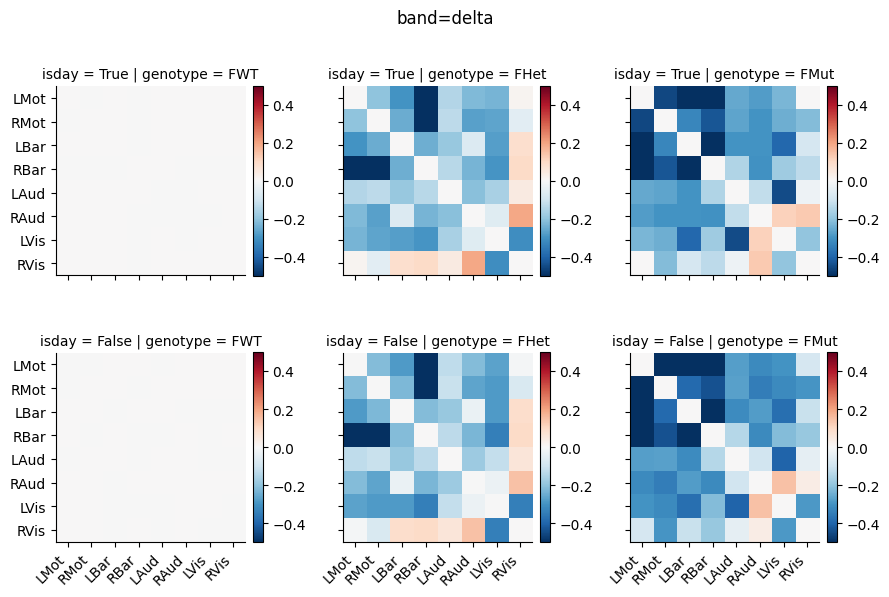

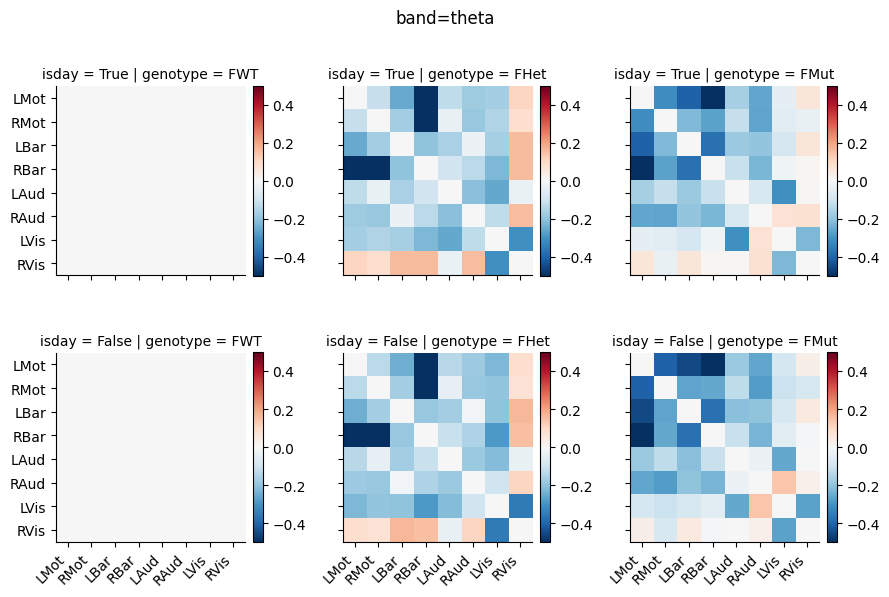

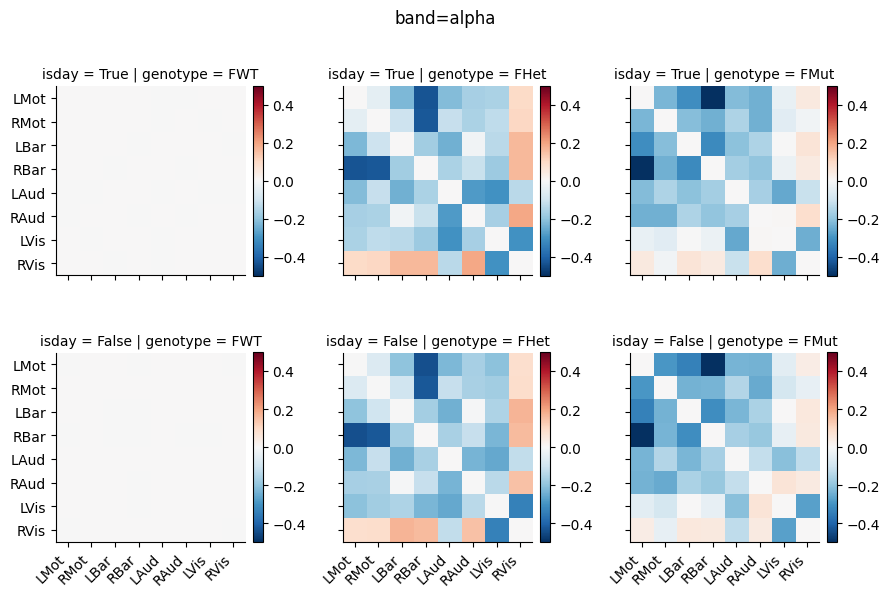

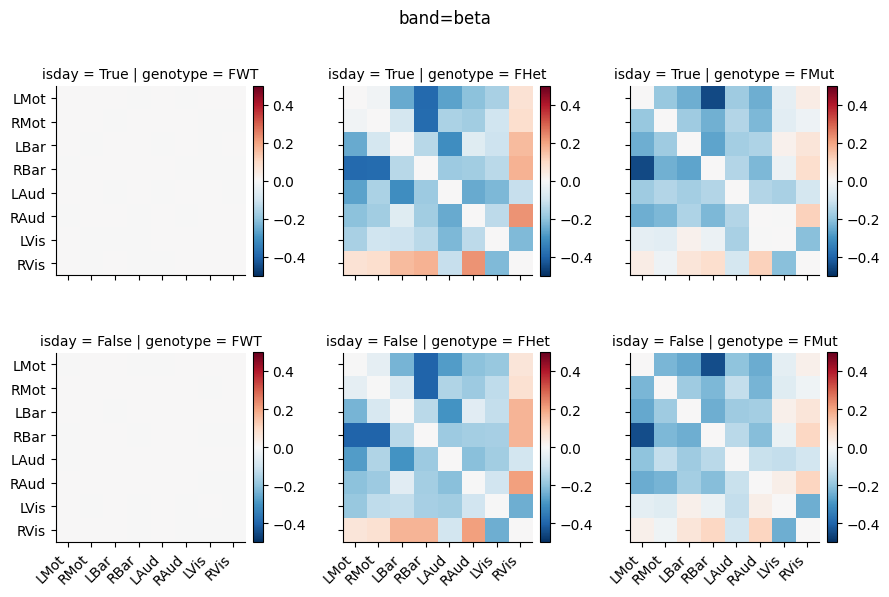

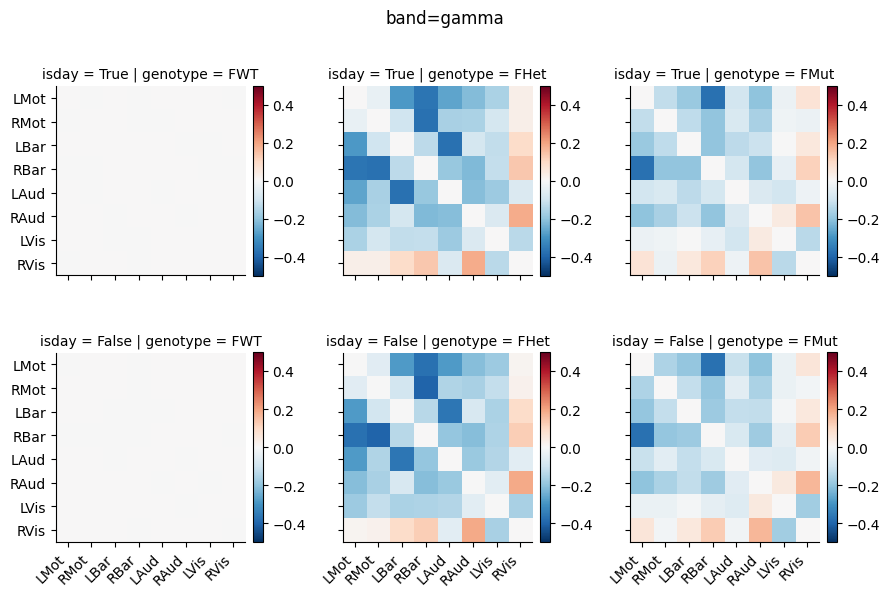

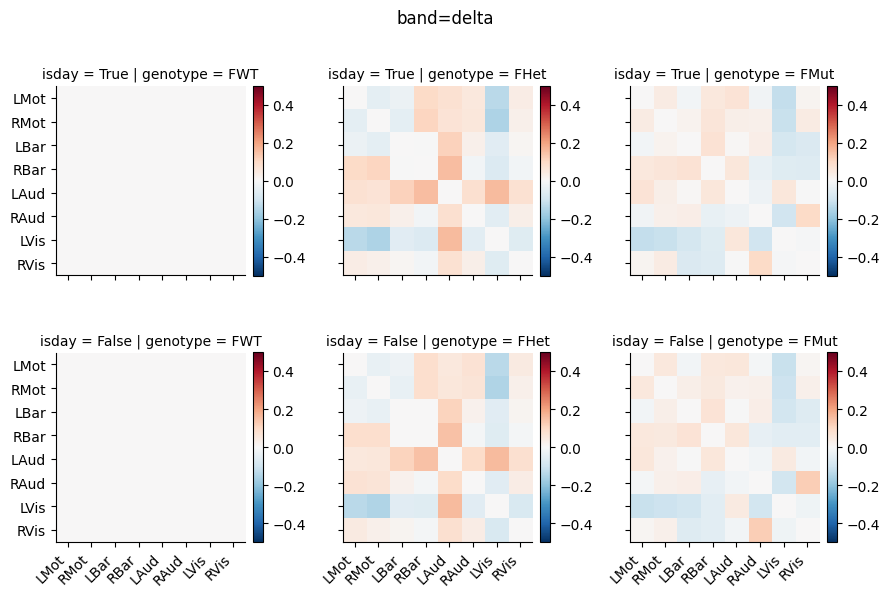

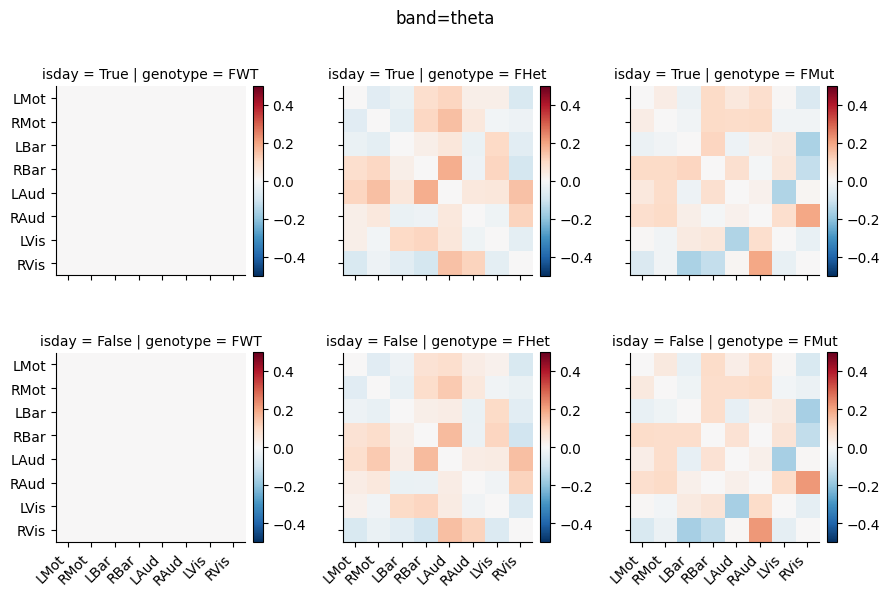

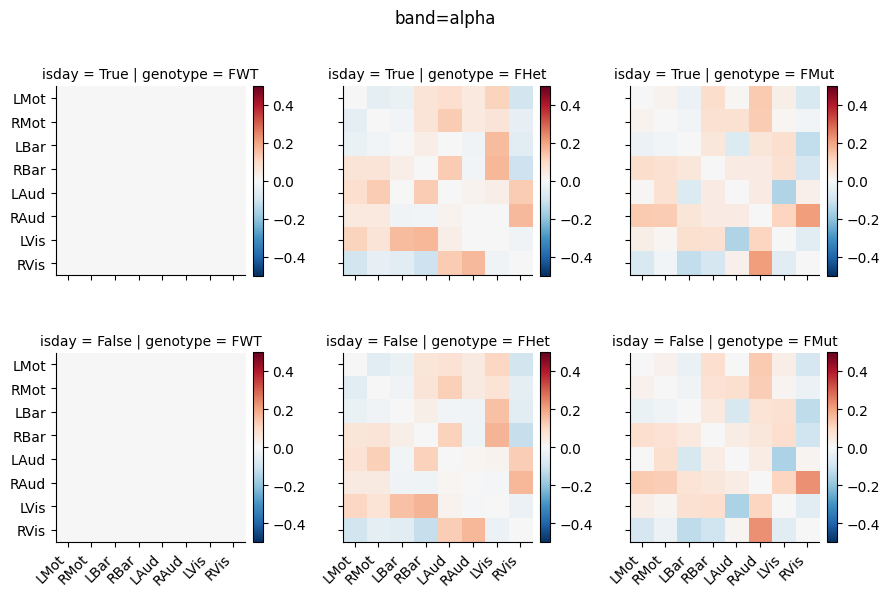

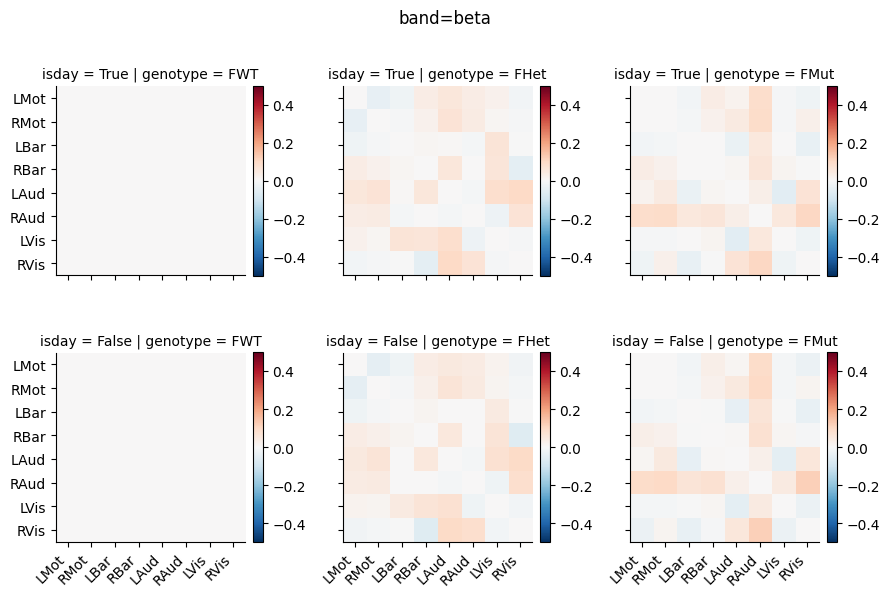

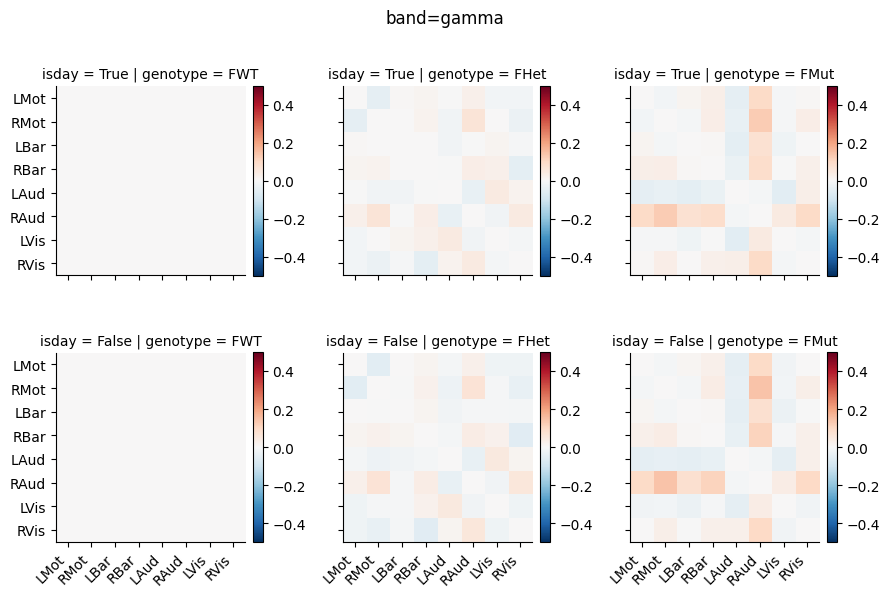

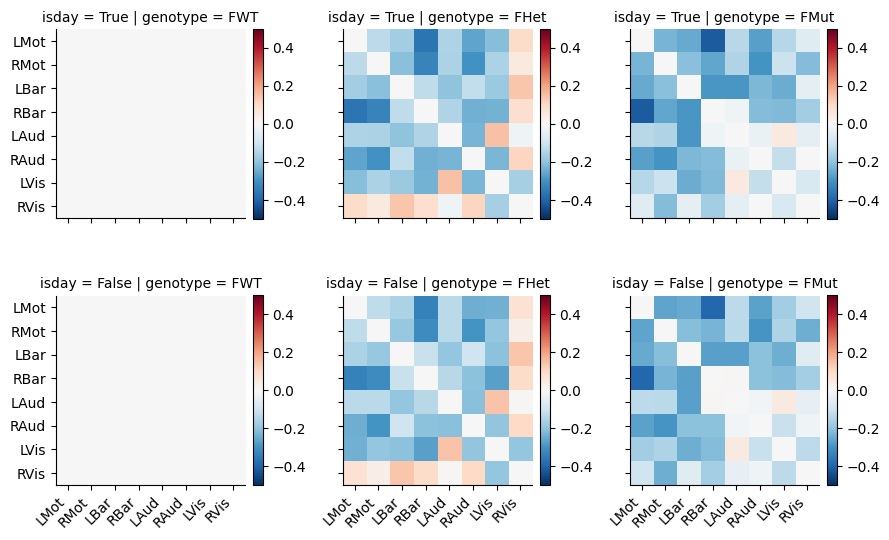

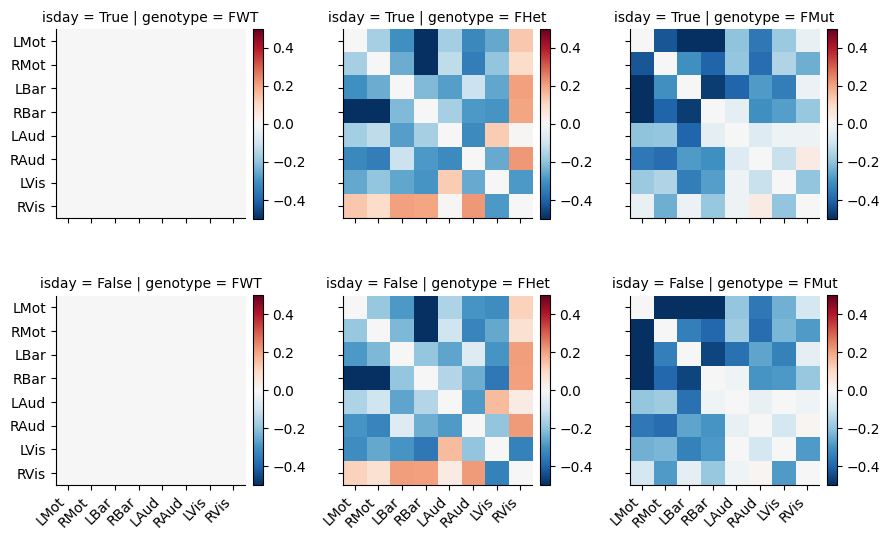

In [65]:
logger.setLevel(logging.INFO)
# df = ep.pull_timeseries_dataframe('cohere', ['genotype', 'isday'])
# df = ep.pull_timeseries_dataframe('pcorr', ['genotype'], average_groupby=False)
# df = ep.pull_timeseries_dataframe('pcorr', ['genotype', 'isday'])

ep = visualization.ExperimentPlotter(
    wars=wars,
    plot_order=plot_order,
)

for feature in ['cohere', 'imcoh', 'zcohere', 'zimcoh']:
    if feature[0] == 'z':
        gs = ep.plot_heatmap_faceted(feature, groupby=['genotype', 'isday'], facet_vars='band', norm=colors.CenteredNorm(vcenter=0, halfrange=2))
    else:
        gs = ep.plot_heatmap_faceted(feature, groupby=['genotype', 'isday'], facet_vars='band')

    for i, g in enumerate(gs):
        g.savefig(save_folder / f"matrix-{feature}-{i}.tif", bbox_inches="tight", dpi=300)

    df = ep.pull_timeseries_dataframe(feature, ['genotype', 'isday'], average_groupby=True)
    df.to_csv(save_folder / f"{feature}.csv")

for feature in ['pcorr', 'zpcorr']:
    if feature[0] == 'z':
        g = ep.plot_heatmap(feature, groupby=['genotype', 'isday'], norm=colors.CenteredNorm(vcenter=0, halfrange=2))
    else:
        g = ep.plot_heatmap(feature, groupby=['genotype', 'isday'])
        
    g.savefig(save_folder / f"matrix-{feature}.tif", bbox_inches="tight", dpi=300)
    df = ep.pull_timeseries_dataframe(feature, ['genotype', 'isday'], average_groupby=True)
    df.to_csv(save_folder / f"{feature}.csv")


for sex in ["M", "F"]:
    ep = visualization.ExperimentPlotter(
        wars=[x for x in wars if x.genotype.startswith(sex)],
        plot_order=plot_order,
    )

    for feature in ["cohere", "imcoh", "zcohere", "zimcoh"]:
        g = ep.plot_diffheatmap_faceted(
            feature,
            groupby=["genotype", "isday"],
            baseline_key=f"{sex}WT",
            baseline_groupby="genotype",
            facet_vars='band',
            norm=colors.CenteredNorm(vcenter=0, halfrange=0.5),
        )
        for i, figure in enumerate(g):
            figure.savefig(save_folder / f"diffmatrix-{feature}-{i}.tif", bbox_inches="tight", dpi=300)

    for feature in ['pcorr', 'zpcorr']:
        g = ep.plot_diffheatmap(
            feature,
            groupby=["genotype", "isday"],
            baseline_key=f"{sex}WT",
            baseline_groupby="genotype",
            norm=colors.CenteredNorm(vcenter=0, halfrange=0.5),
        )
        g.savefig(save_folder / f"diffmatrix-{feature}.tif", bbox_inches="tight", dpi=300)


2025-08-26 22:48:34,952 - INFO - feature: rms, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False


2025-08-26 22:48:35,566 - INFO - feature: rms, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:35,807 - INFO - feature: rms, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:37,077 - INFO - feature: rms, groupby: ['genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:38,069 - INFO - feature: rms, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:39,361 - INFO - feature: rms, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:39,665 - INFO - feature: rms, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:42,803 - INFO - feature: rms, groupby: ['genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:43,679 - INFO - feature: ampvar, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:44,190 - INFO - feature: ampvar, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:44,475 - INFO - feature: ampvar, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:45,863 - INFO - feature: ampvar, groupby: ['genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:46,444 - INFO - feature: ampvar, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:48,624 - INFO - feature: ampvar, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:49,119 - INFO - feature: ampvar, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:52,960 - INFO - feature: ampvar, groupby: ['genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:53,946 - INFO - feature: psdtotal, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:55,263 - INFO - feature: psdtotal, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:55,696 - INFO - feature: psdtotal, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-08-26 22:48:58,033 - INFO - feature: psdtotal, groupby: ['genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:48:58,678 - INFO - feature: psdtotal, groupby: genotype, channels: all, collapse_channels: False, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


2025-08-26 22:49:00,041 - INFO - feature: psdtotal, groupby: genotype, channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-08-26 22:49:00,667 - INFO - feature: psdtotal, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


KeyboardInterrupt: 

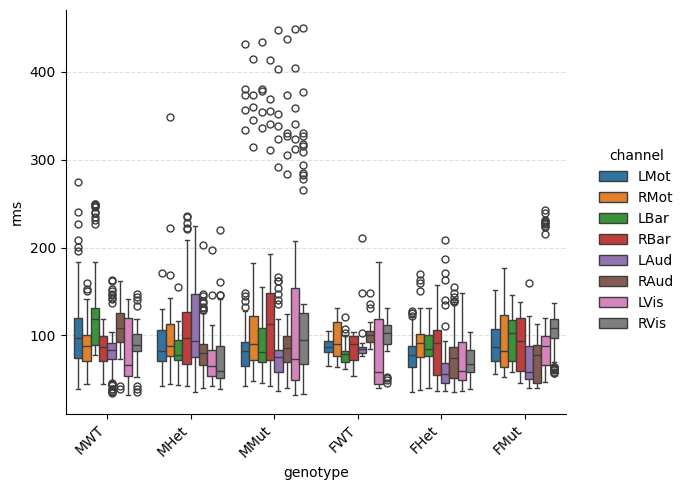

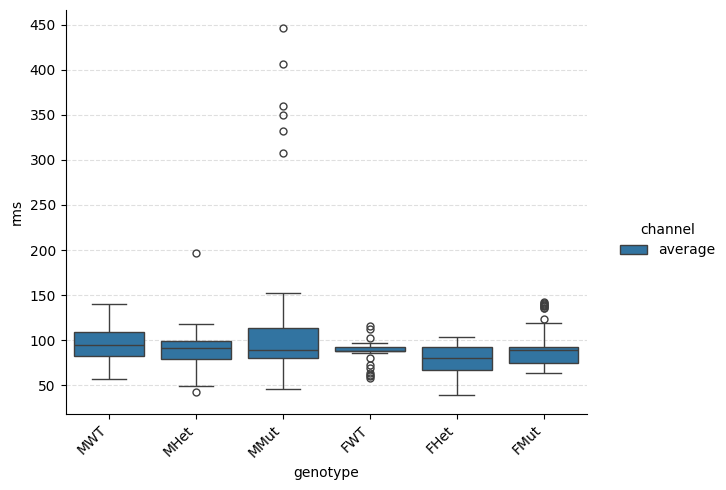

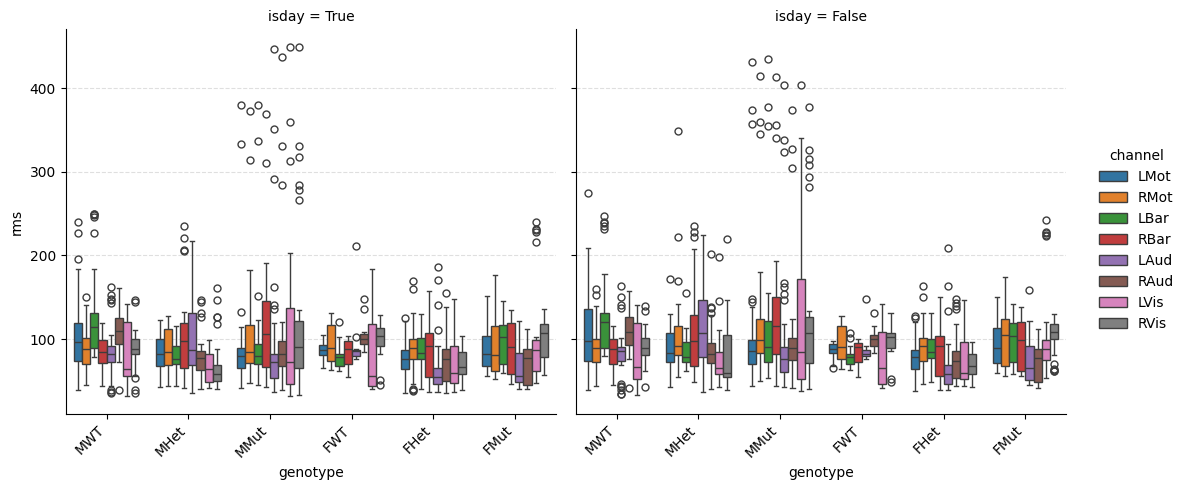

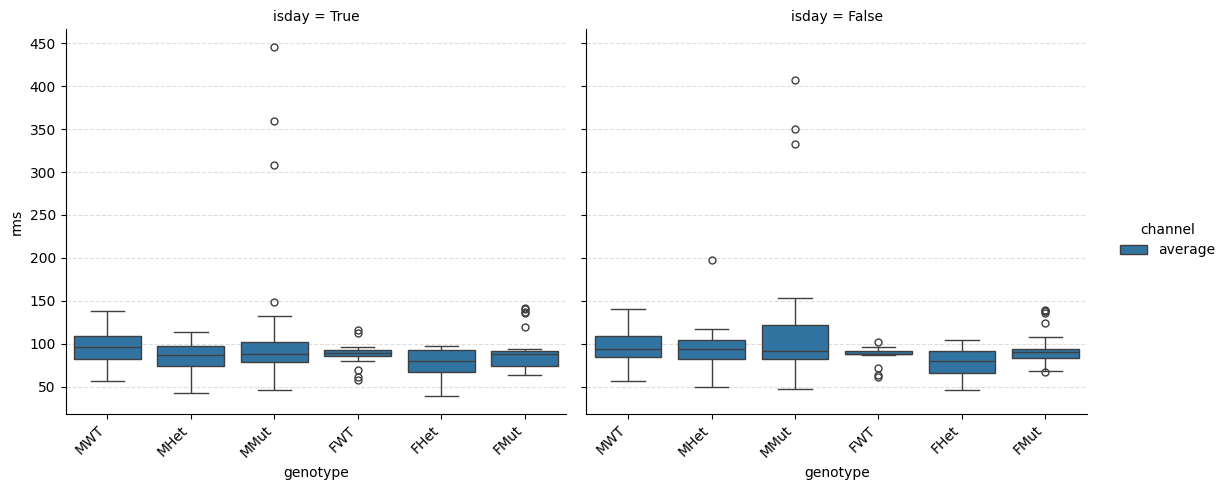

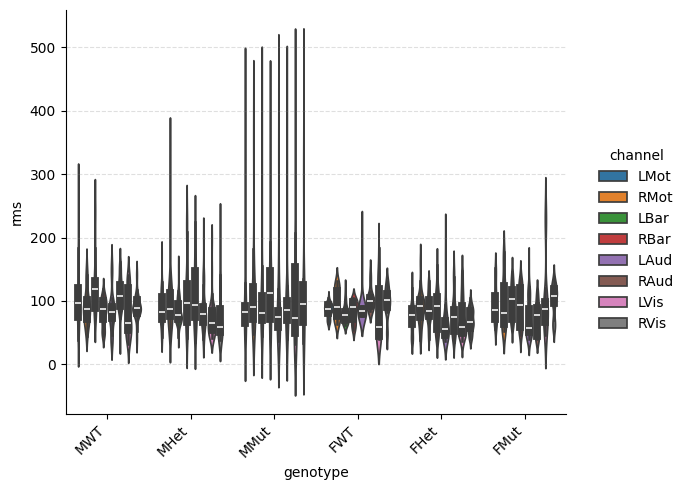

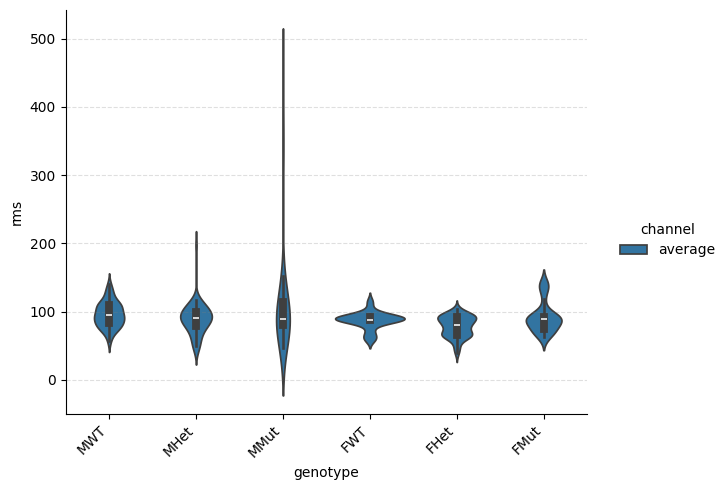

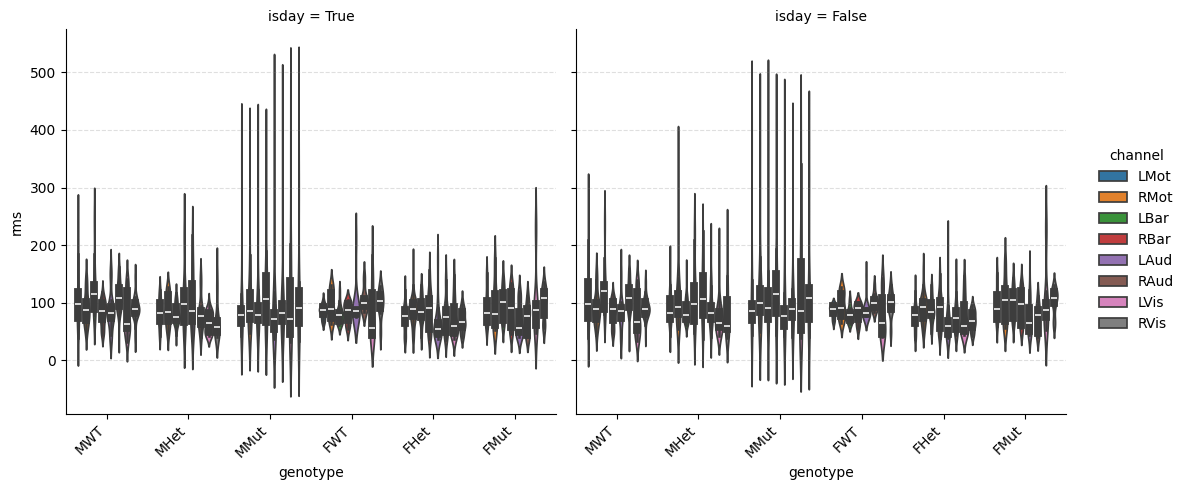

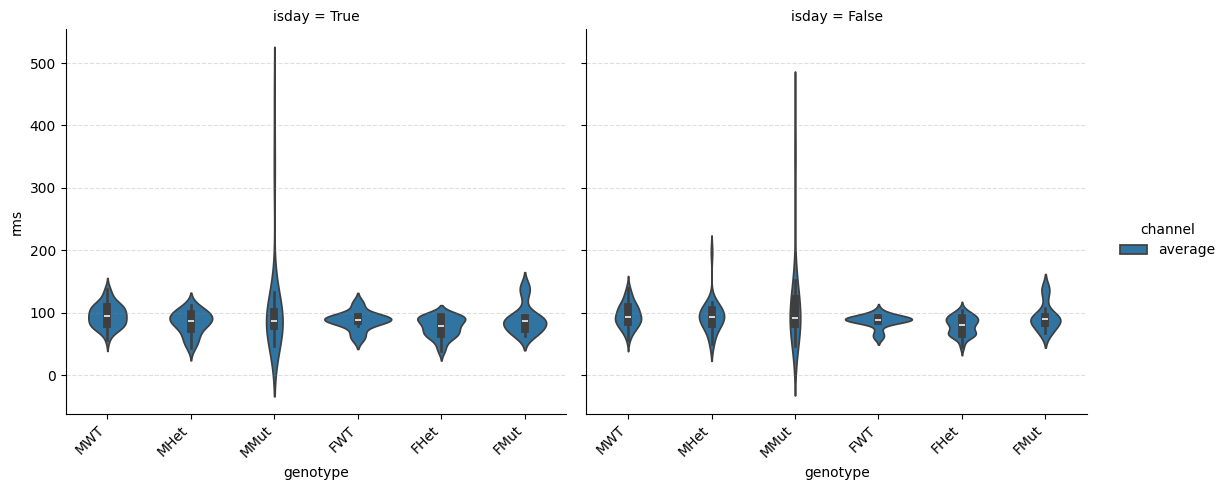

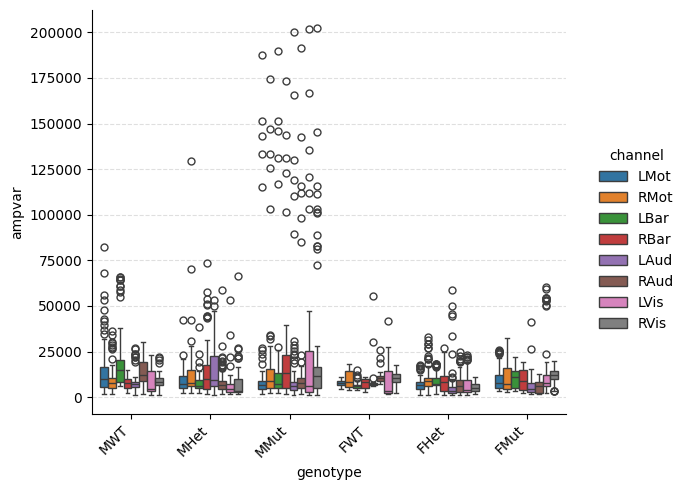

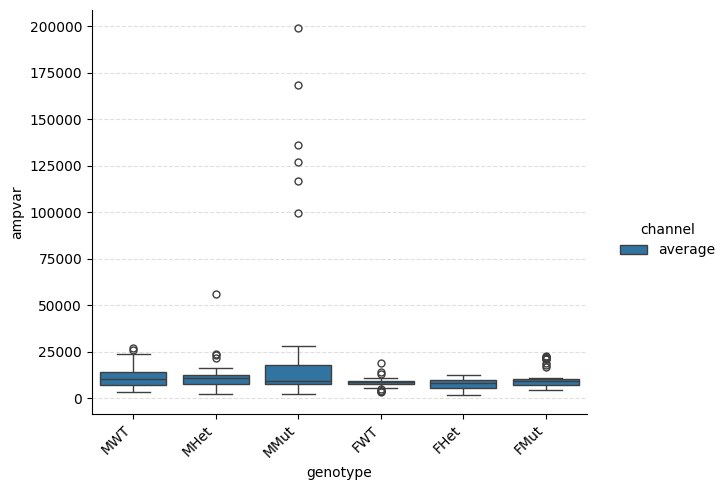

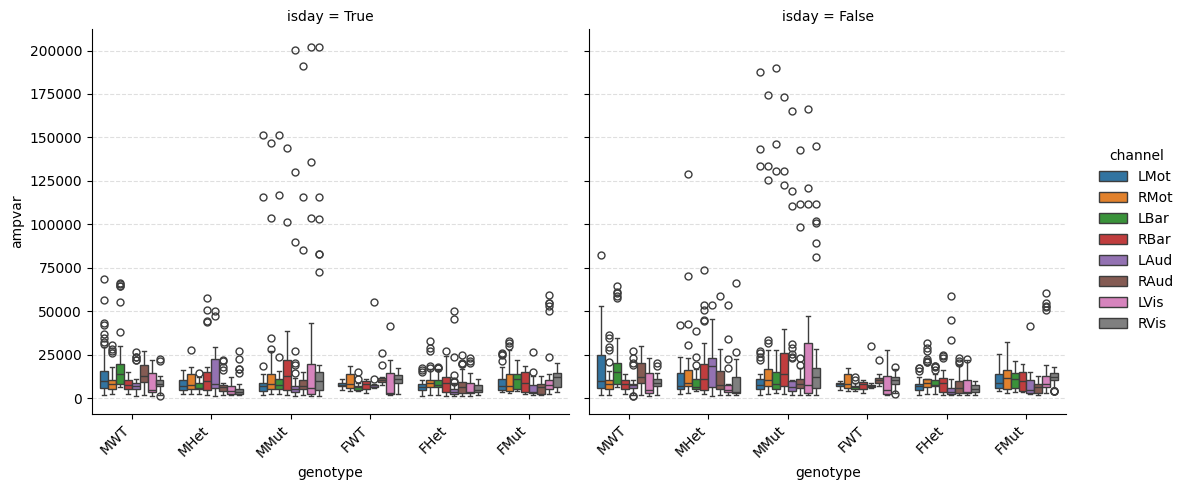

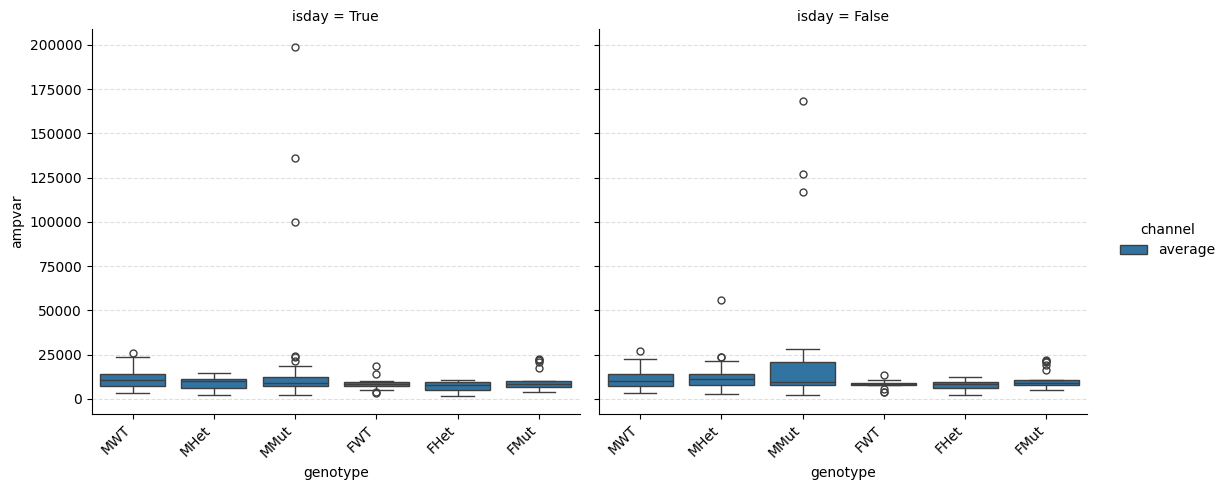

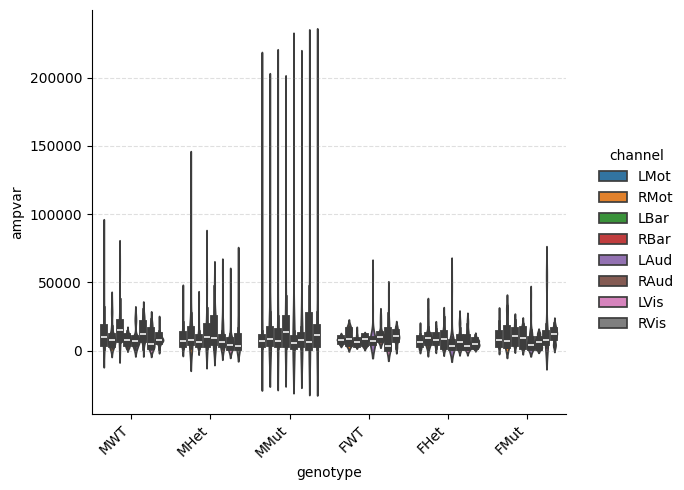

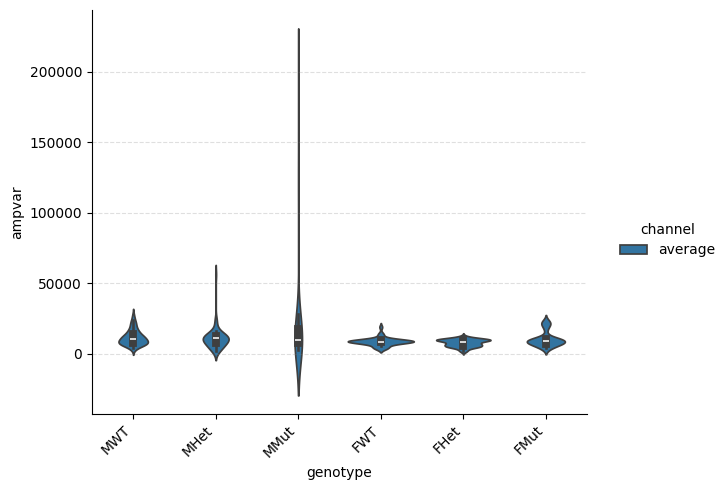

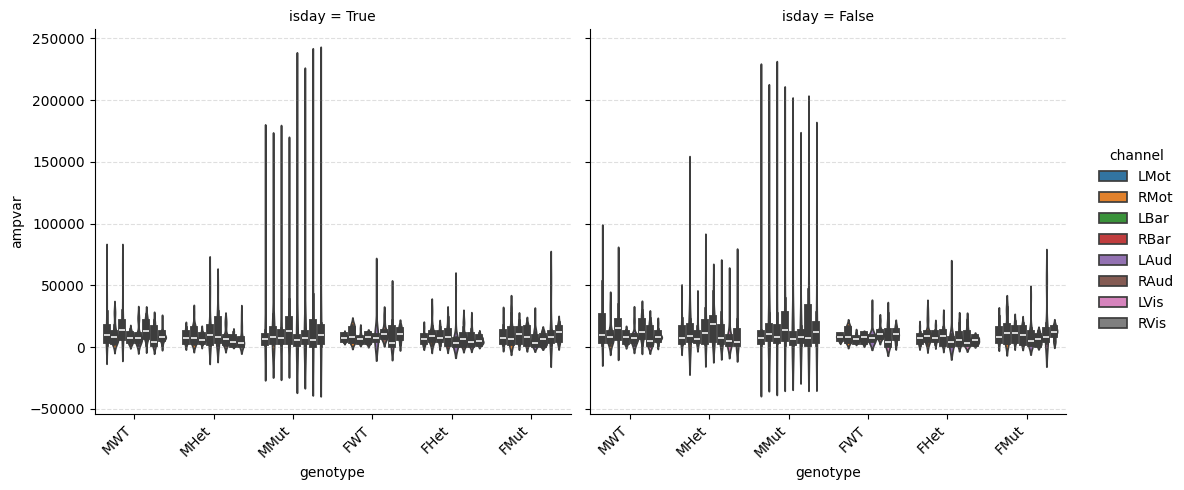

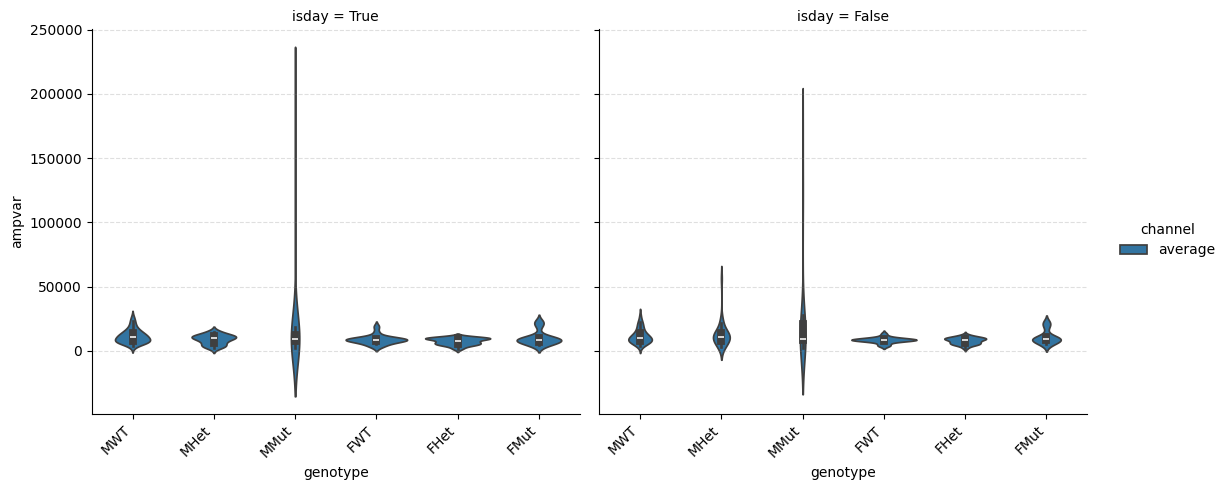

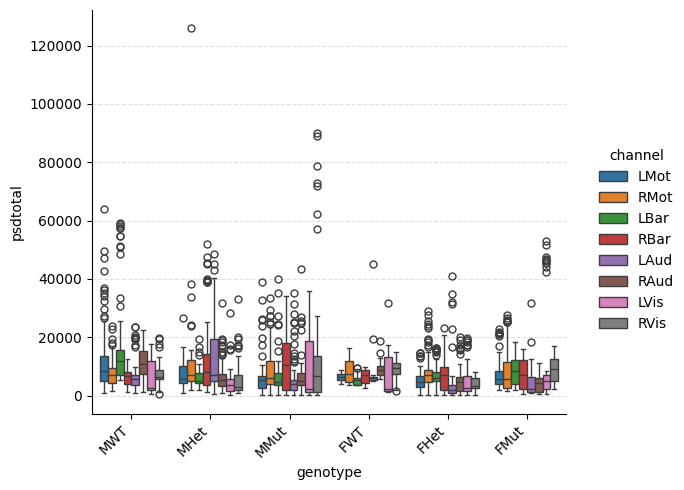

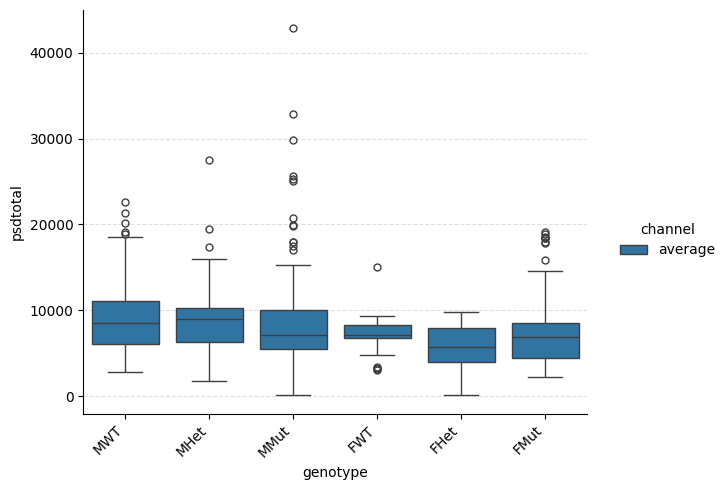

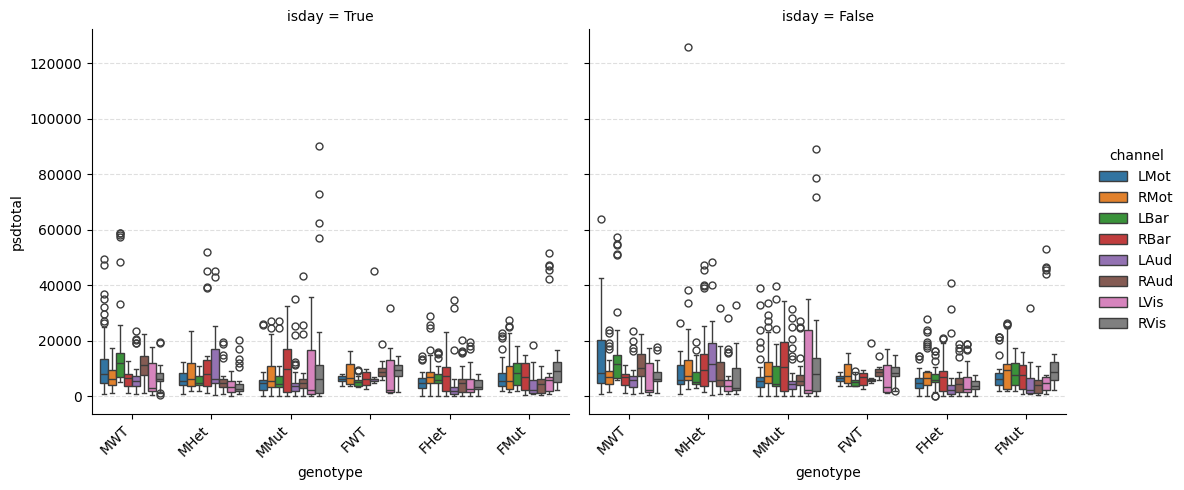

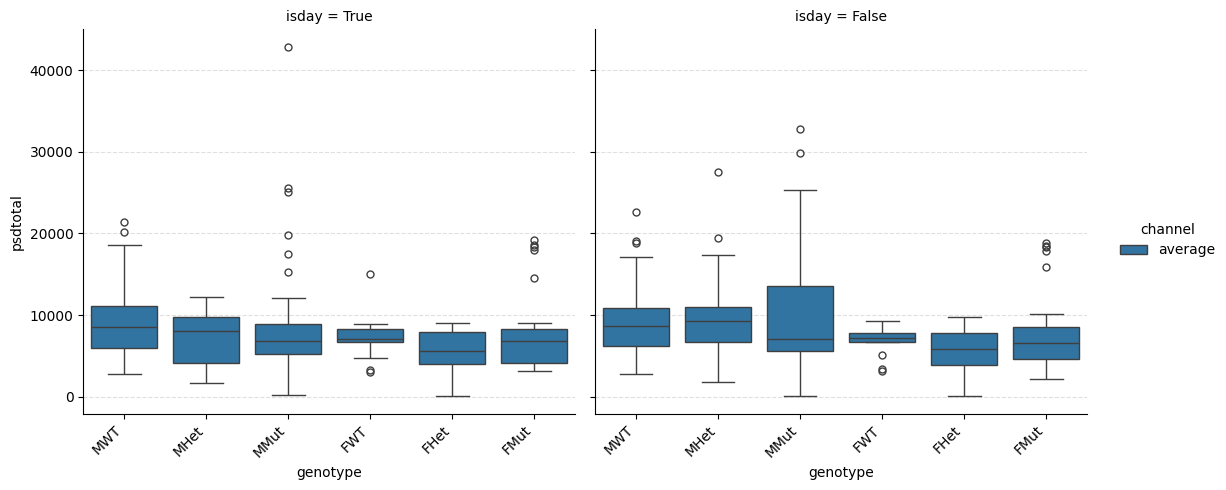

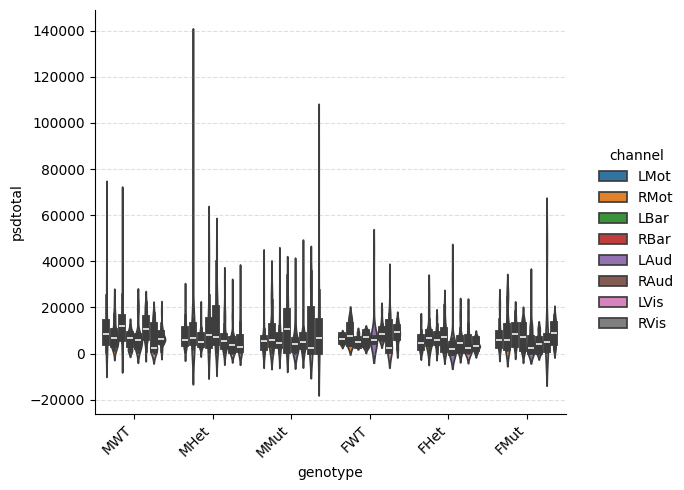

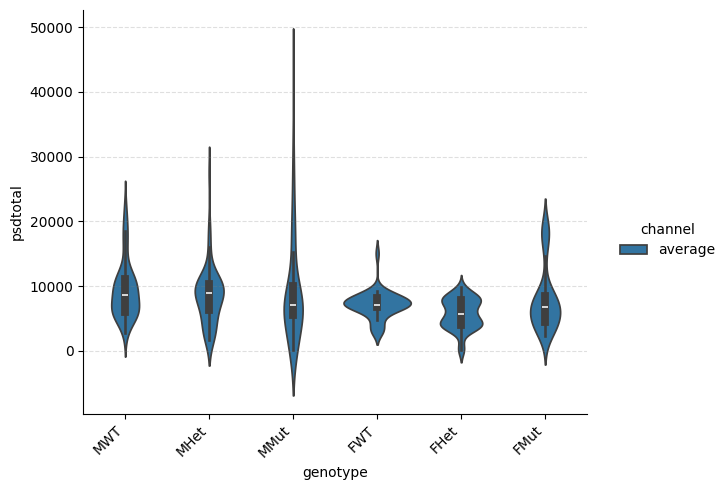

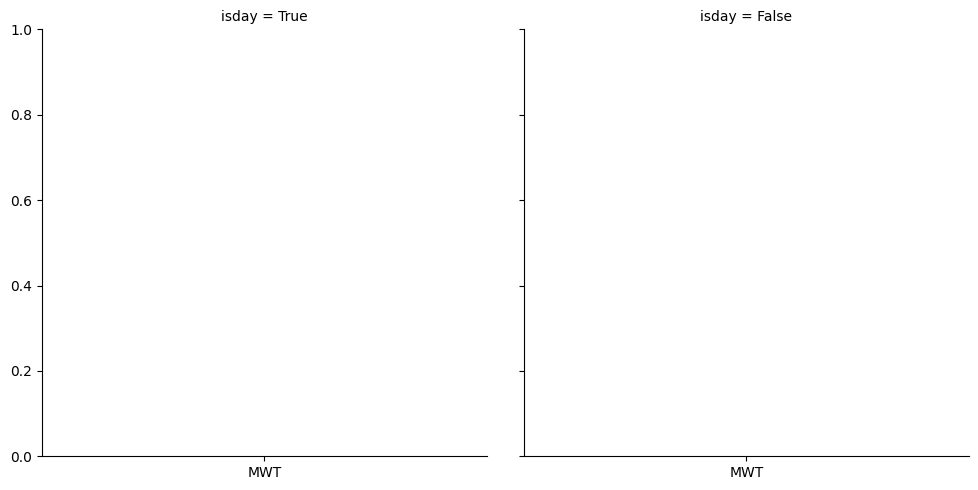

In [25]:
for feature in constants.LINEAR_FEATURES:
    if feature in ['nspike', 'psdfrac', 'logrms', 'logampvar', 'logpsdtotal', 'lognspike', 'logpsdband', 'logpsdfrac']:
        print(f"Skipping feature {feature}")
        continue
    for kind in ['box', 'violin']:
        for groupby in ['genotype', ['genotype', 'isday']]:
            for collapse in [False, True]:
                ep.plot_catplot(feature, groupby=groupby, kind=kind, collapse_channels=collapse)
for kind in ['box', 'violin']:
    ep.plot_catplot('psdband', groupby=['genotype', 'isday'], 
                    x='genotype',
                    col='isday',
                    hue='band',
                    kind=kind, collapse_channels=True)
    ep.plot_catplot('psdband', groupby=['genotype'], 
                    x='genotype',
                    hue='band',
                    kind=kind, collapse_channels=True)

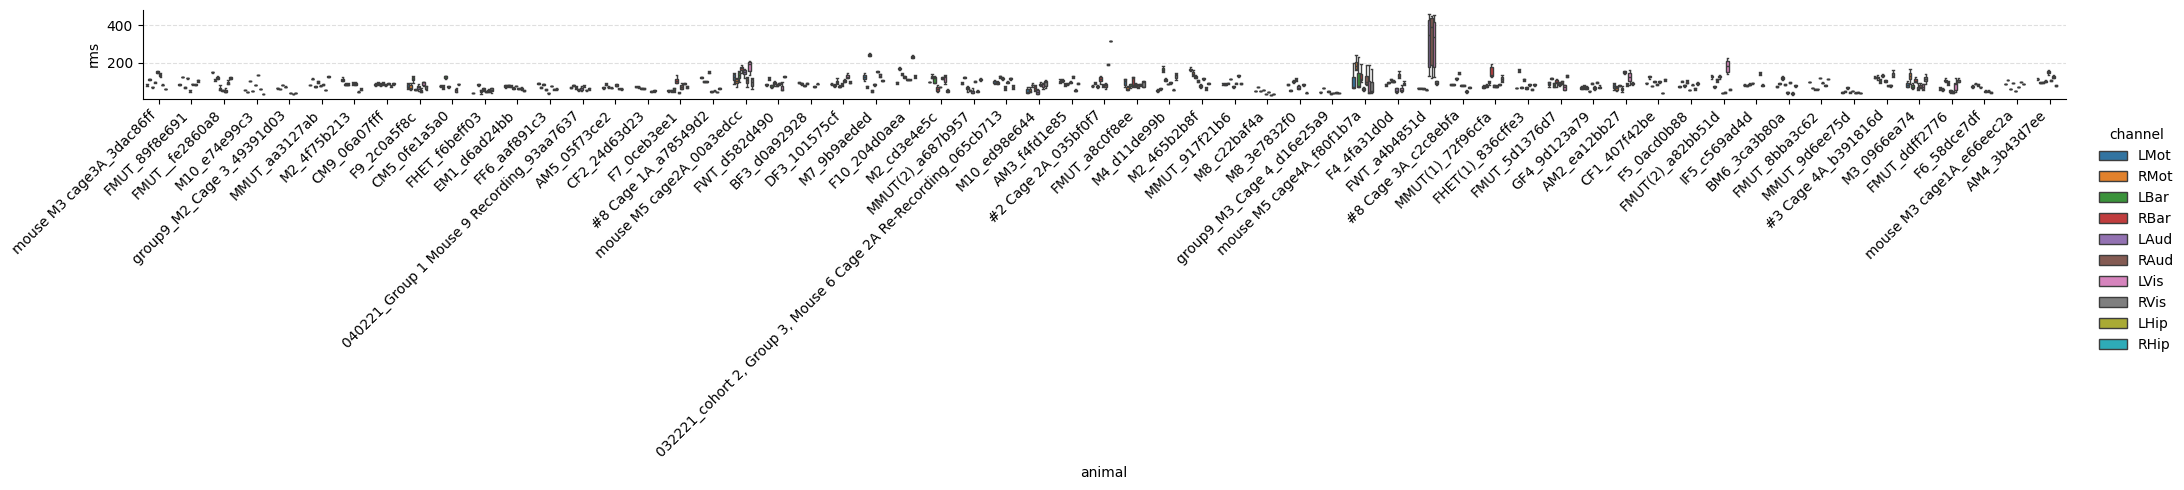

In [ ]:
ep.plot_catplot('rms', groupby='animal', kind='box', catplot_params={'showfliers': False, 'aspect': 4})

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix

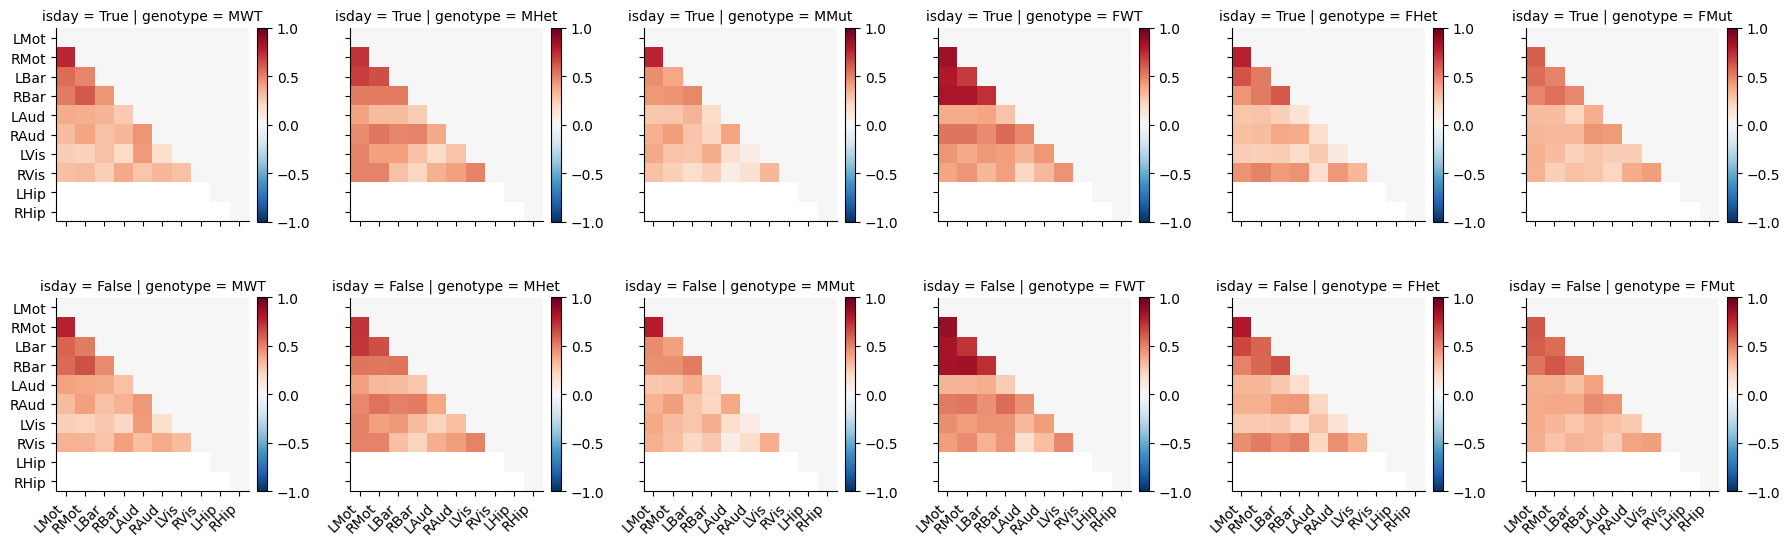

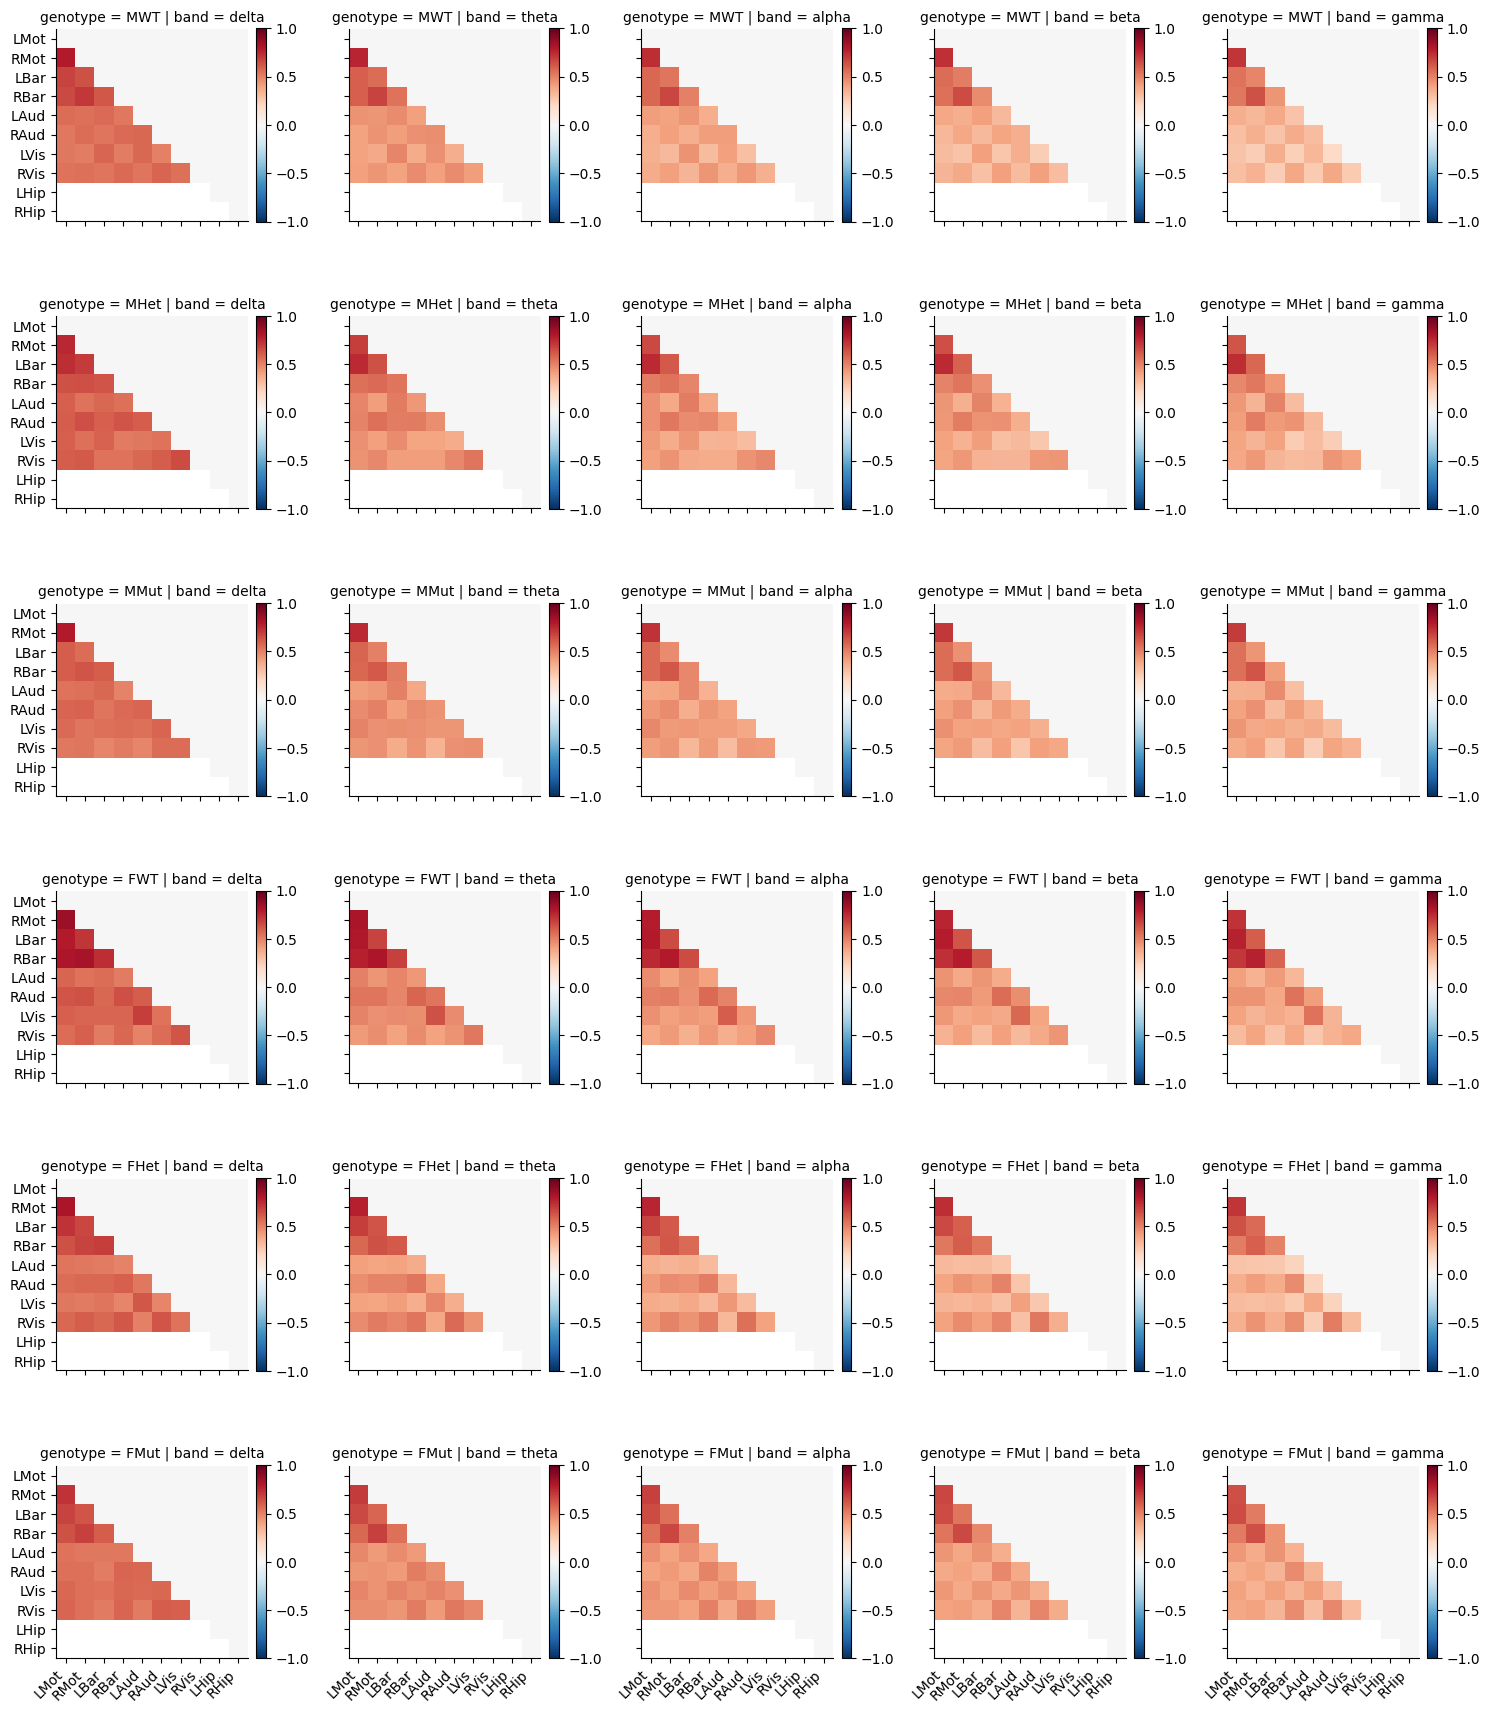

In [ ]:
ep.plot_heatmap('pcorr', groupby=['genotype', 'isday'])
ep.plot_heatmap('cohere', groupby=['genotype', 'isday'], col='band', row='genotype')

In [ ]:
logger.setLevel(logging.DEBUG)

In [ ]:
for e in sar:
    e.convert_to_mne(chunk_len=1440)
    e.save_fif_and_json(Path(f'./test-mnes/{e.animal_day}').resolve(), overwrite=True)

NameError: name 'sar' is not defined

In [ ]:
reconstruct_sas = visualization.SpikeAnalysisResult.load_fif_and_json('./test-mnes/A5 WT Dec-12-2023')
mne_obj = reconstruct_sas.result_mne

Opening raw data file test-mnes/A5 WT Dec-12-2023/A5-WT-A5 WT Dec-12-2023-raw.fif...
    Reading extended channel information
Isotrak not found
    Range : 0 ... 40067758 =      0.000 ... 40067.758 secs
Ready.
2025-03-21 21:23:35,173 - INFO - Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
2025-03-21 21:23:35,174 - INFO - Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


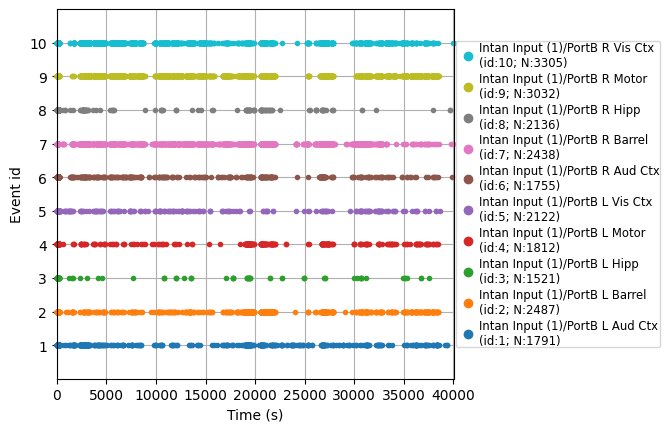

In [ ]:
logger.setLevel(logging.WARNING)
events, event_id = mne.events_from_annotations(raw=mne_obj)
fig = mne.viz.plot_events(events, sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=event_id)

In [ ]:
# Pivot the DataFrame to create Day and Night columns
df_pivoted = df.pivot_table(
    index=['animal', 'band'],  # These columns will identify unique rows
    columns='isday',           # The Day/Night values will become columns
    values='values',           # The values will be spread into Day/Night columns
    aggfunc='first'           # Since we expect one value per Day/Night, use first
).reset_index()

# Rename columns for clarity (optional)
df_pivoted.columns.name = None  # Remove the columns name
display(df_pivoted)
